## Mendeley diabetes dataset analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90191/2611001789.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', quality=100)


## First, let us read the dataset

In [3]:
my_data = pd.read_csv("Mendeley.csv")
my_data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## We don't need to know patient's ID and No. of patients, so let's do some cleaning

In [4]:
df = my_data.iloc[:,2:]
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Now make a copy of the original dataset and pre-process it

In [5]:
# First let's make a copy of the tailored database so we can implement changes
df_copy = df.copy()

In [6]:
# remove rows with class = "P" as we don't need that
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])

# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
cleanup_nums = {"Gender":{"M": 1, "F": 0}, "CLASS":{"Y":1, "N":0 }}

# implement the replacing
df_copy = df_copy.replace(cleanup_nums)
df_copy.head()  # now it looks nice


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


## Now let's find out the relationship betweens these variables and diabetes through a scatter matrix
### First let's use the scatter matrix

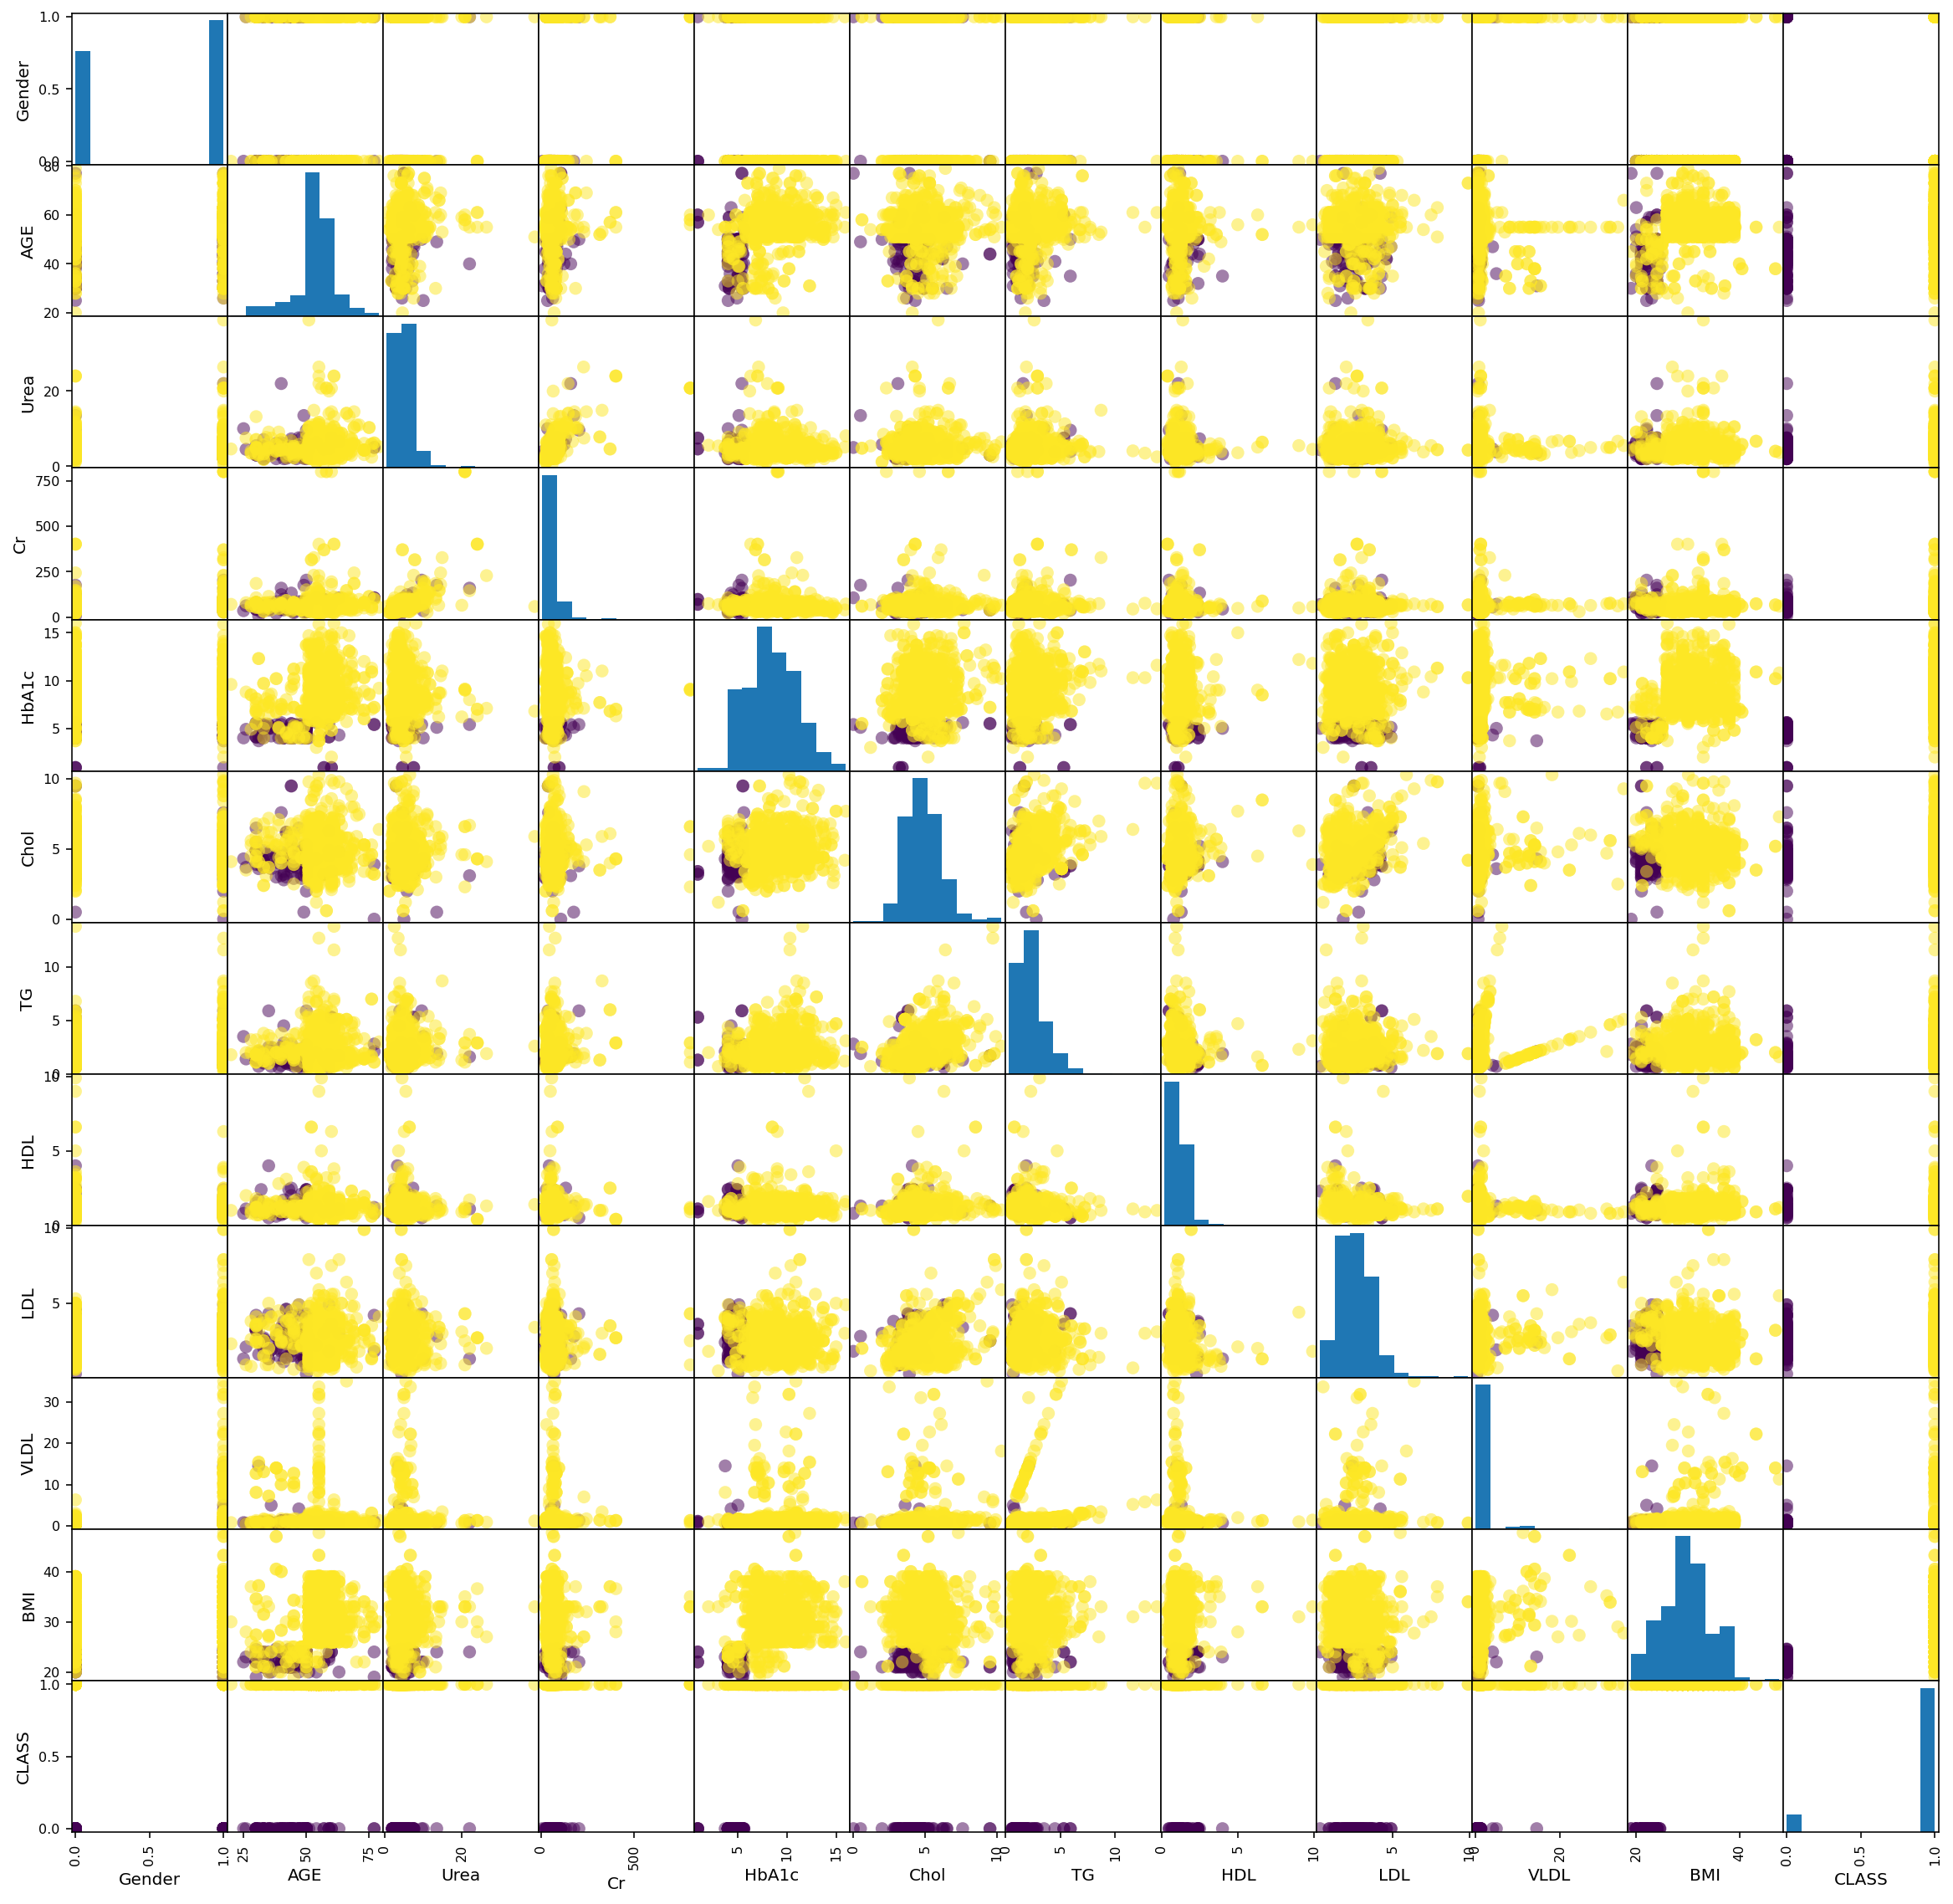

In [7]:
pd.plotting.scatter_matrix(df_copy, c=df_copy["CLASS"], figsize=(20, 20),
                           marker='o', hist_kwds={'bins': 10}, s=60,
                           alpha=.5)
plt.show()

### The scatter matrix has too many dimensions, let's plot each variable against diabetes seperately

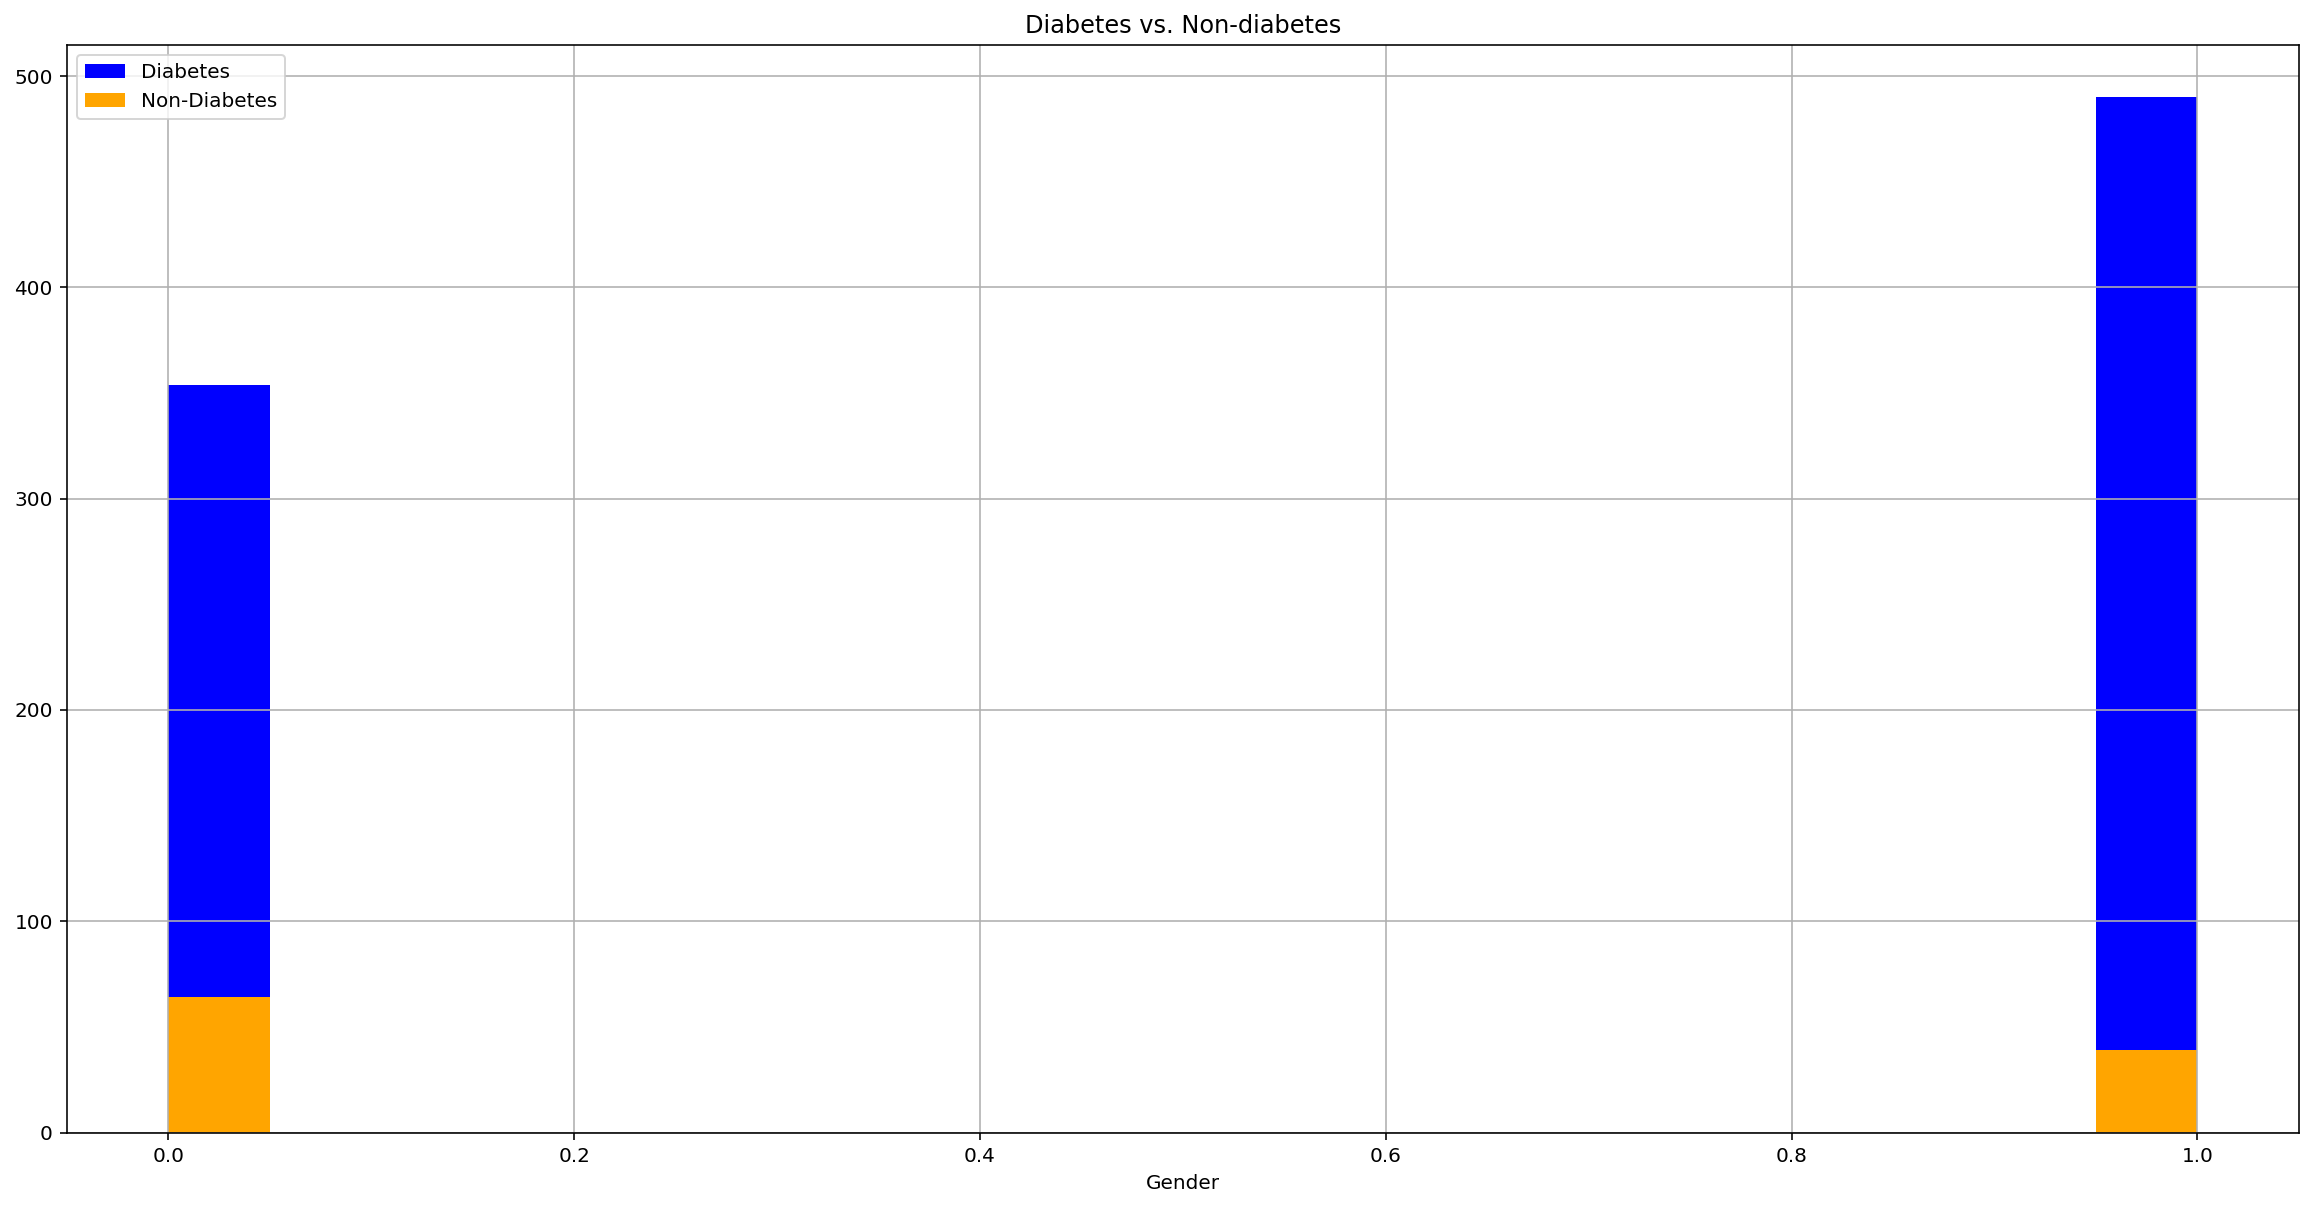

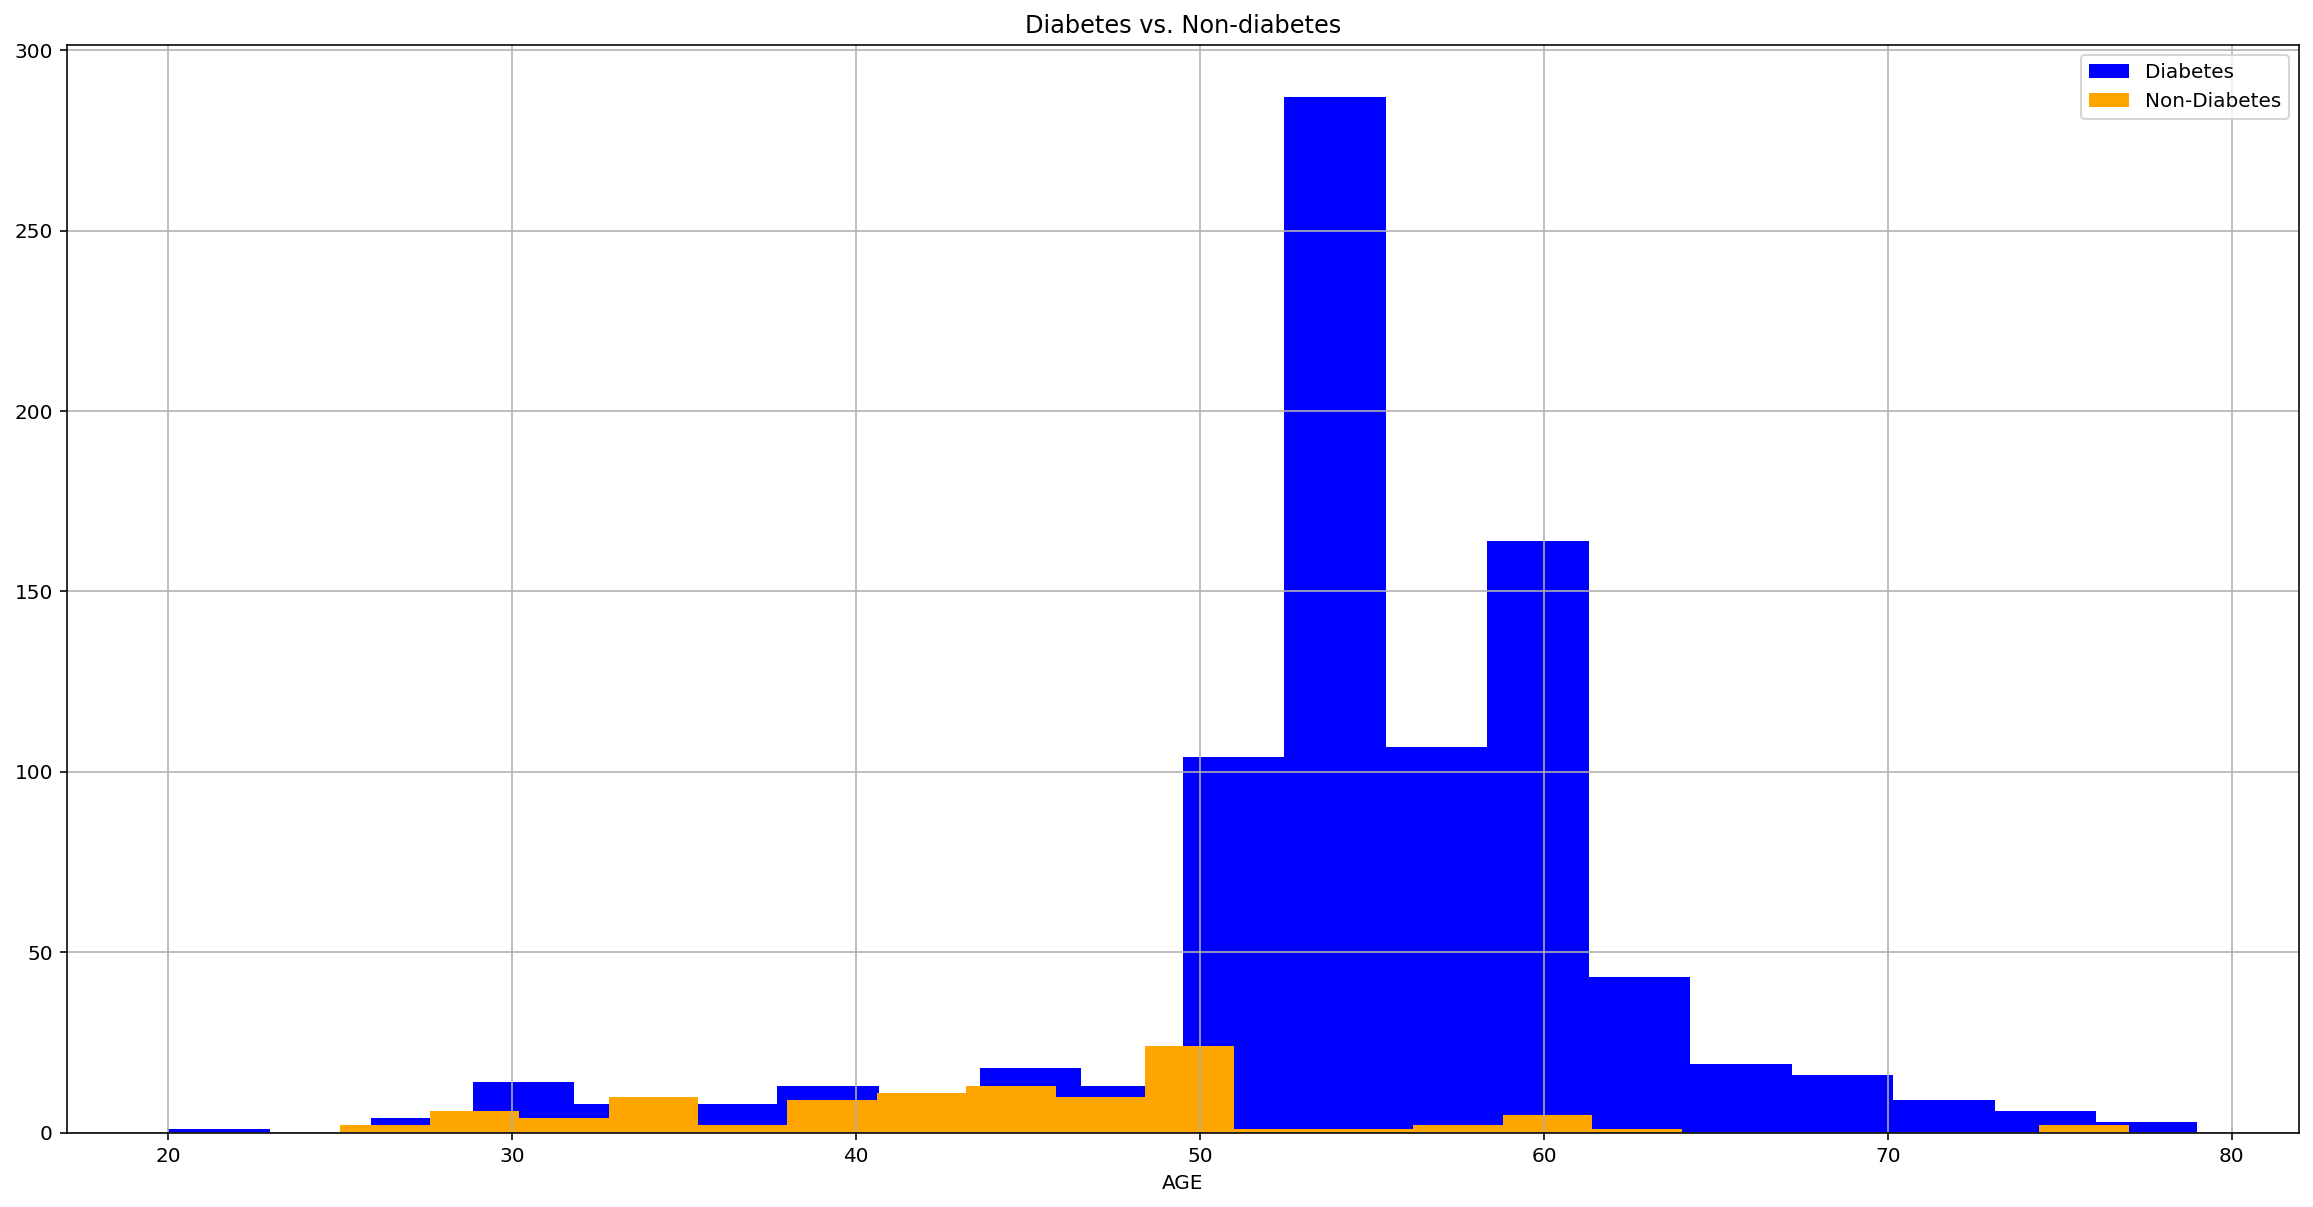

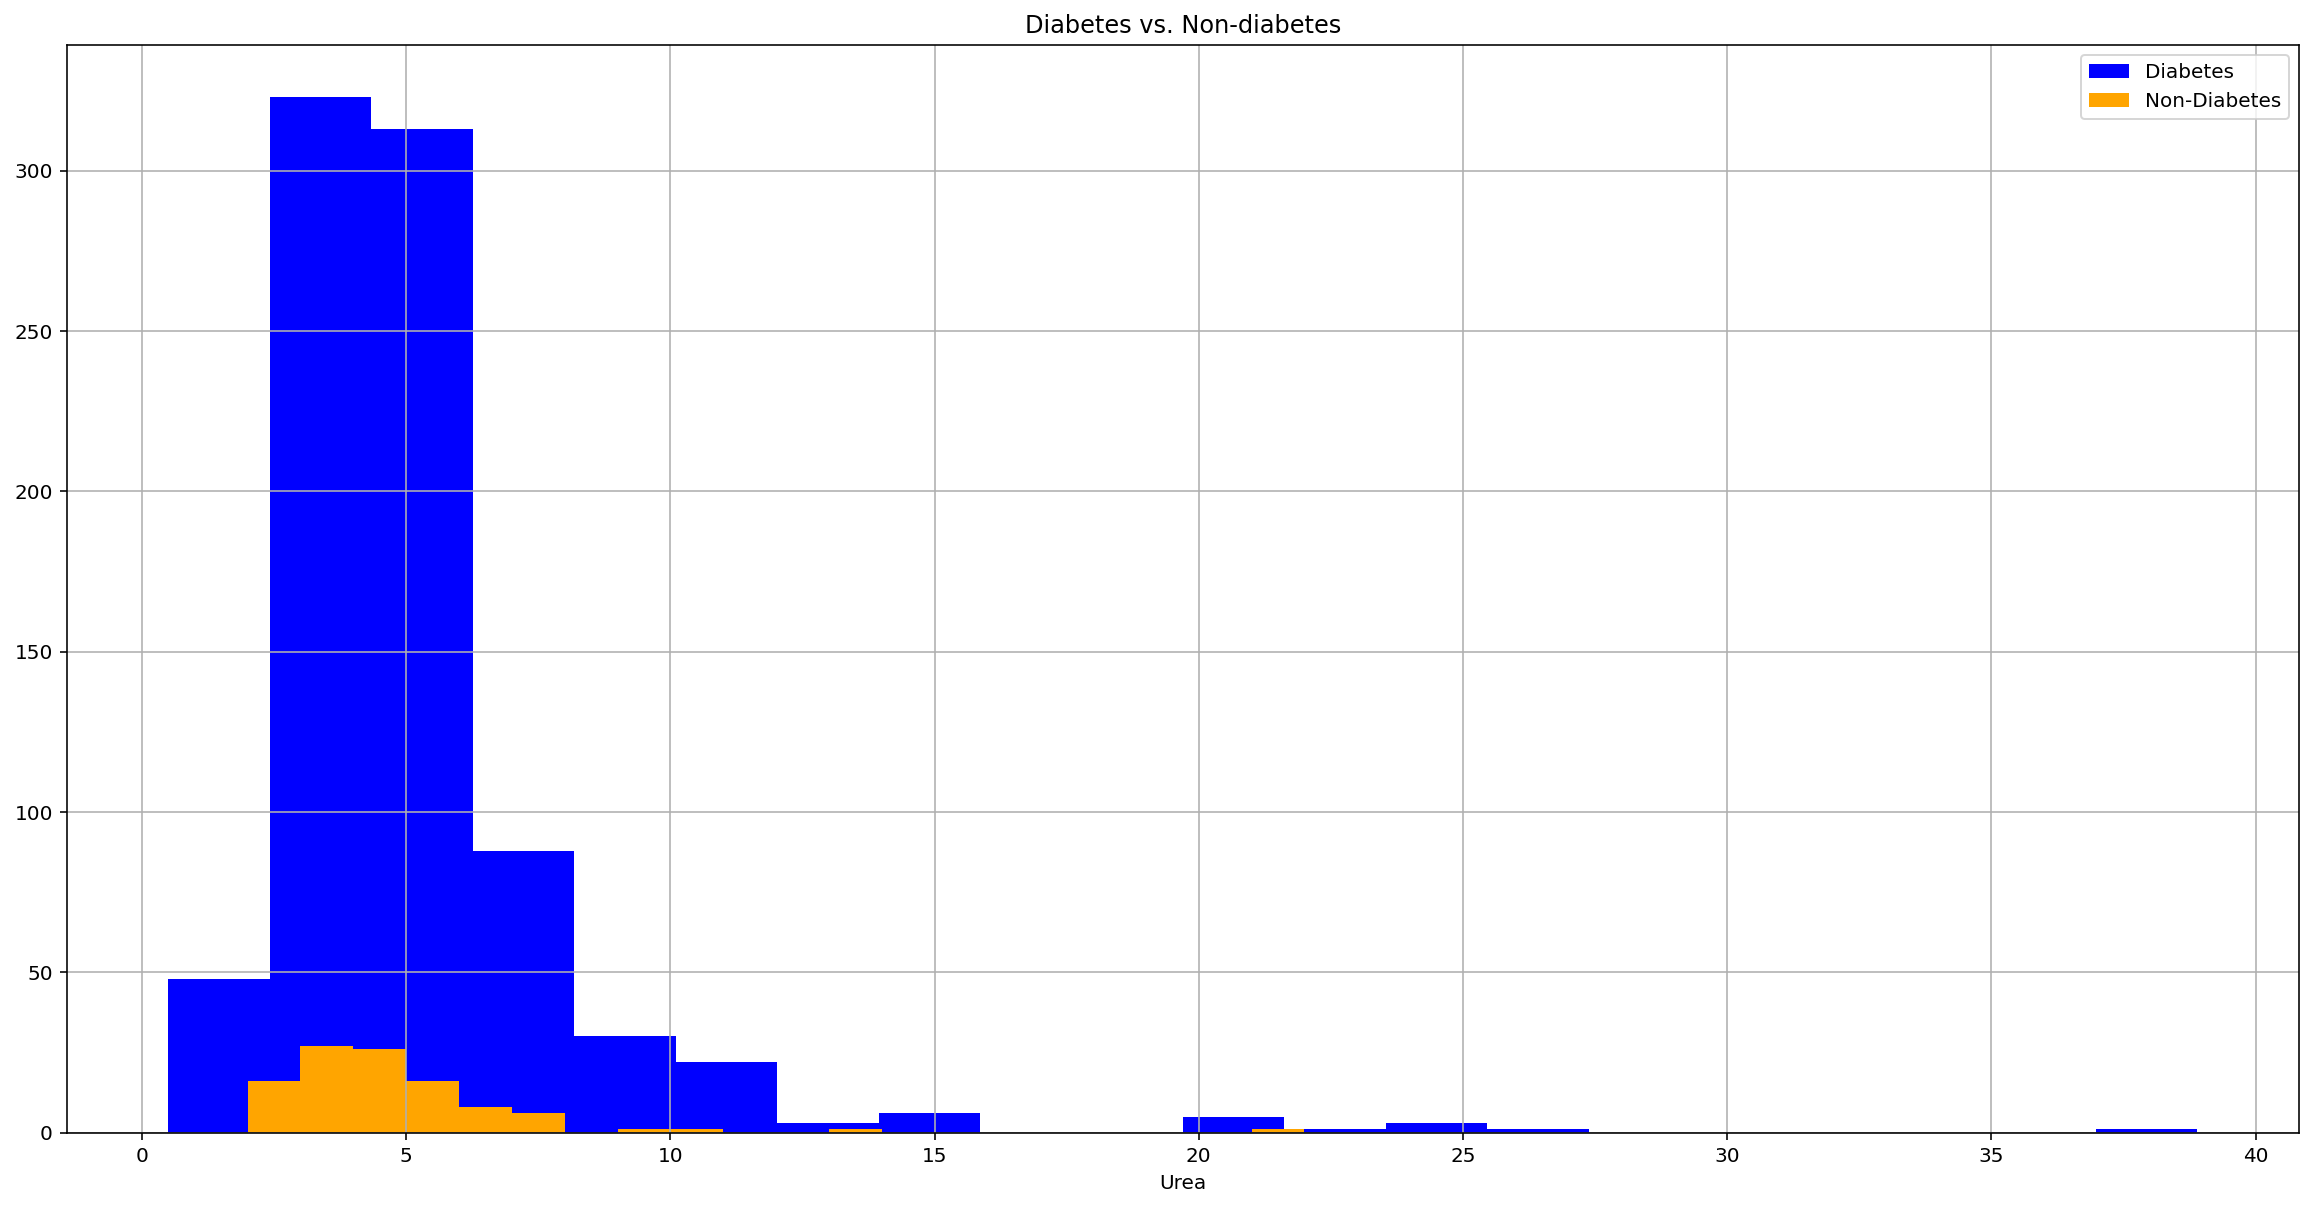

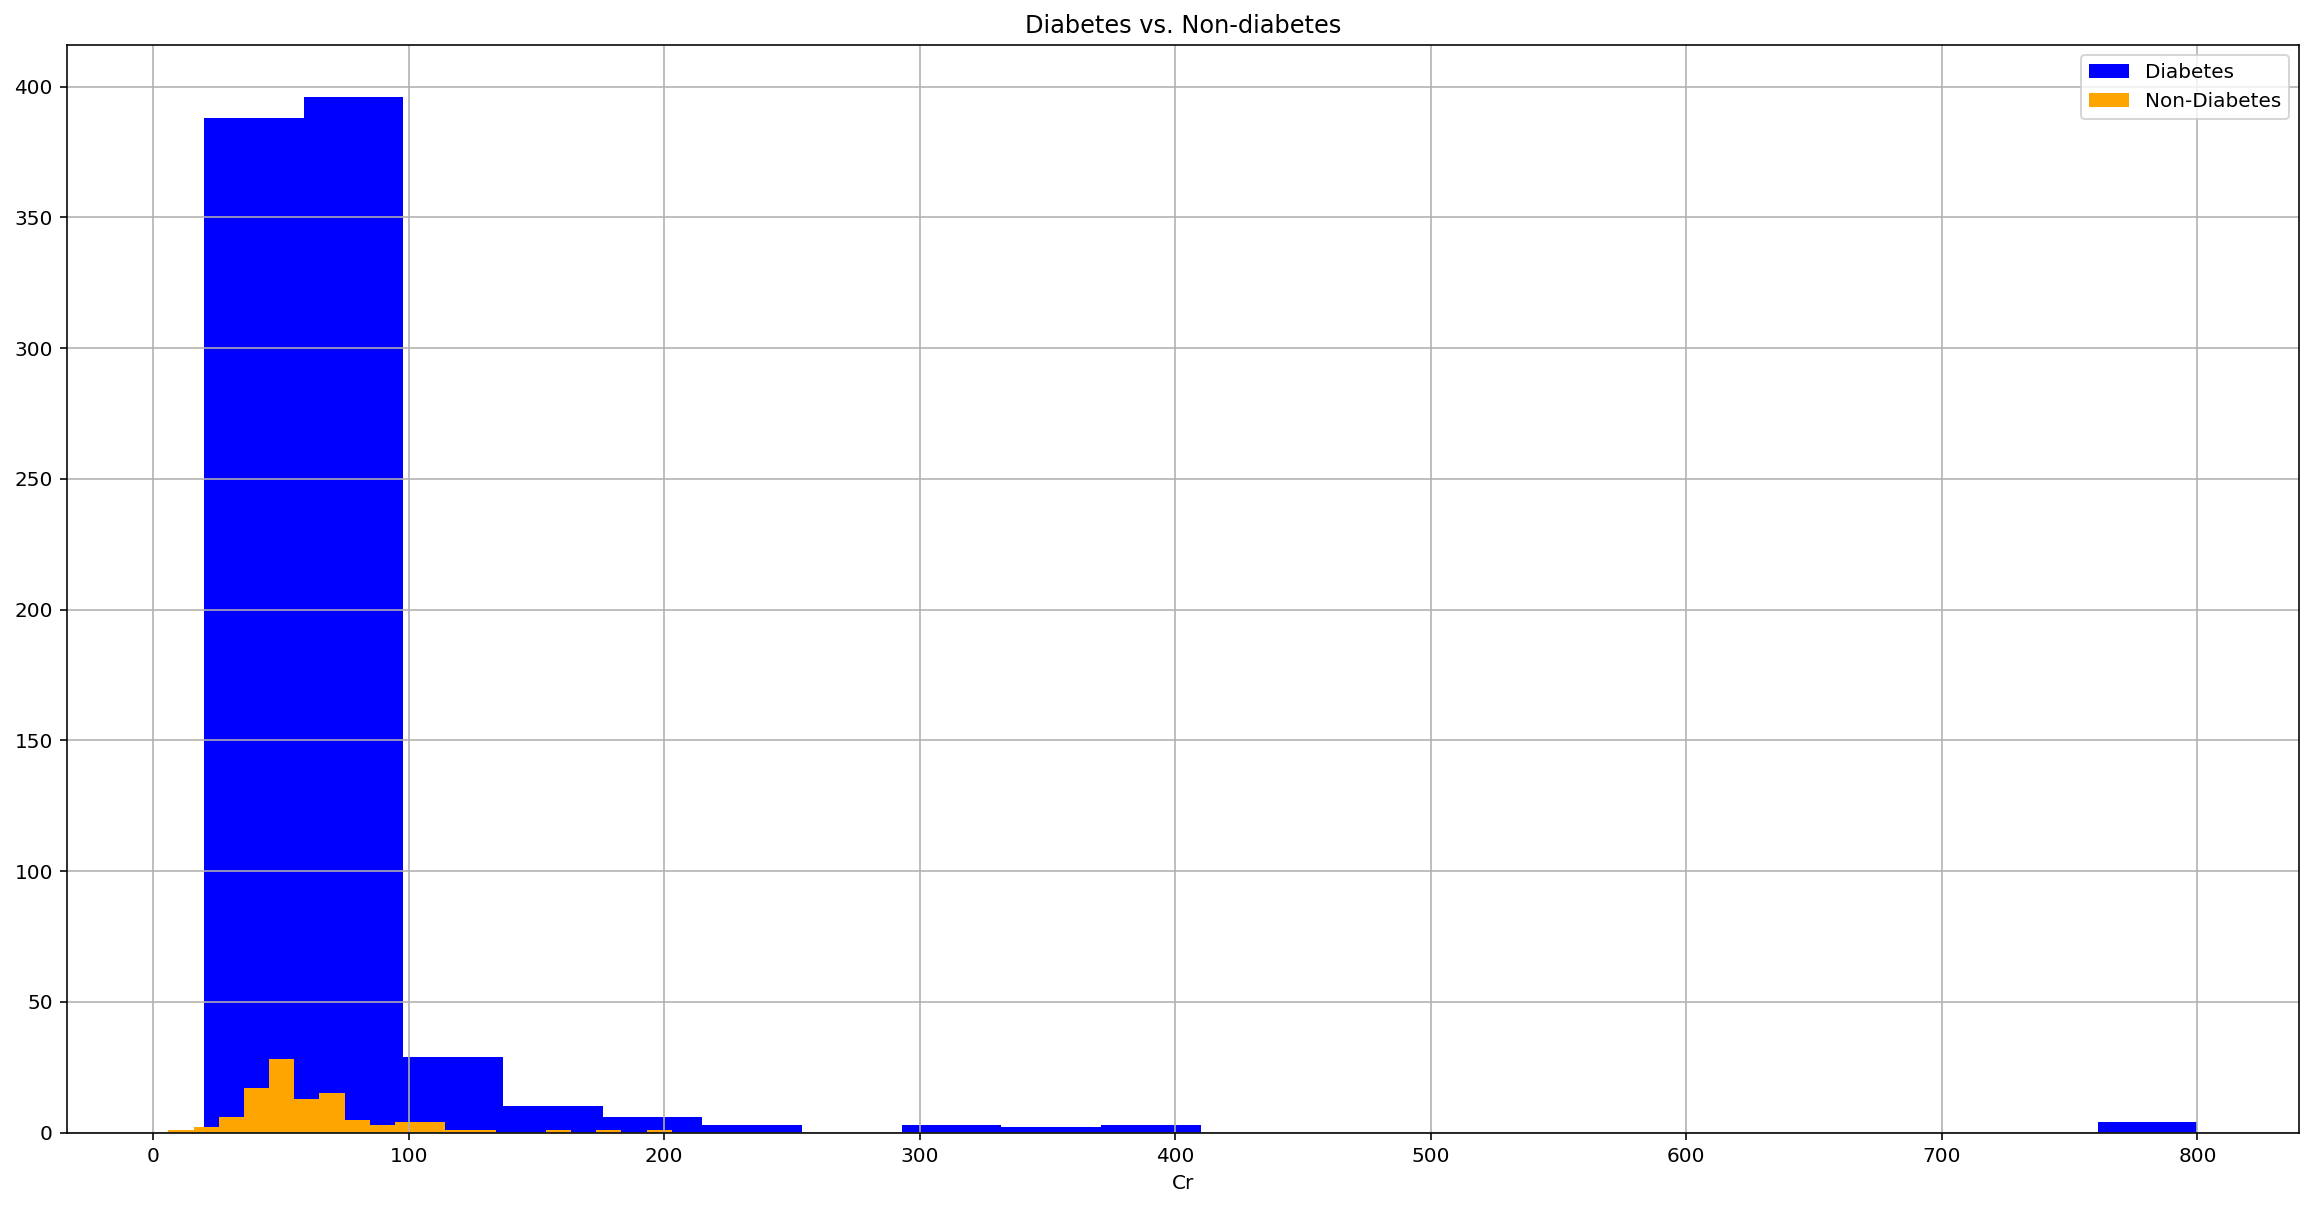

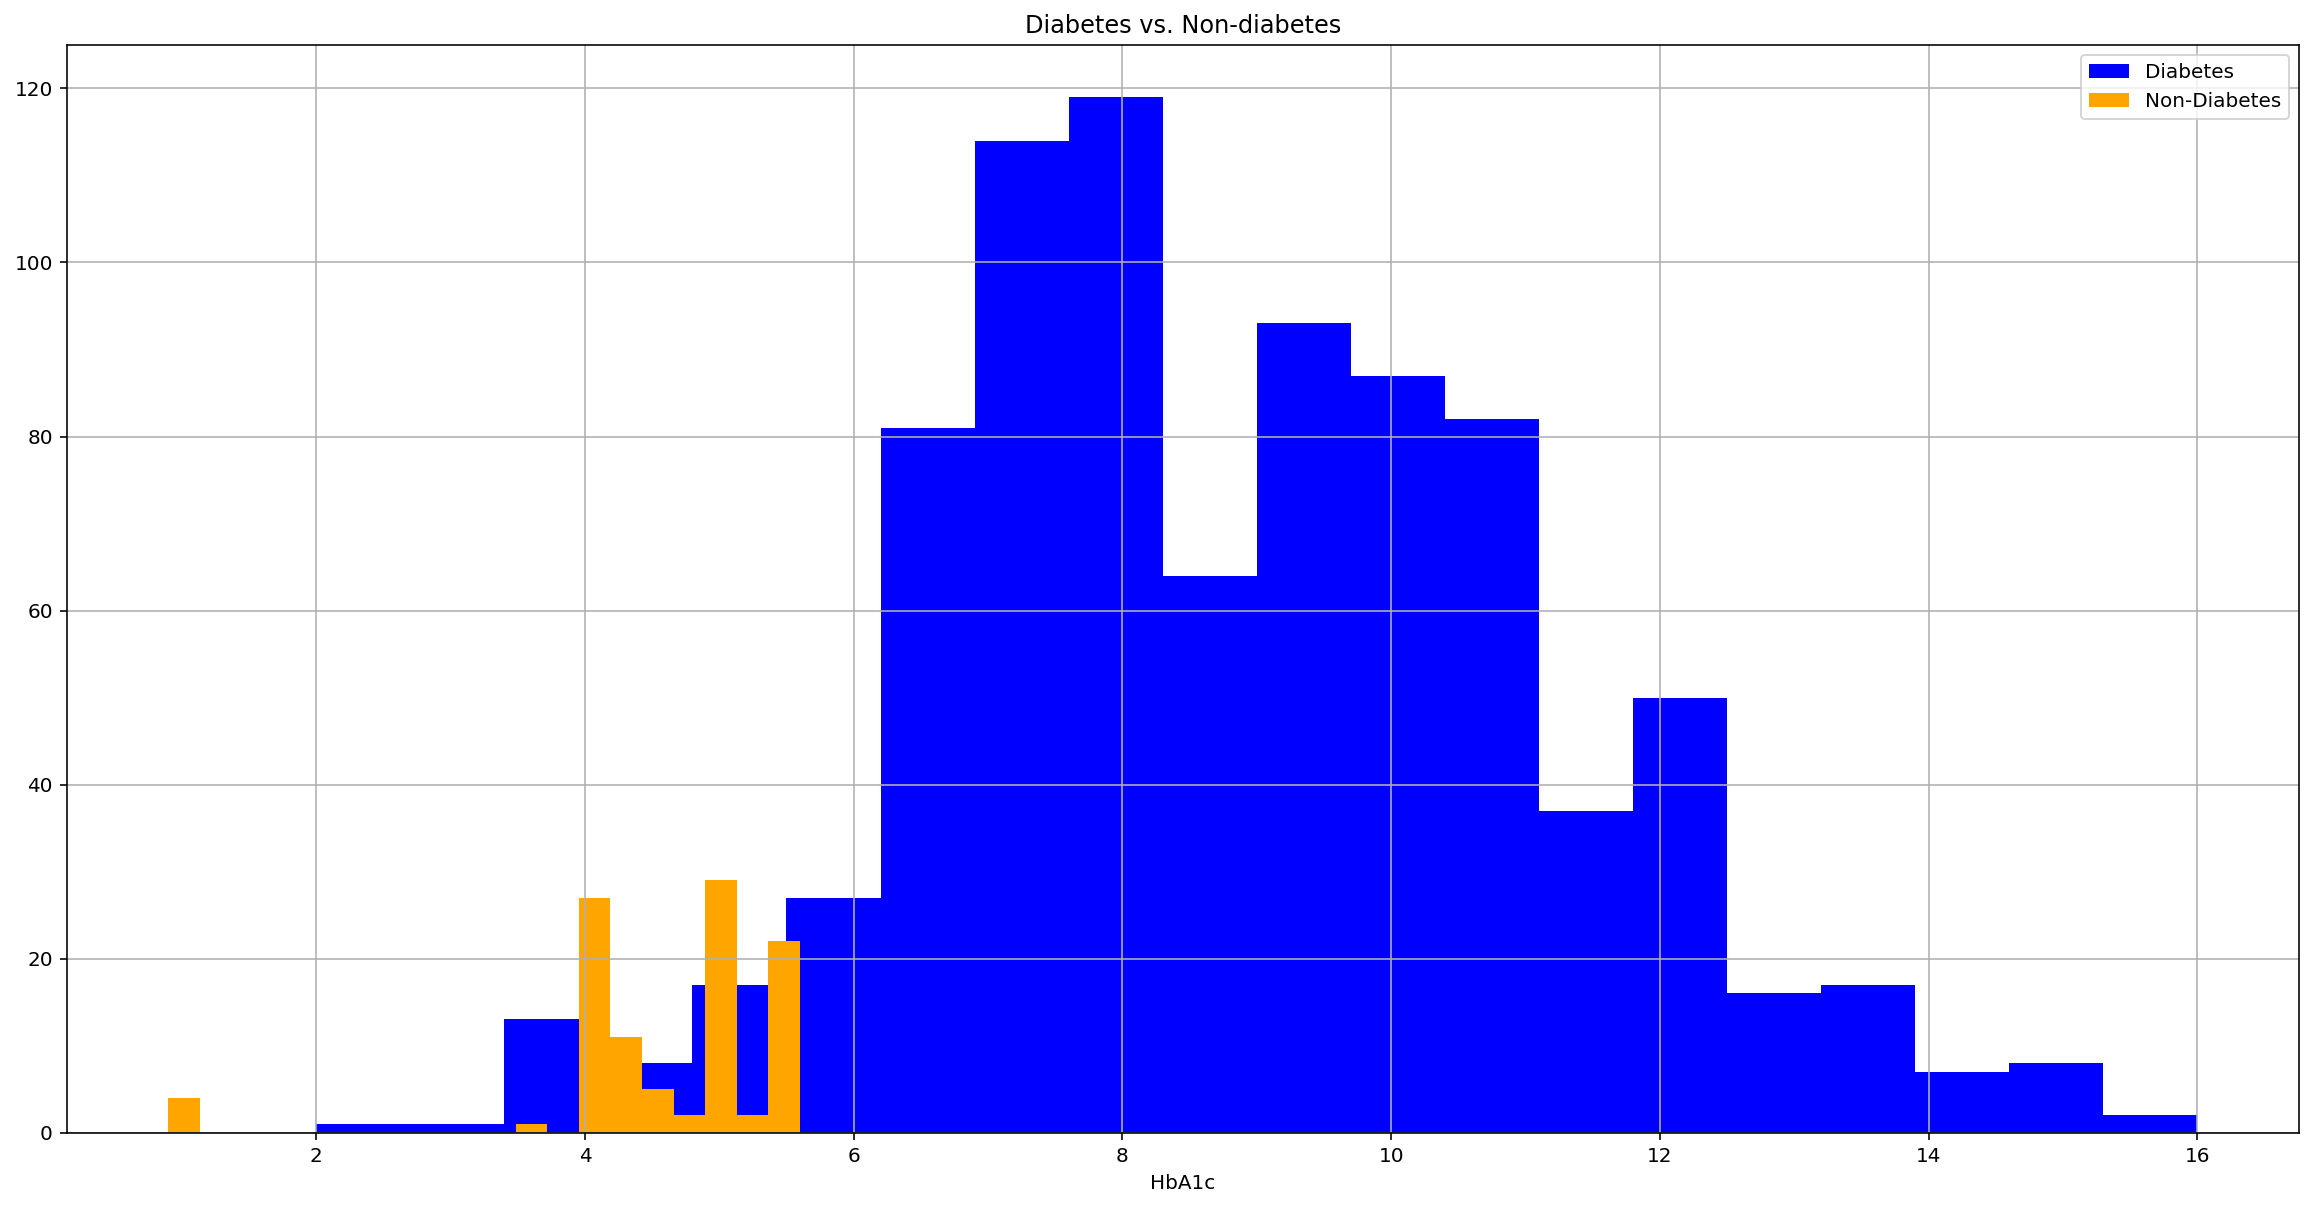

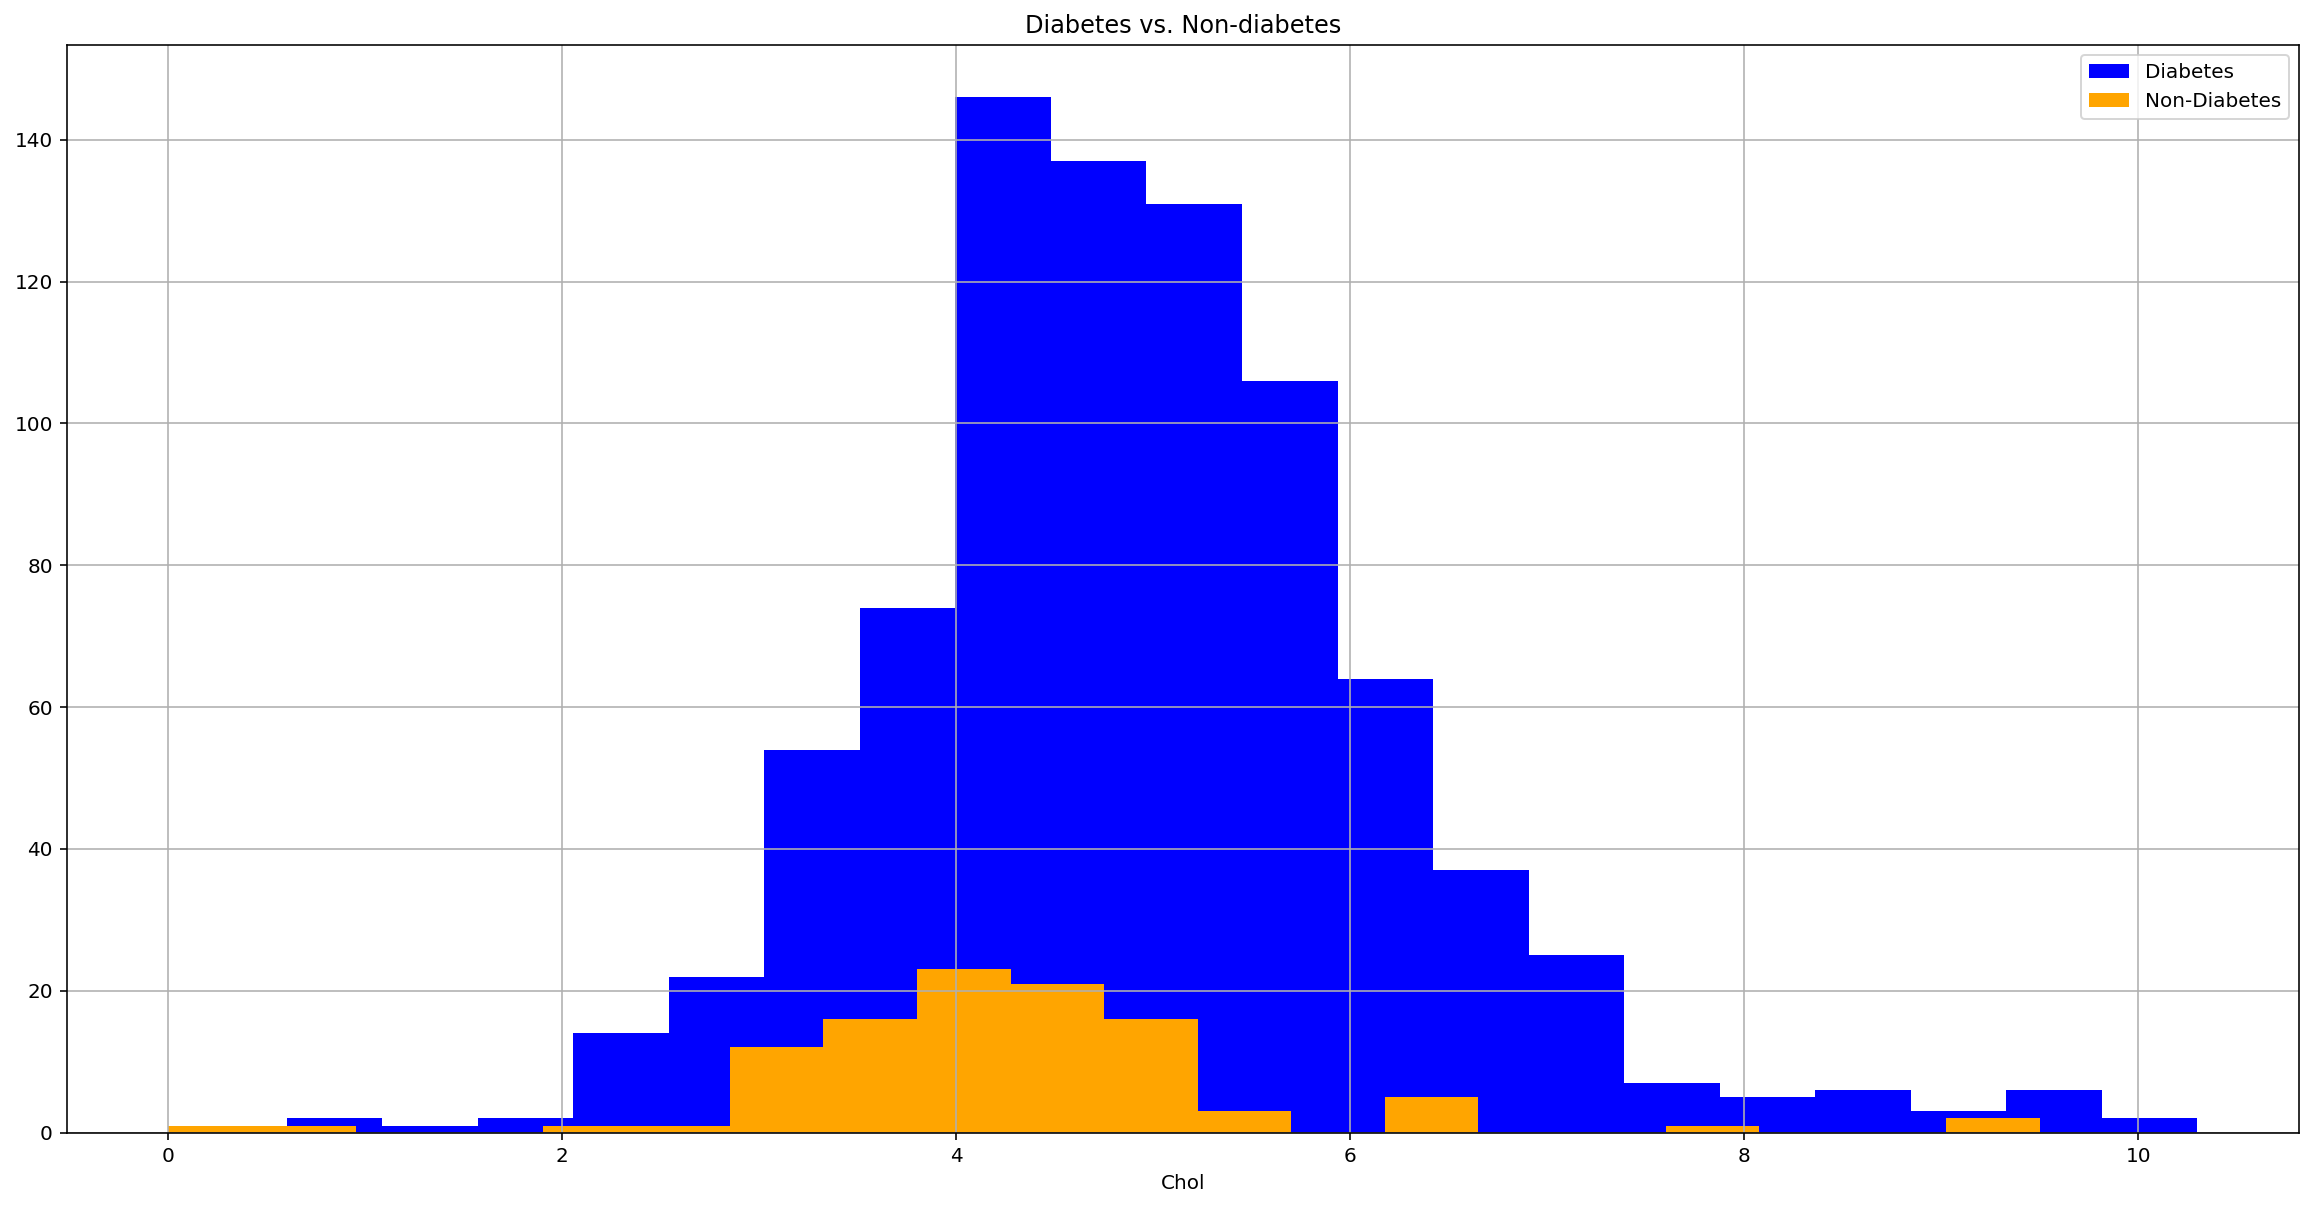

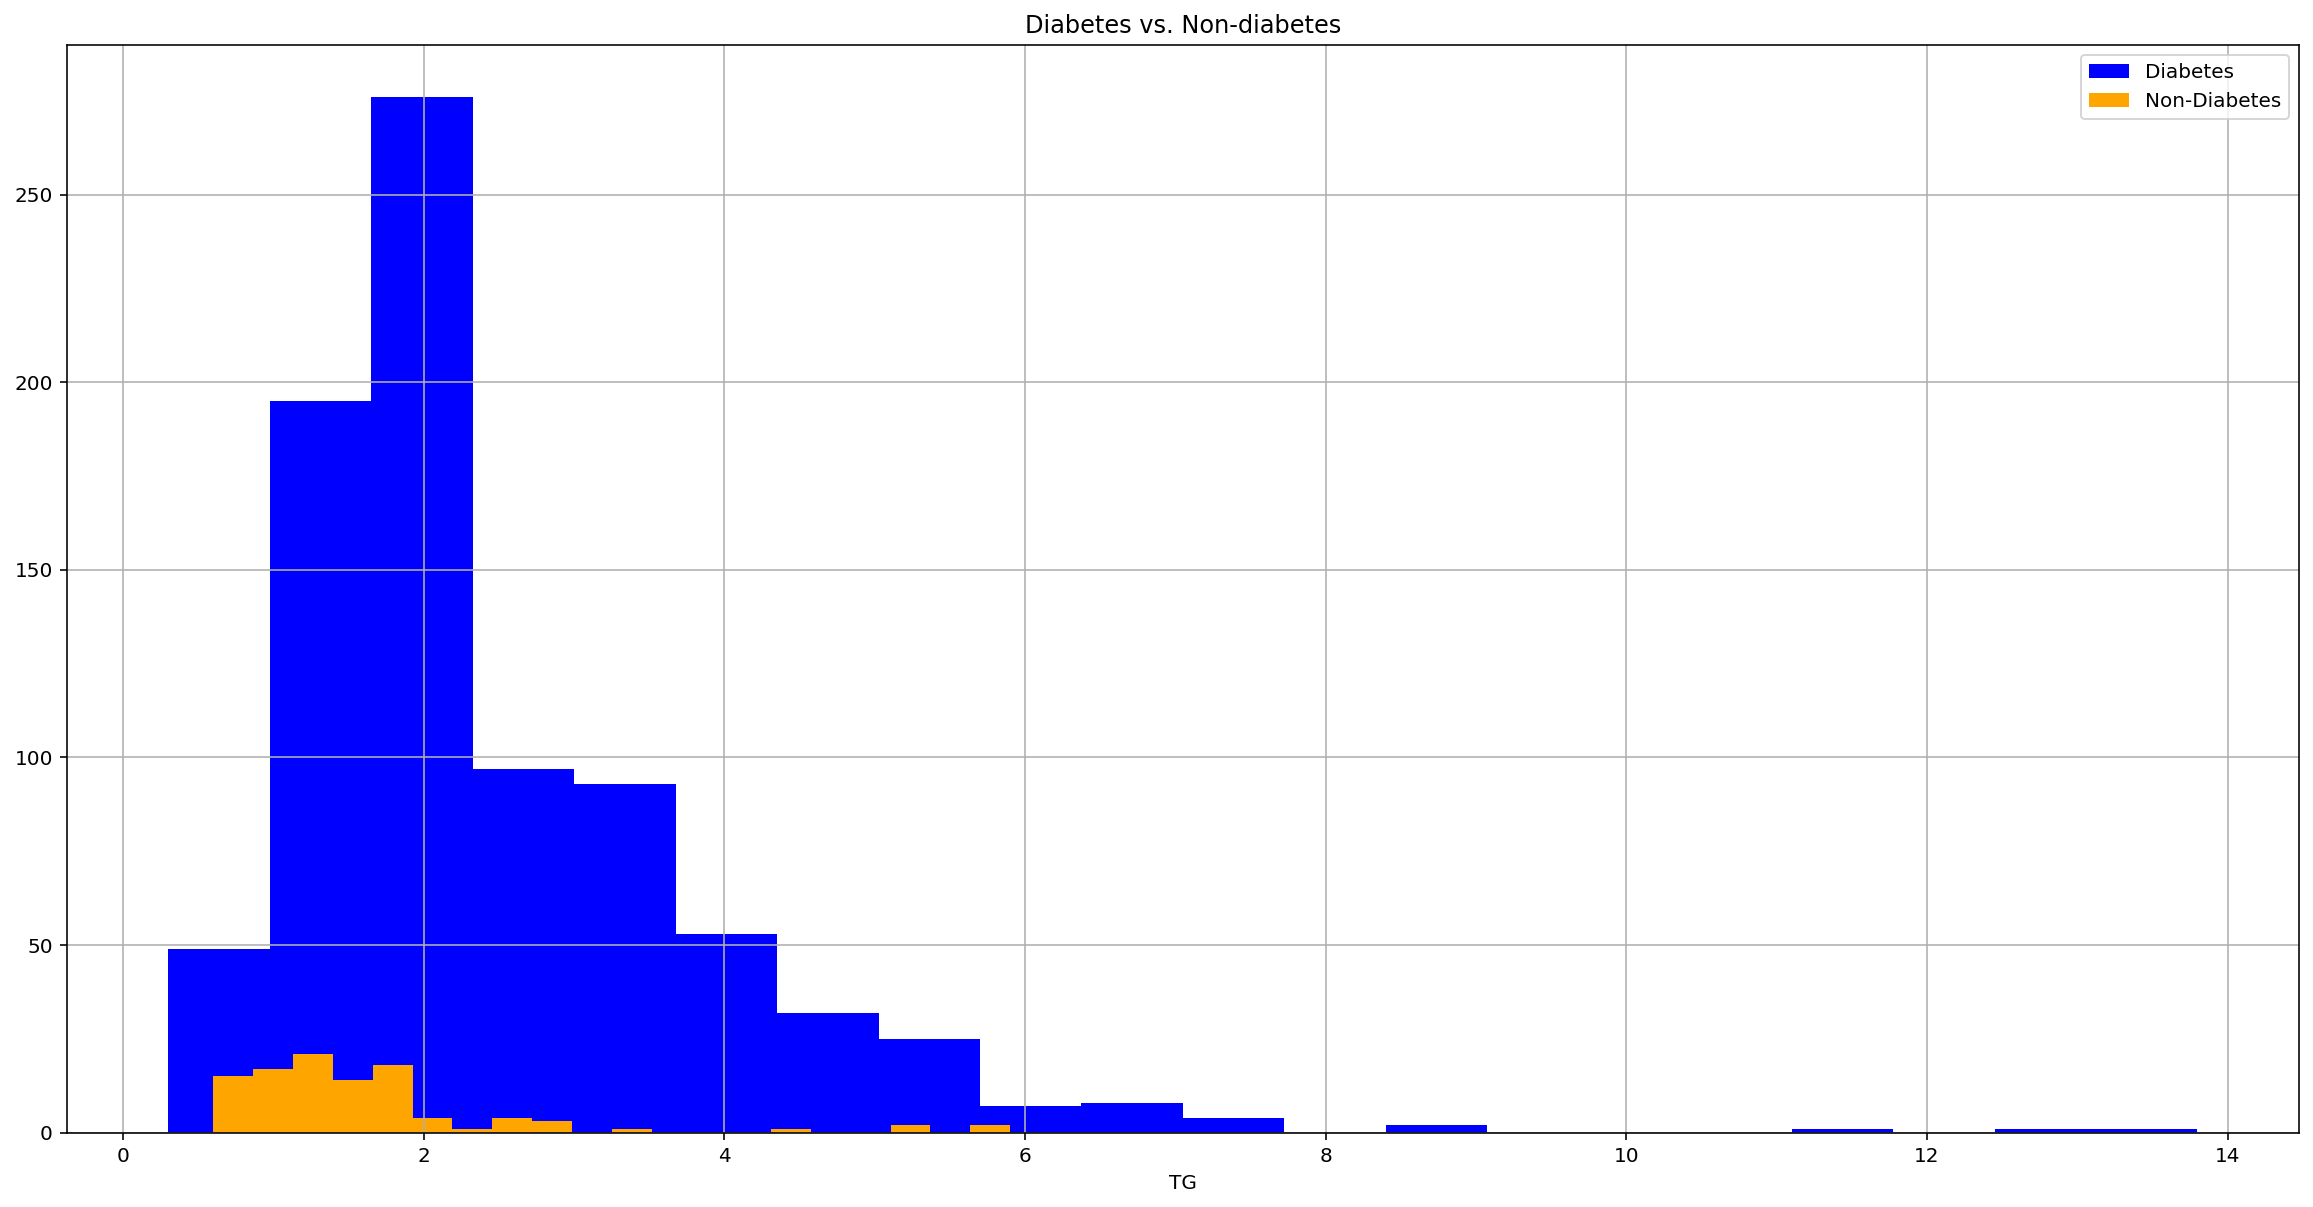

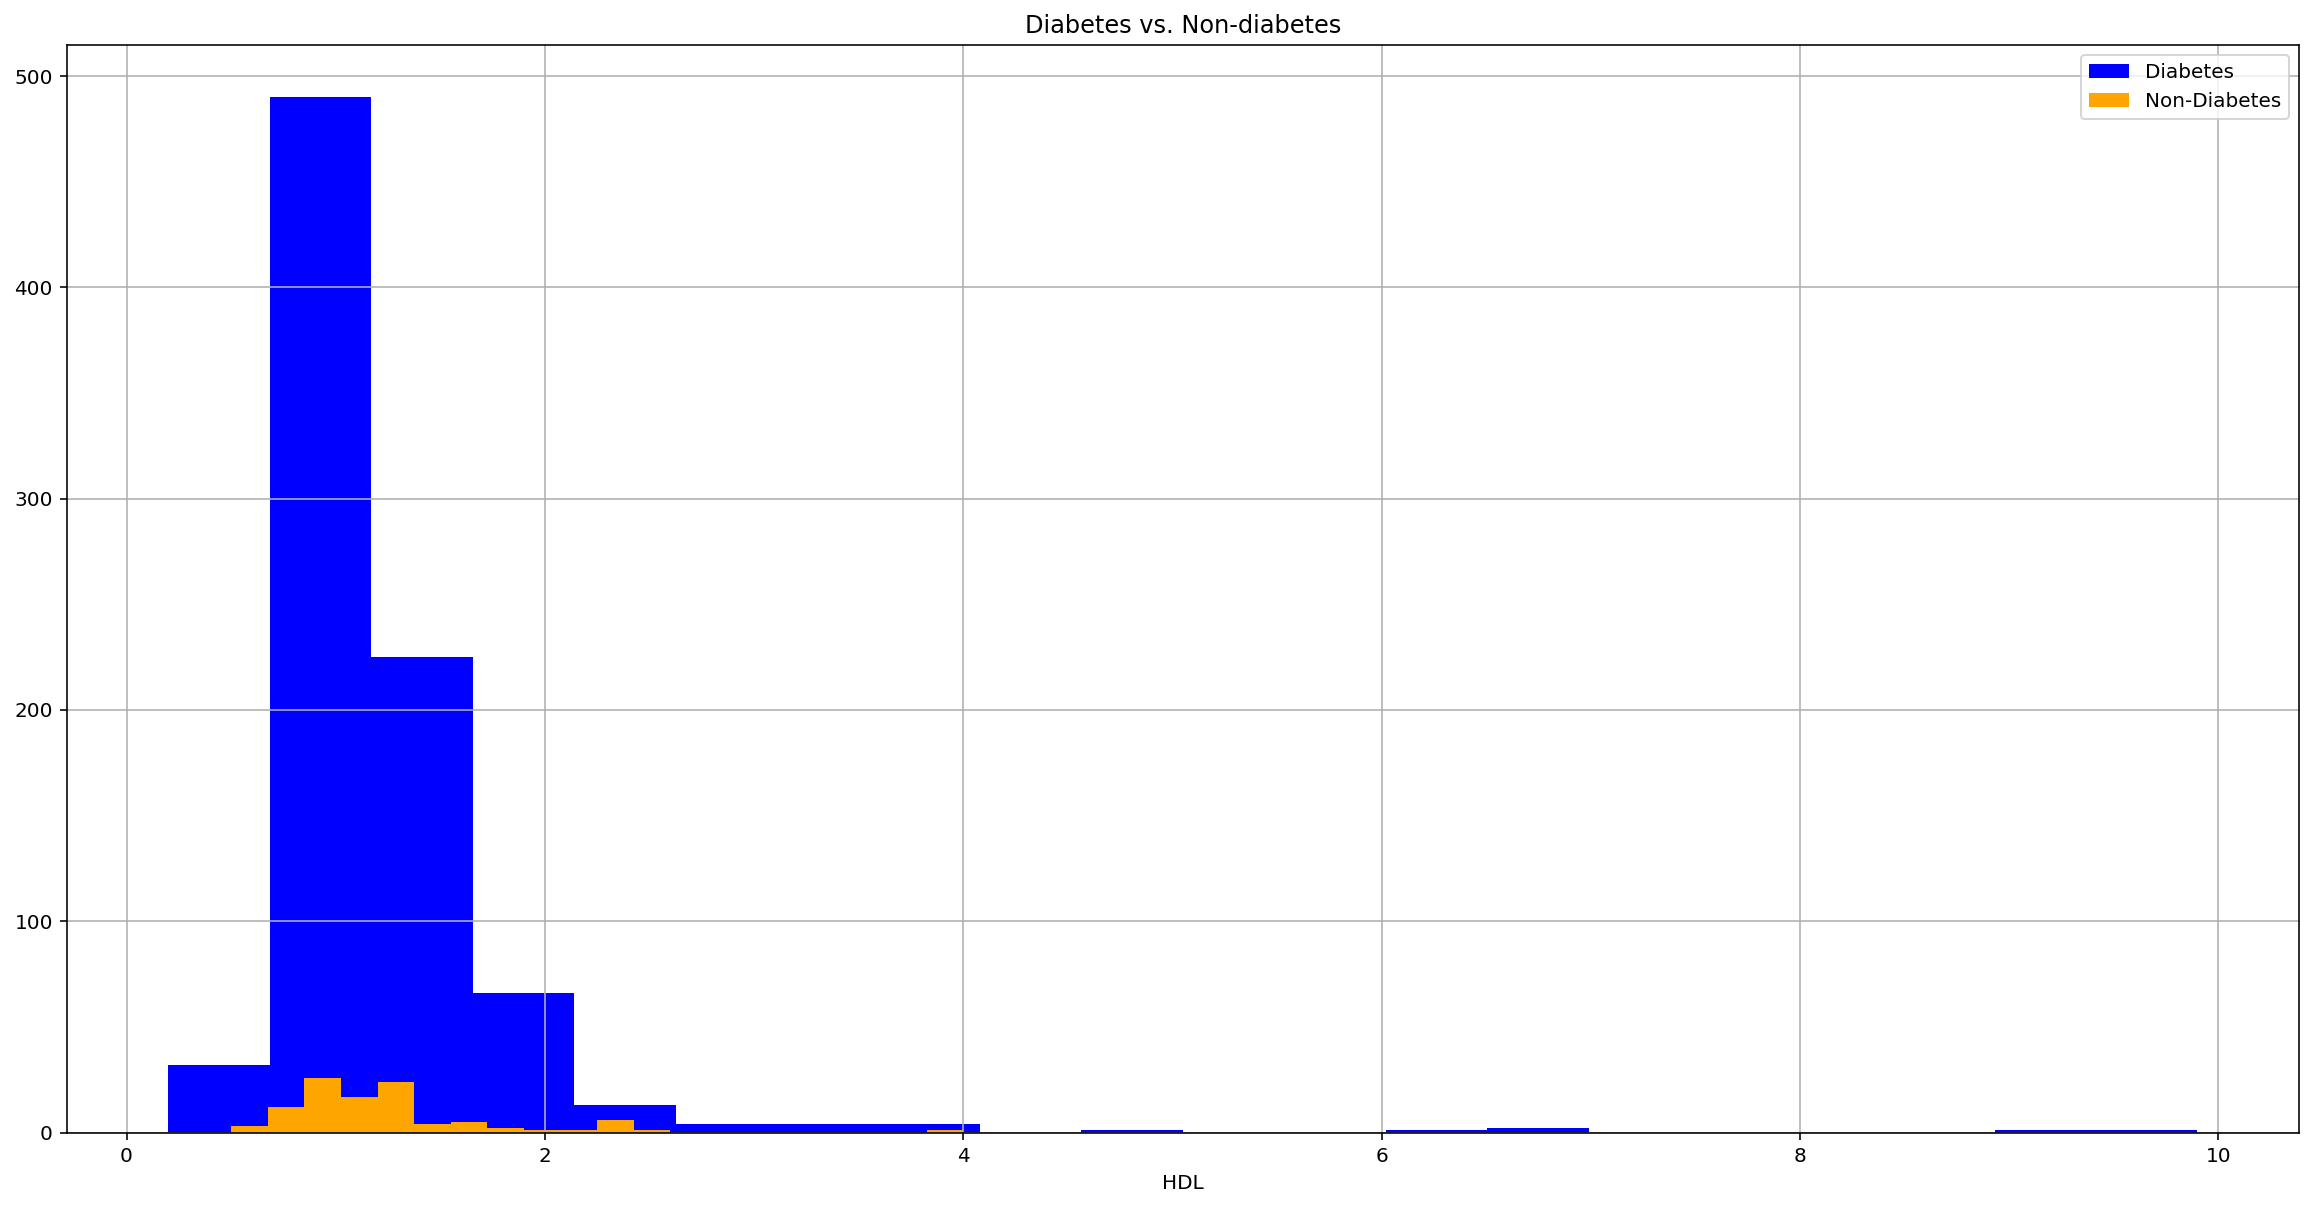

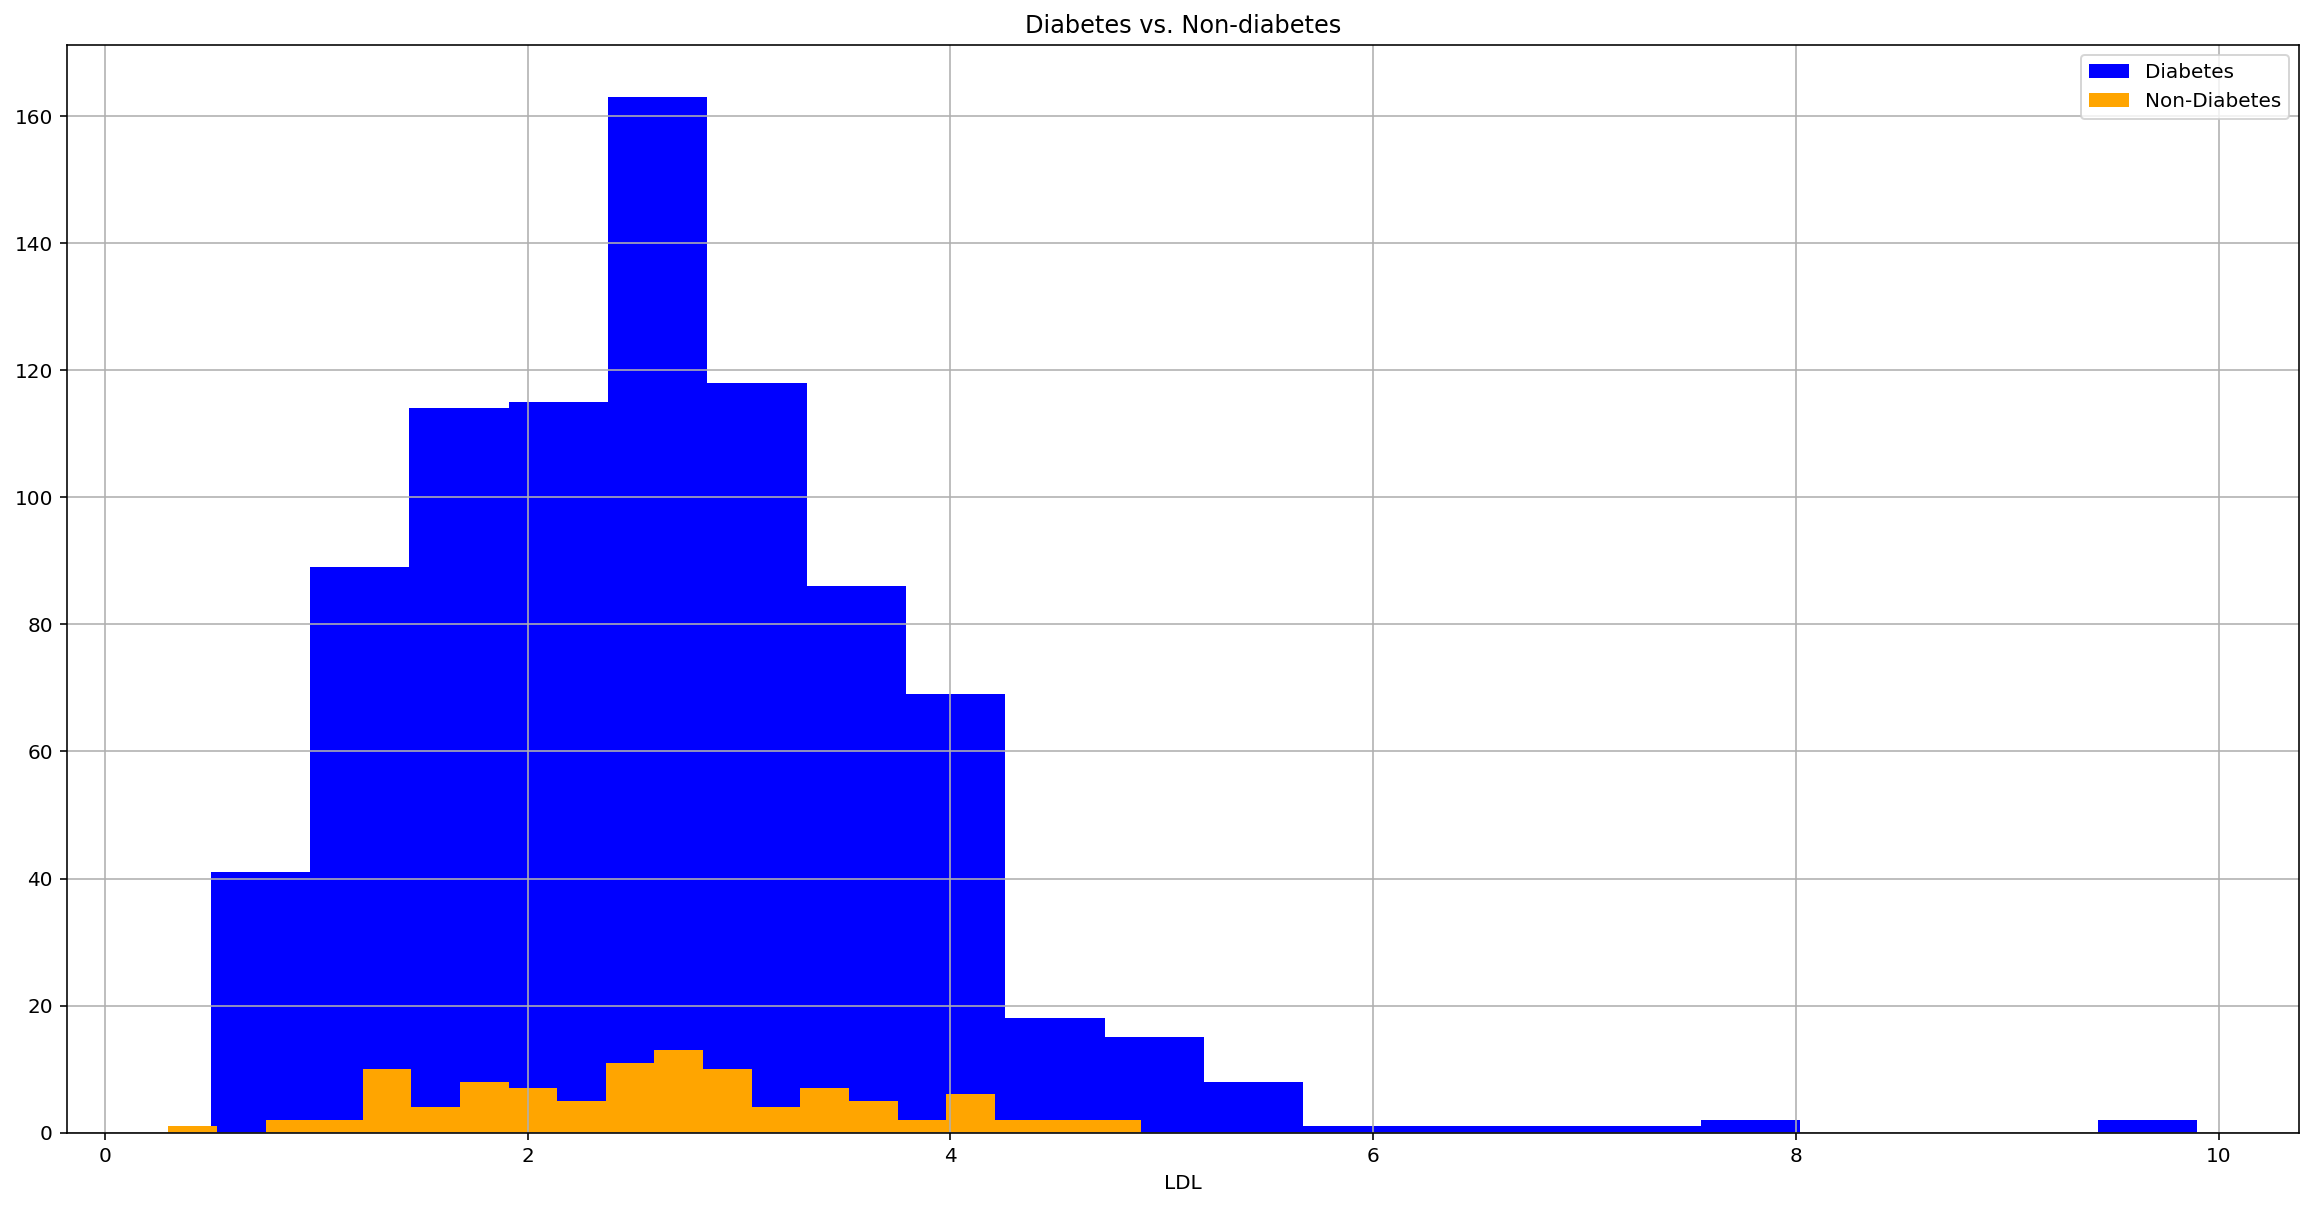

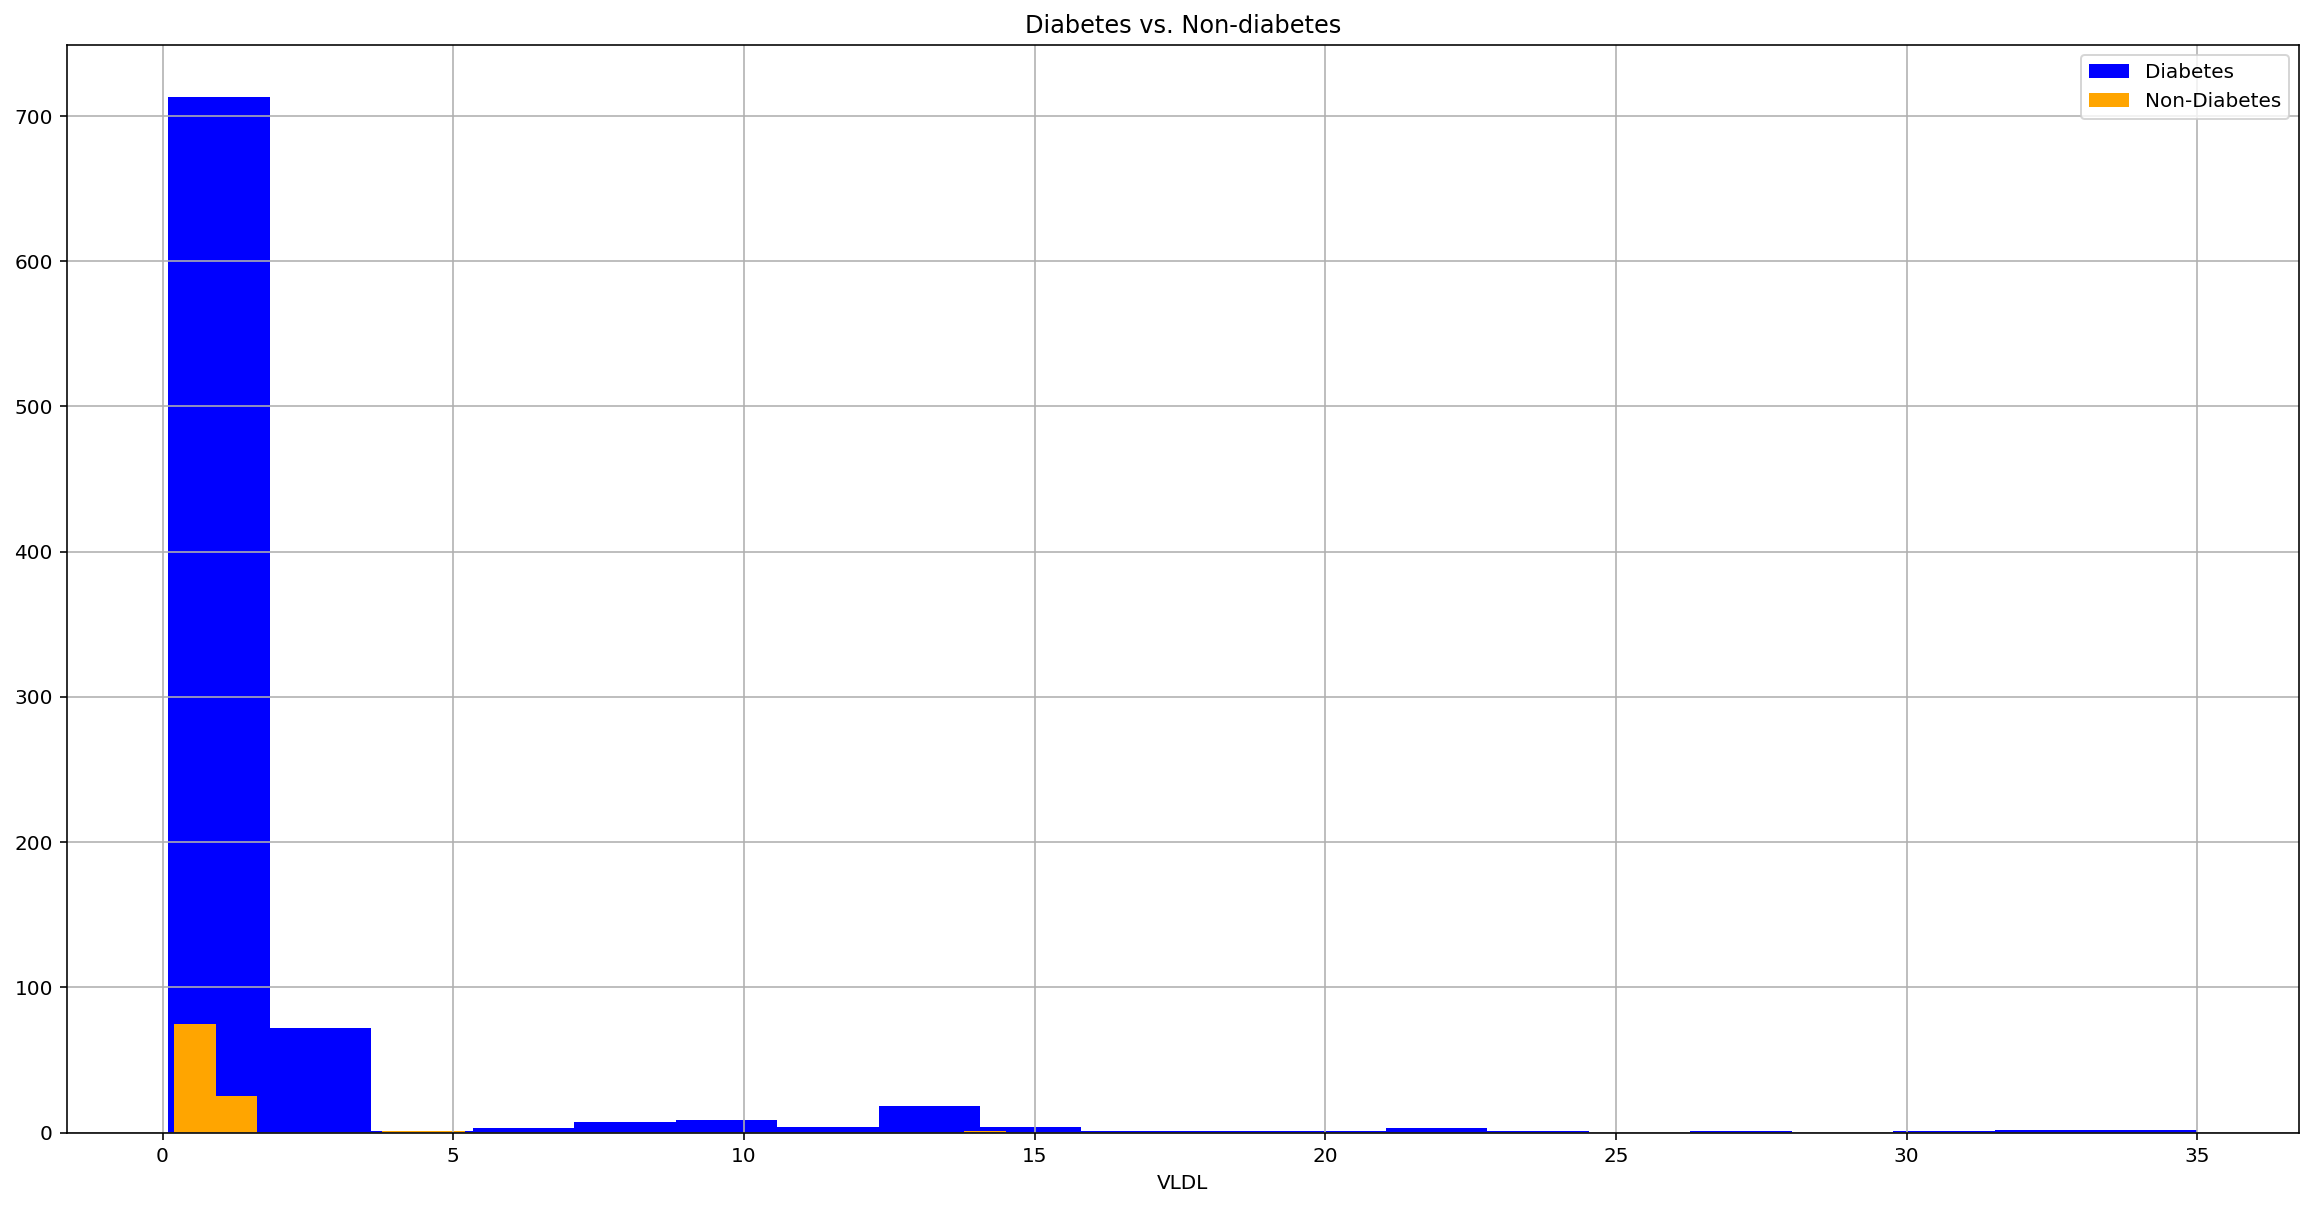

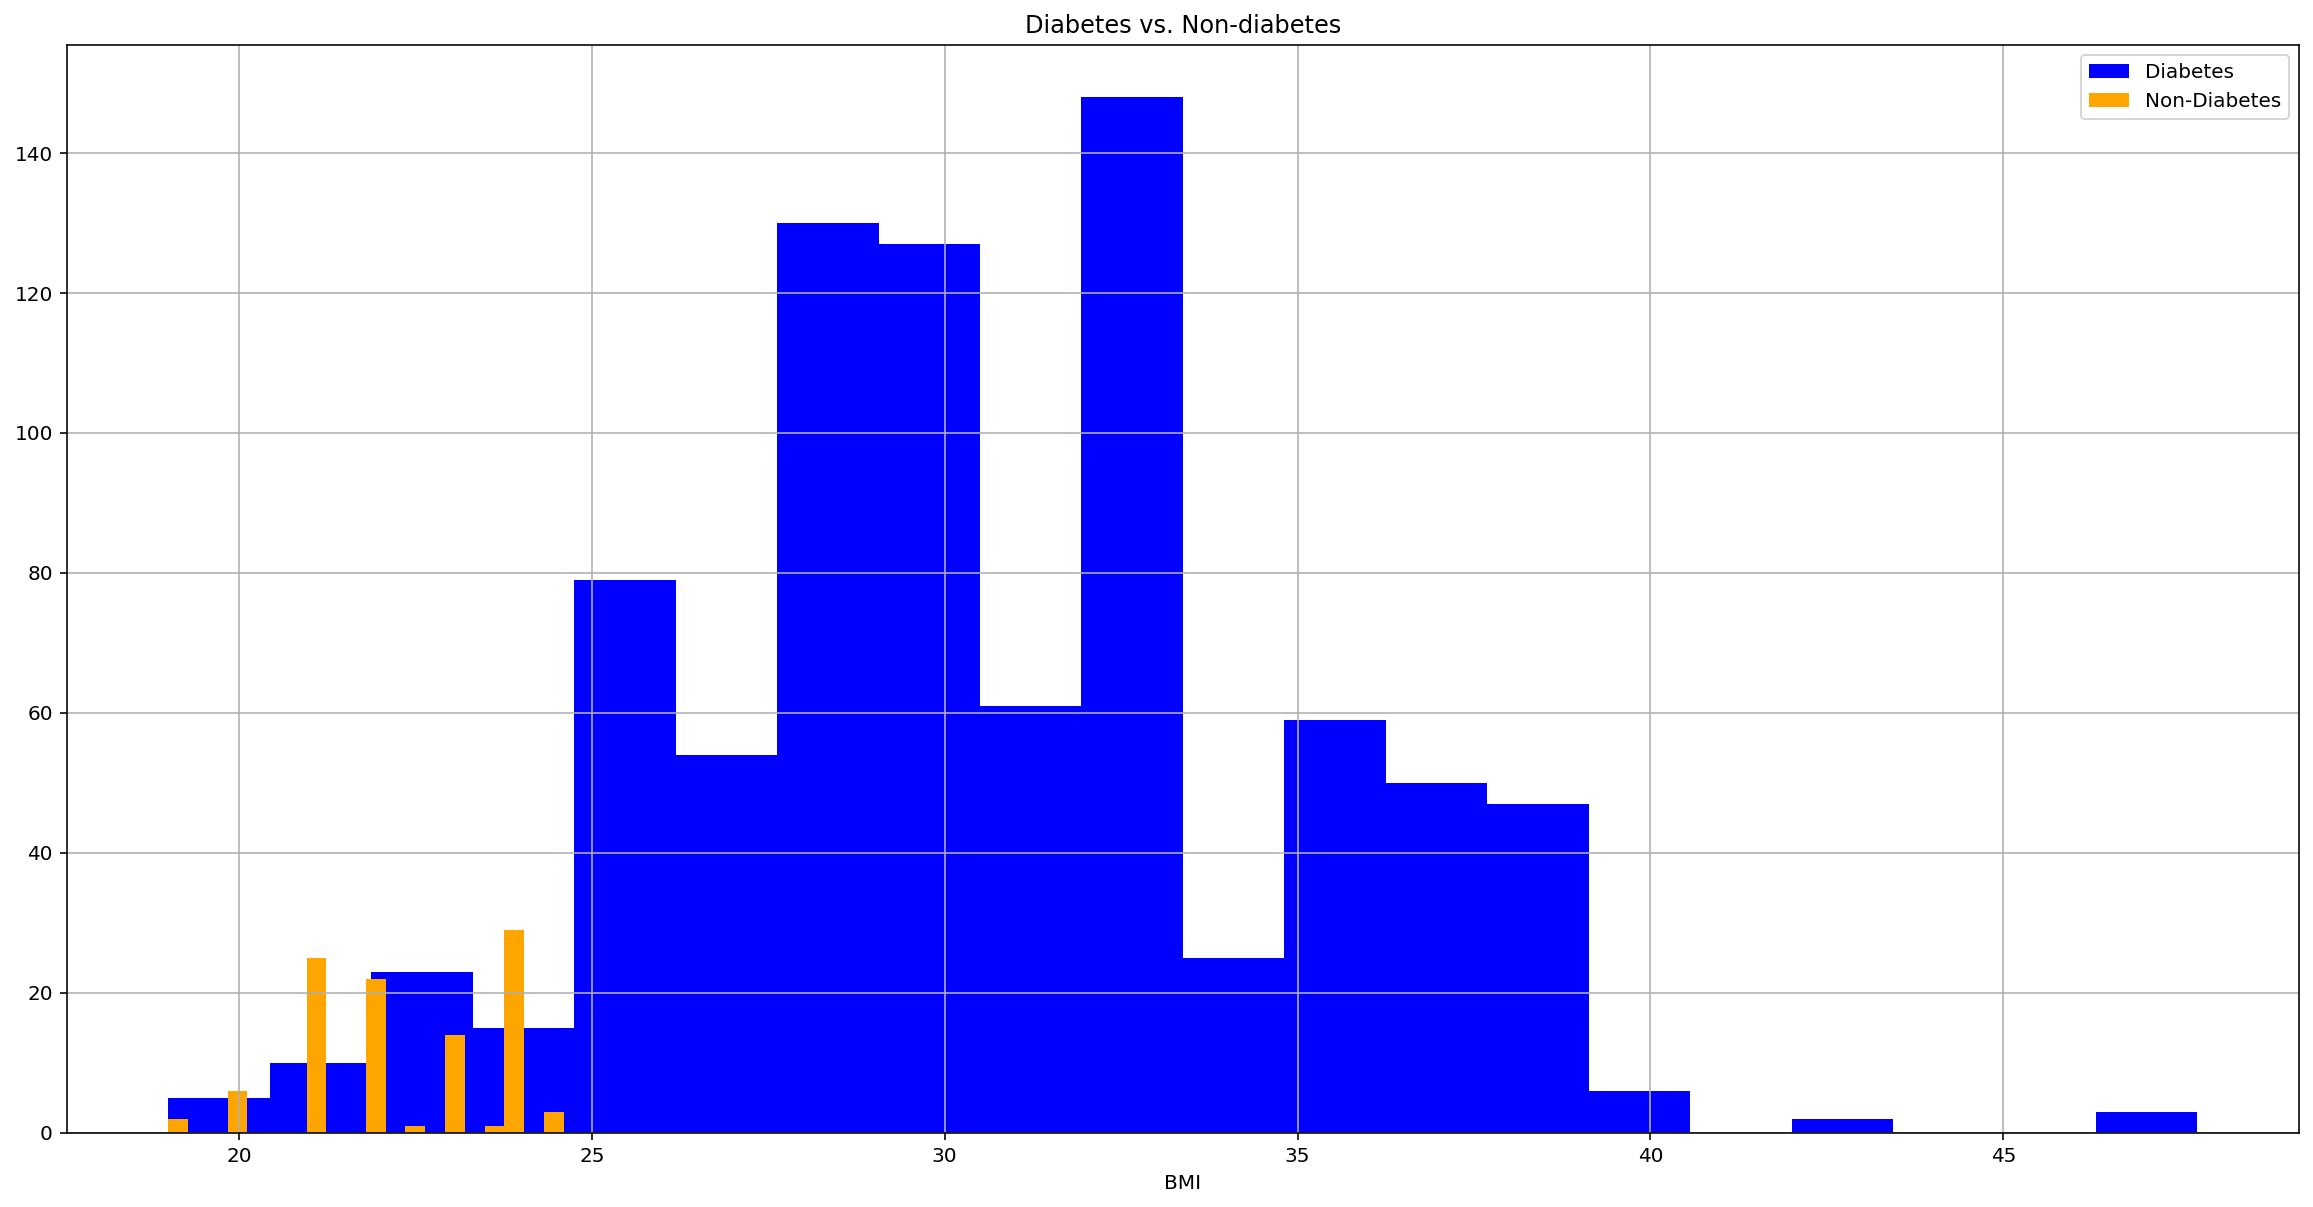

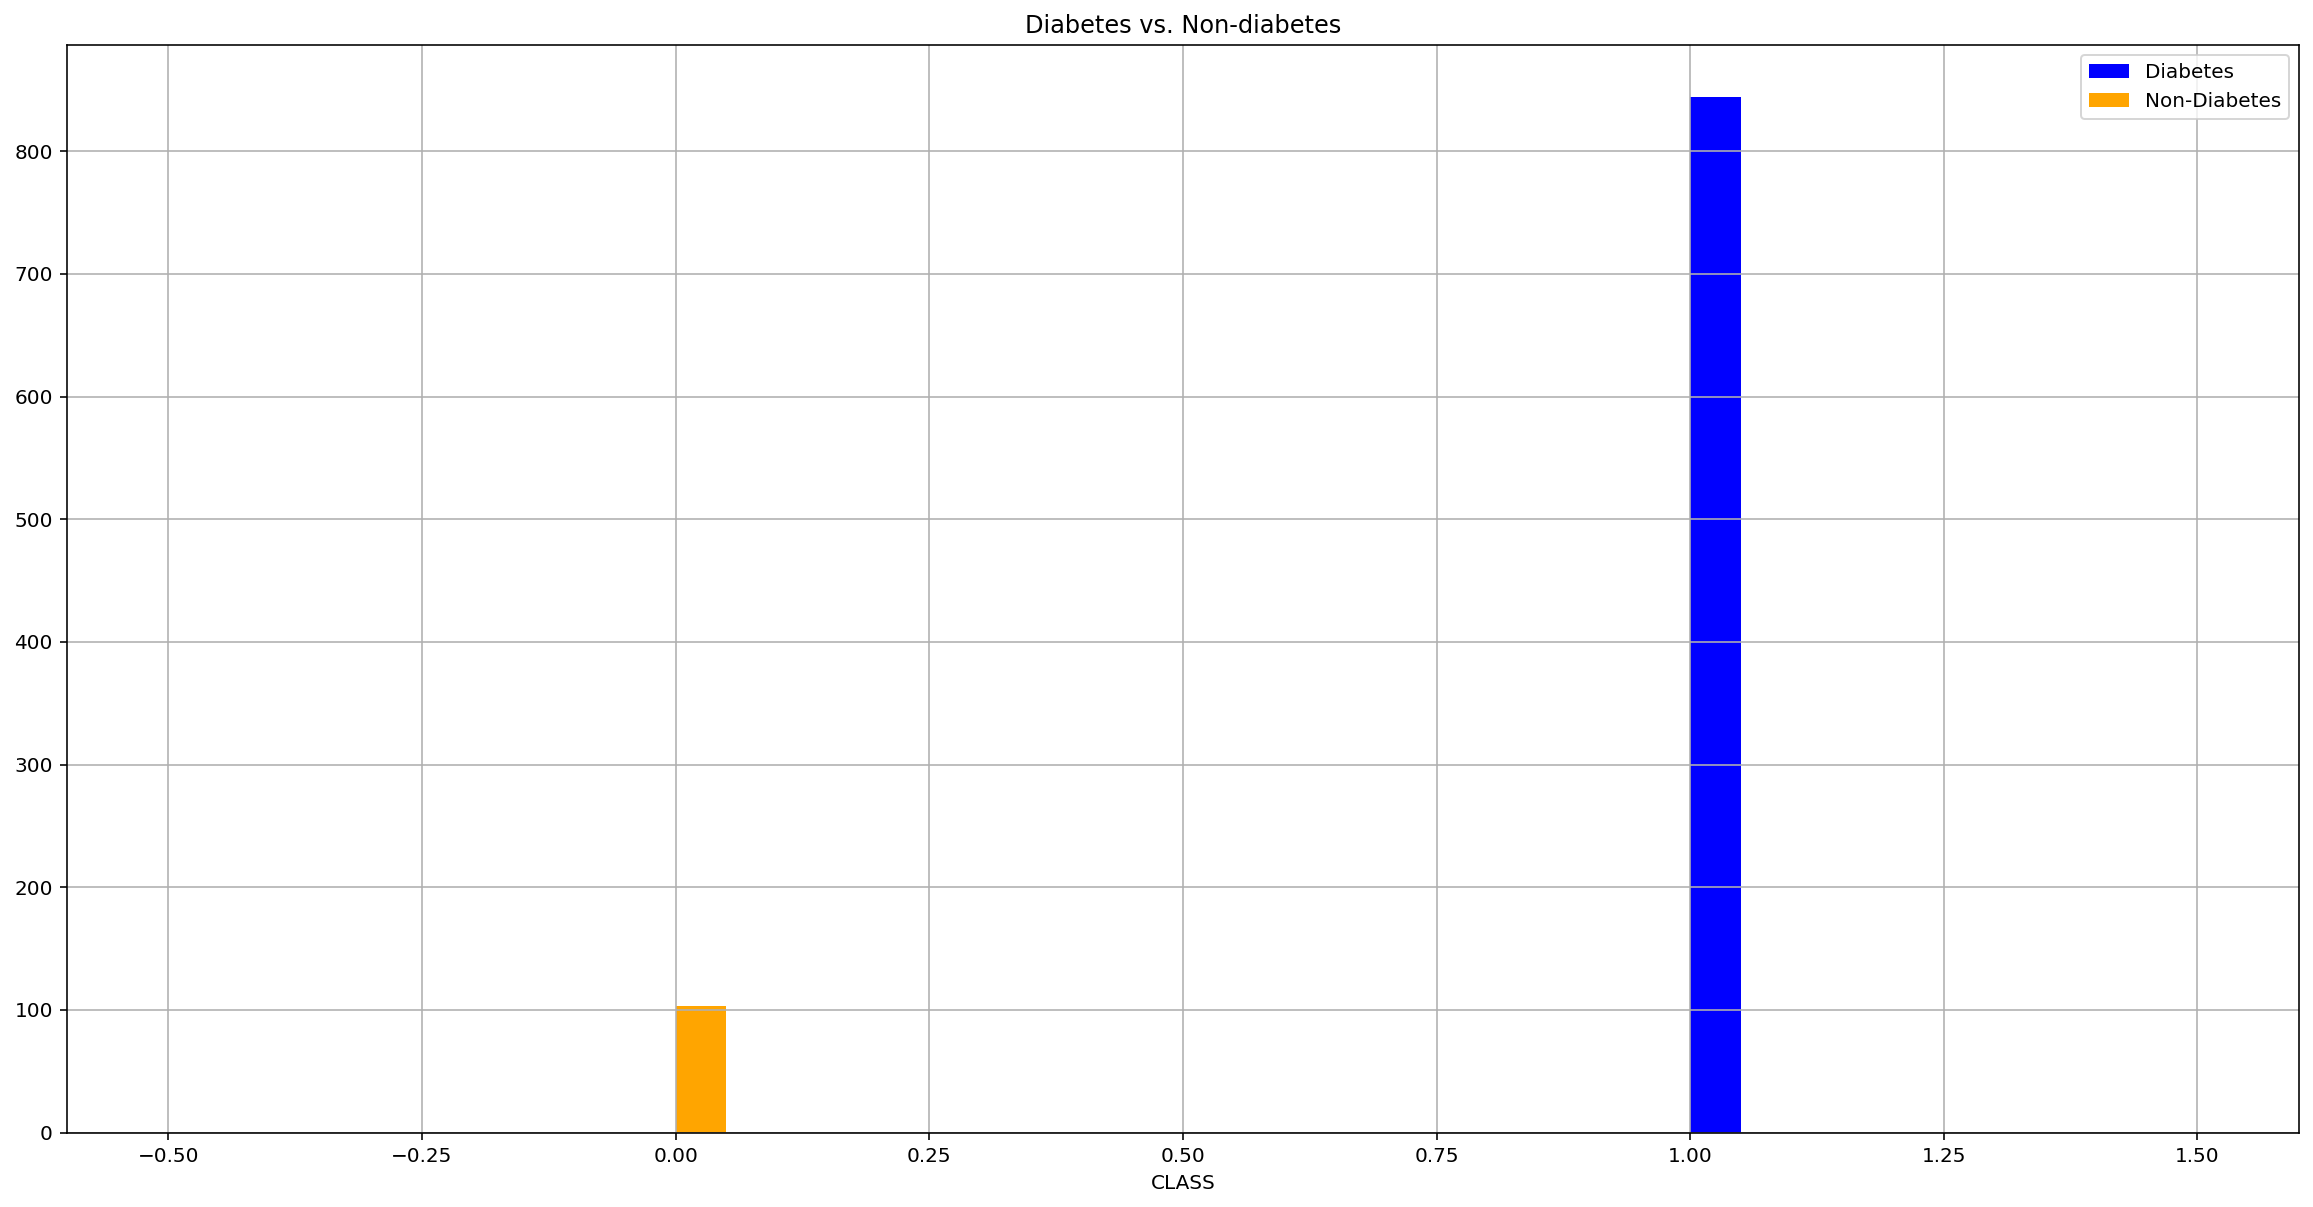

In [12]:
diabete = df_copy[df_copy['CLASS']==1]  # dataset with thoese who have diabetes
non_diabete = df_copy[df_copy['CLASS']==0]  # dataset with thoese who don't have diabetes
features_list = df_copy.columns  # a list of all columns

for var in features_list:
    plt.figure(figsize=(20,10))
    diabete[var].hist(bins=20)
    fig = diabete[var].hist(bins=20, color="blue", label="Diabetes")
    fig = non_diabete[var].hist(bins=20, color='orange', label = "Non-Diabetes")
    fig.set_title('Diabetes vs. Non-diabetes')
    fig.set_xlabel(var)
    fig.legend()
    plt.show()


### Since there are far more patients with diabetes, we can plot variables in parallel to get a better view

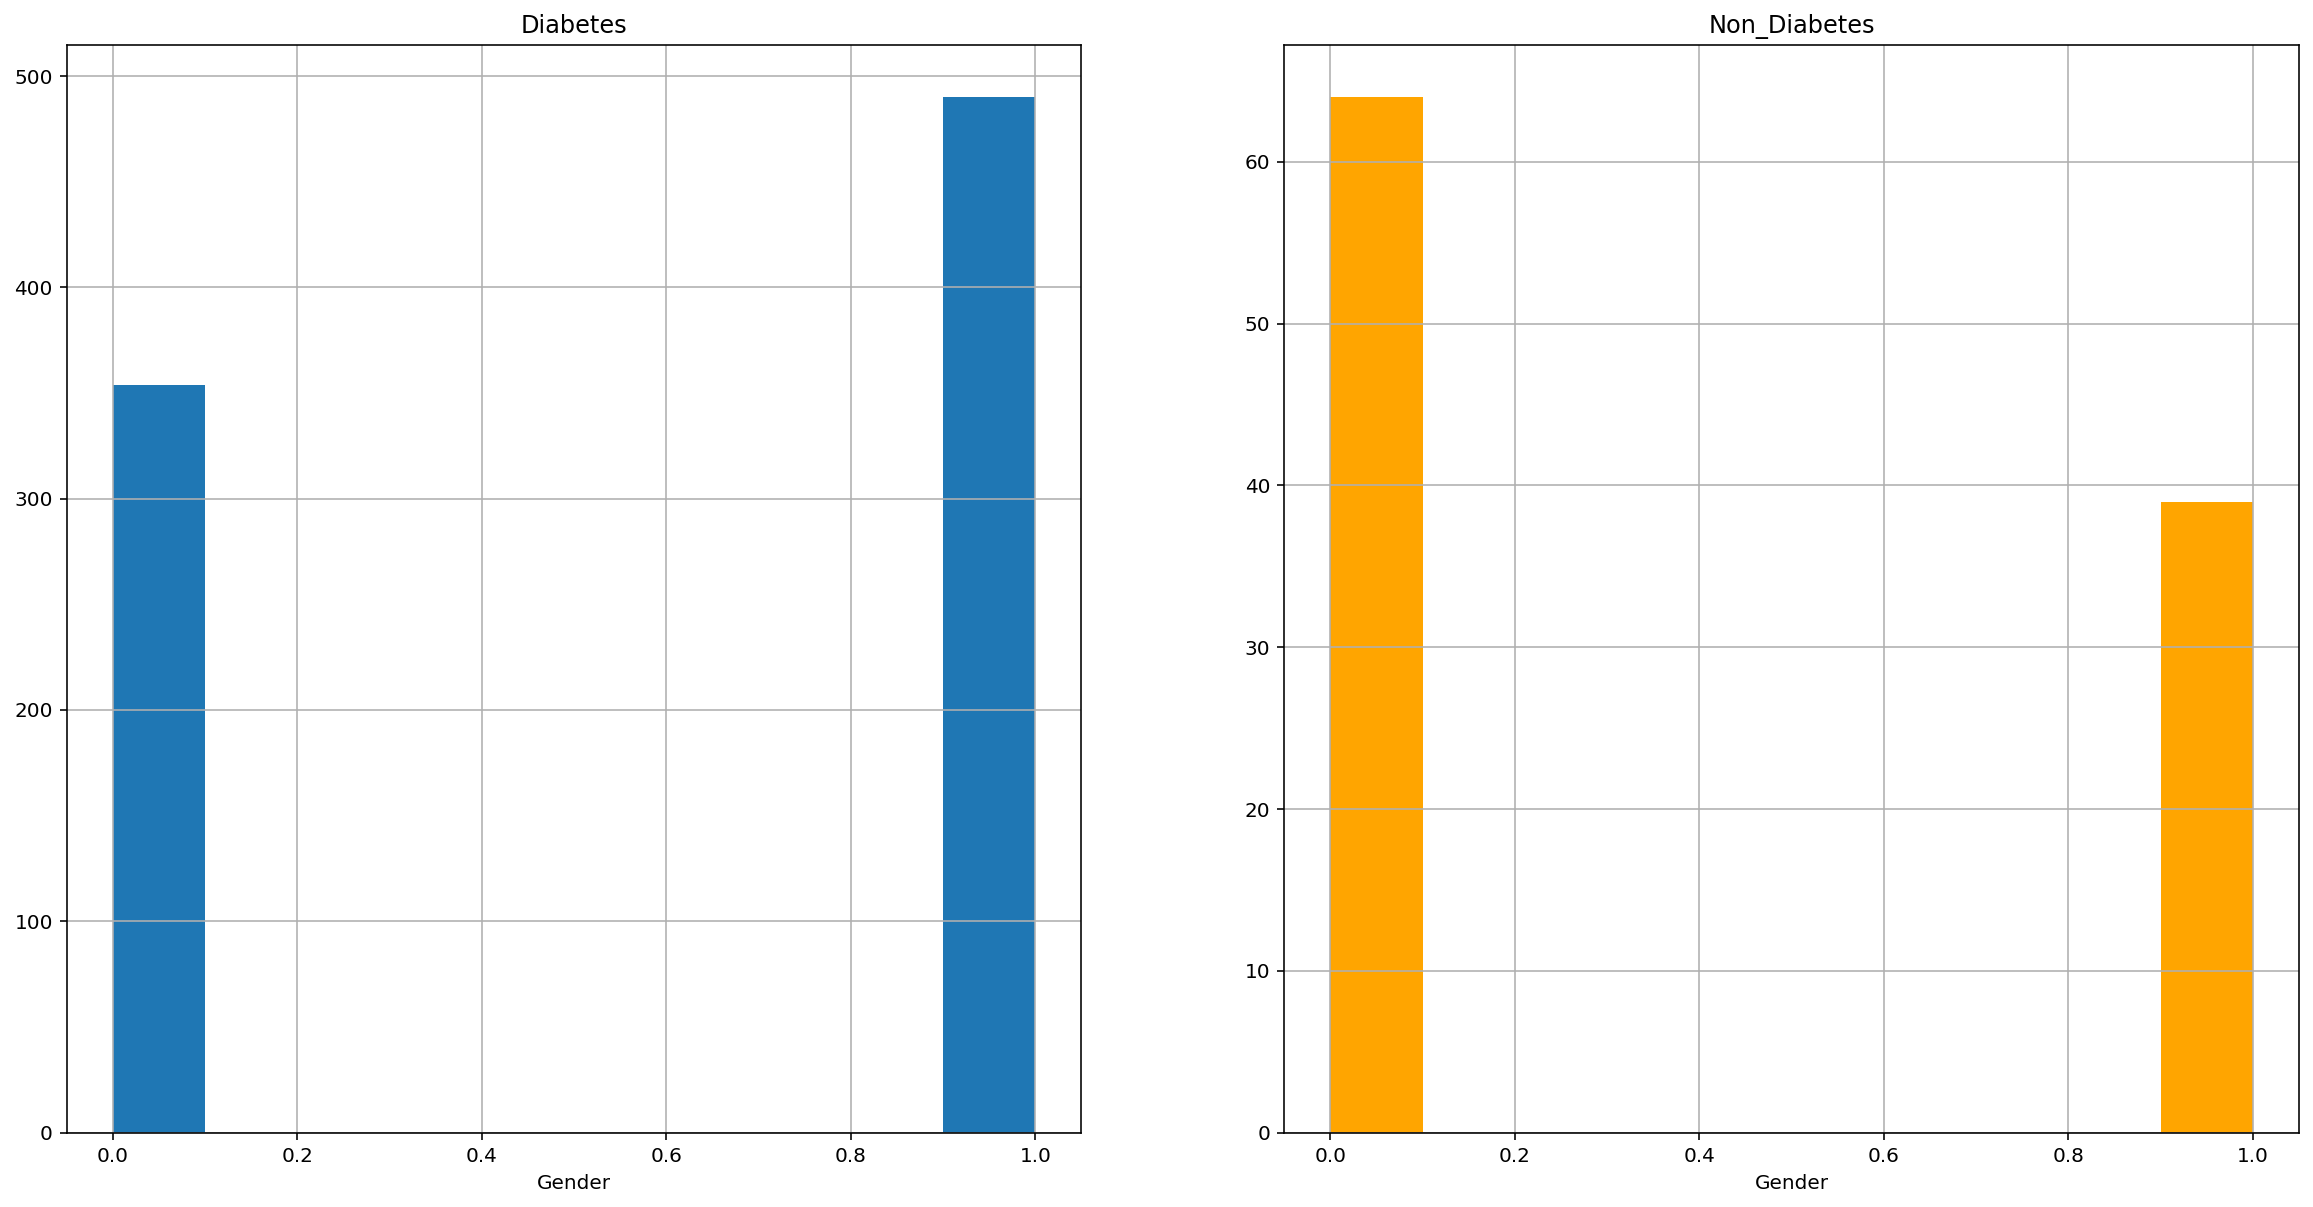

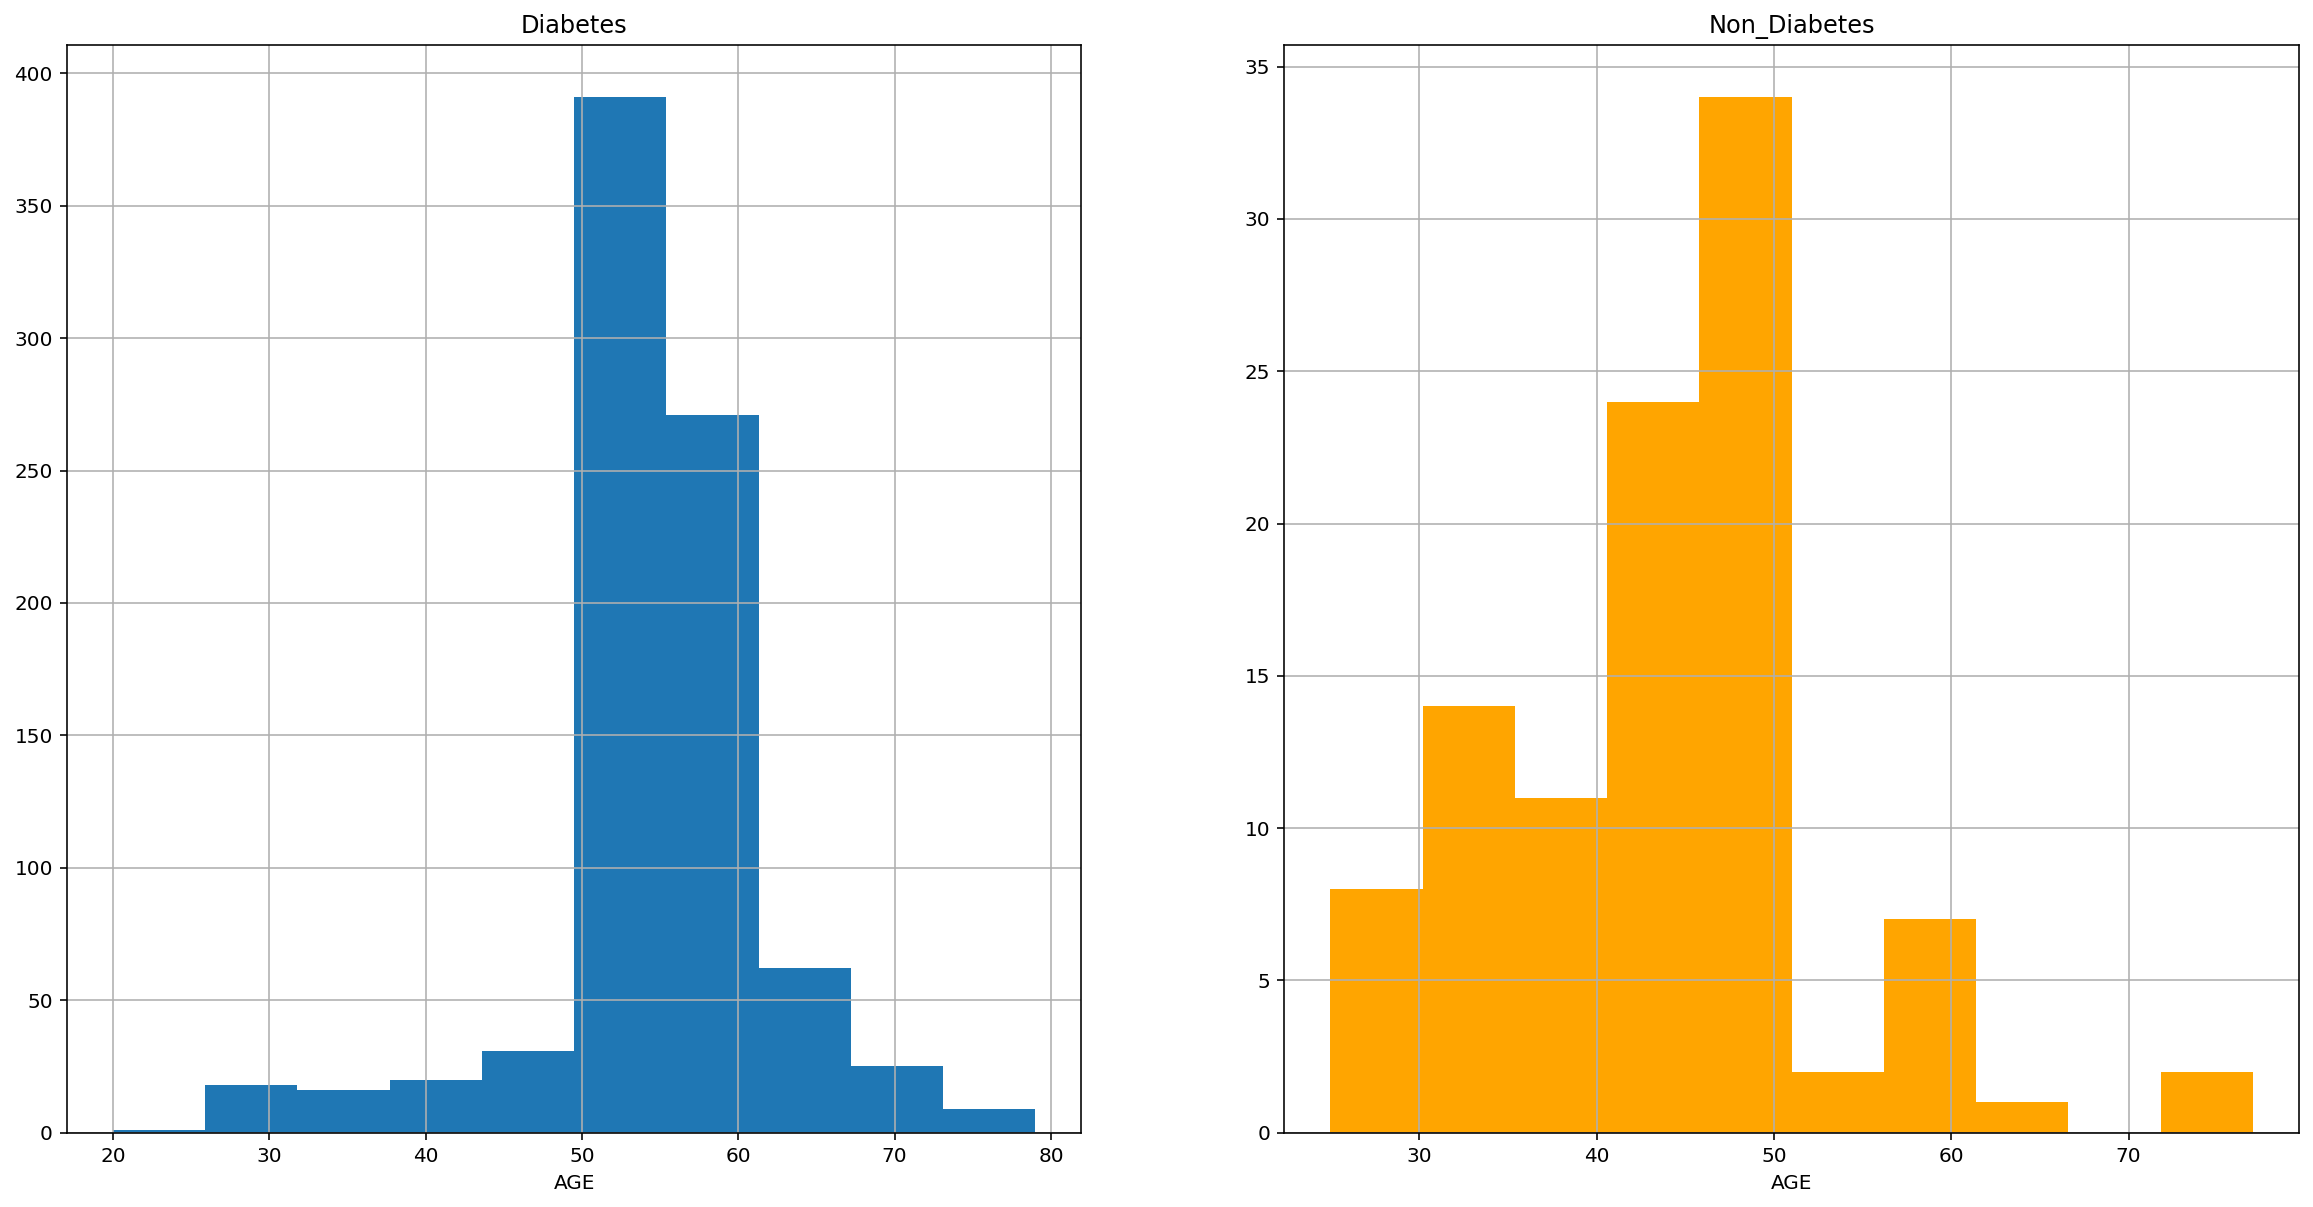

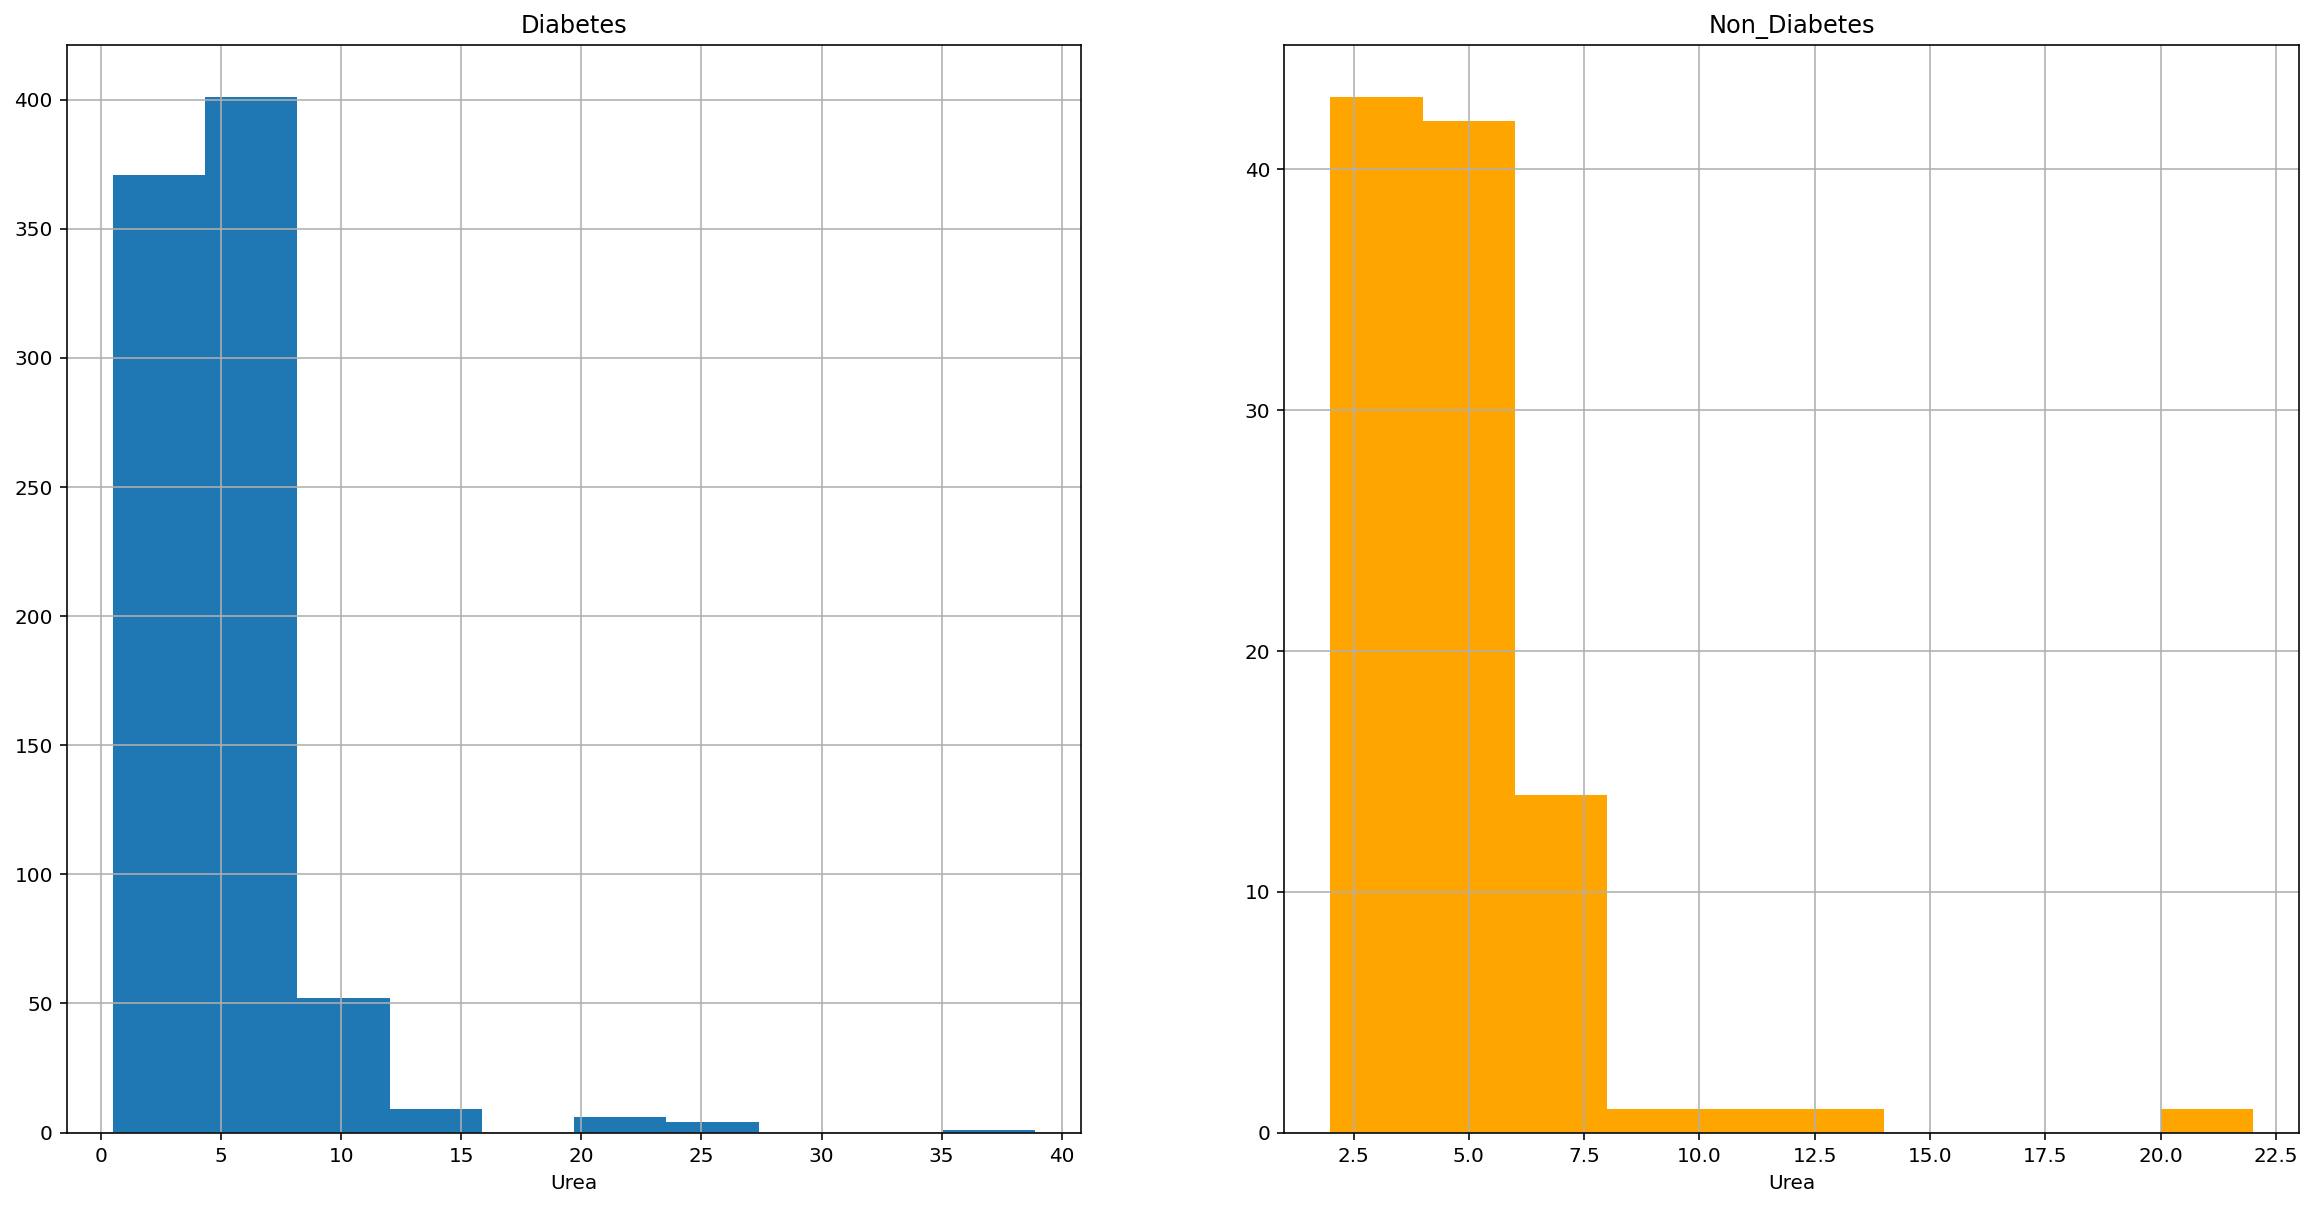

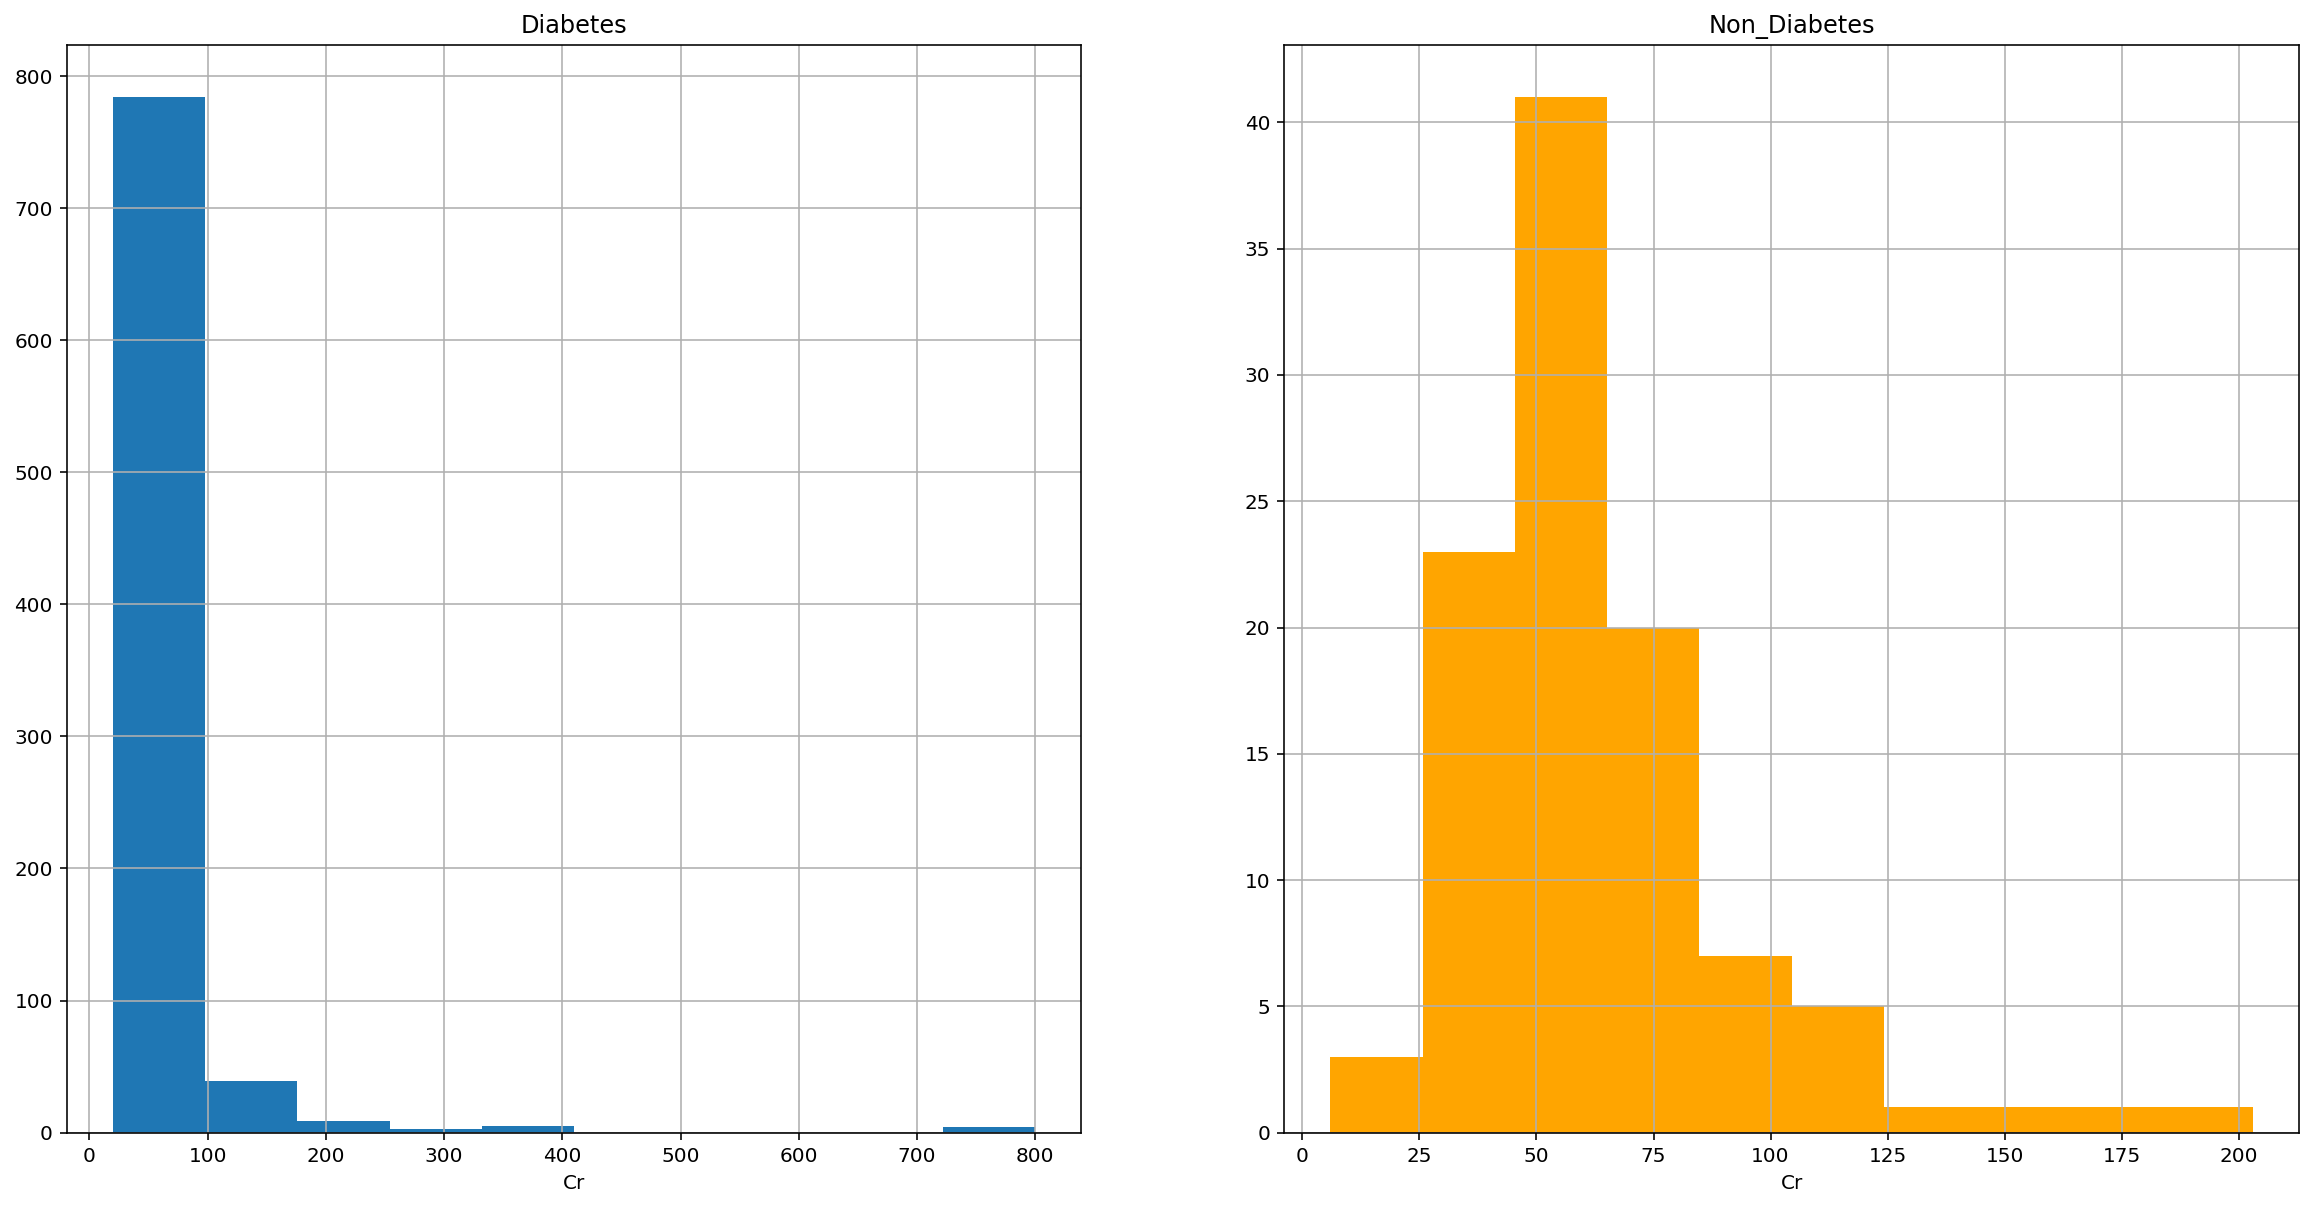

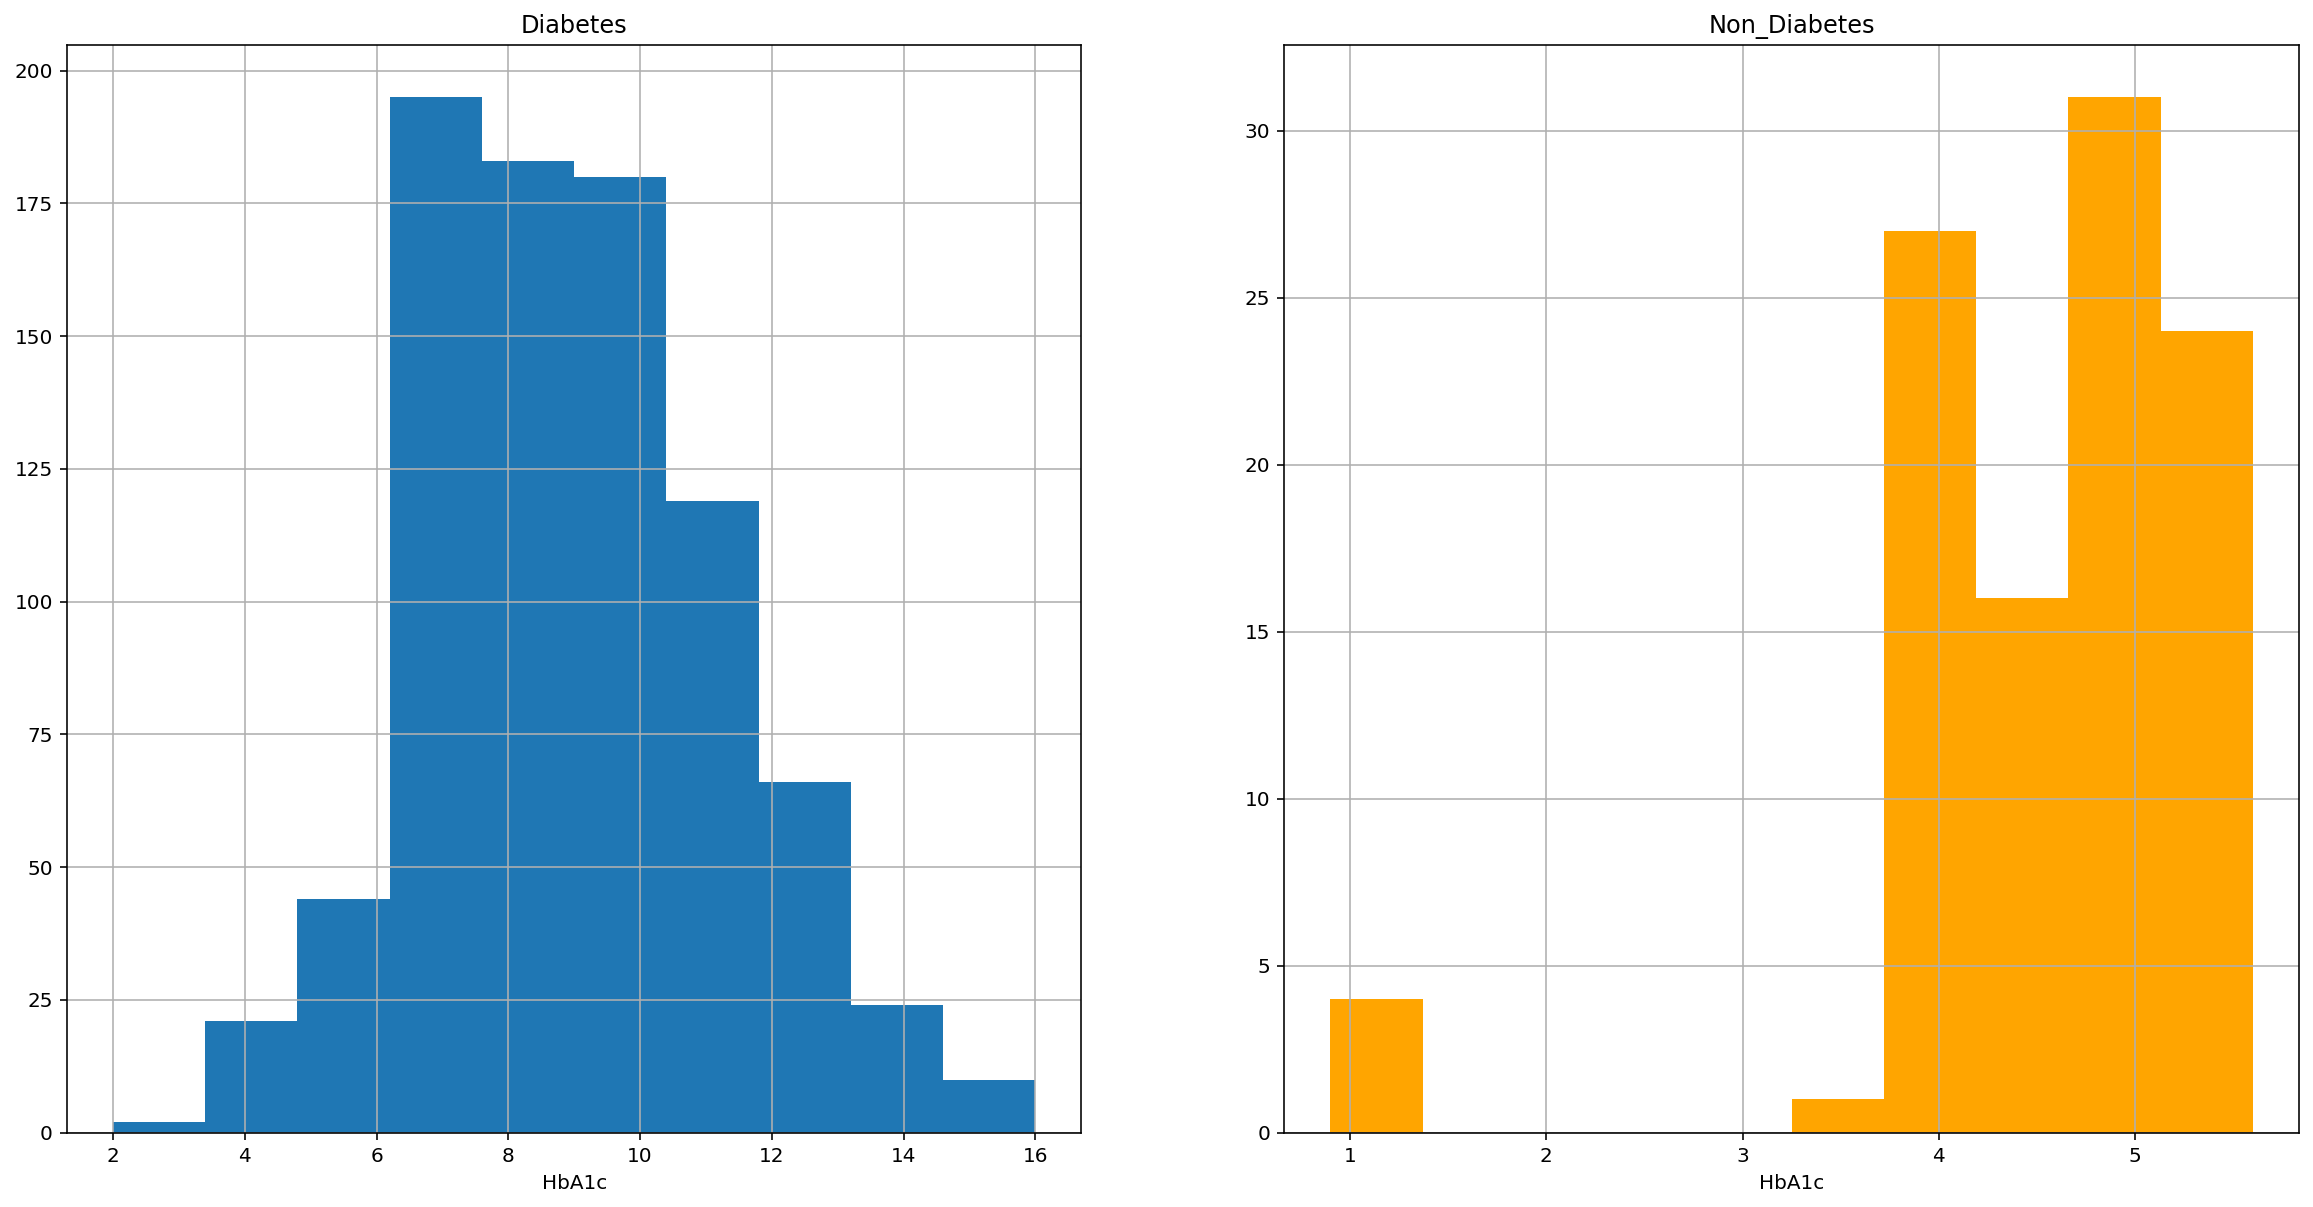

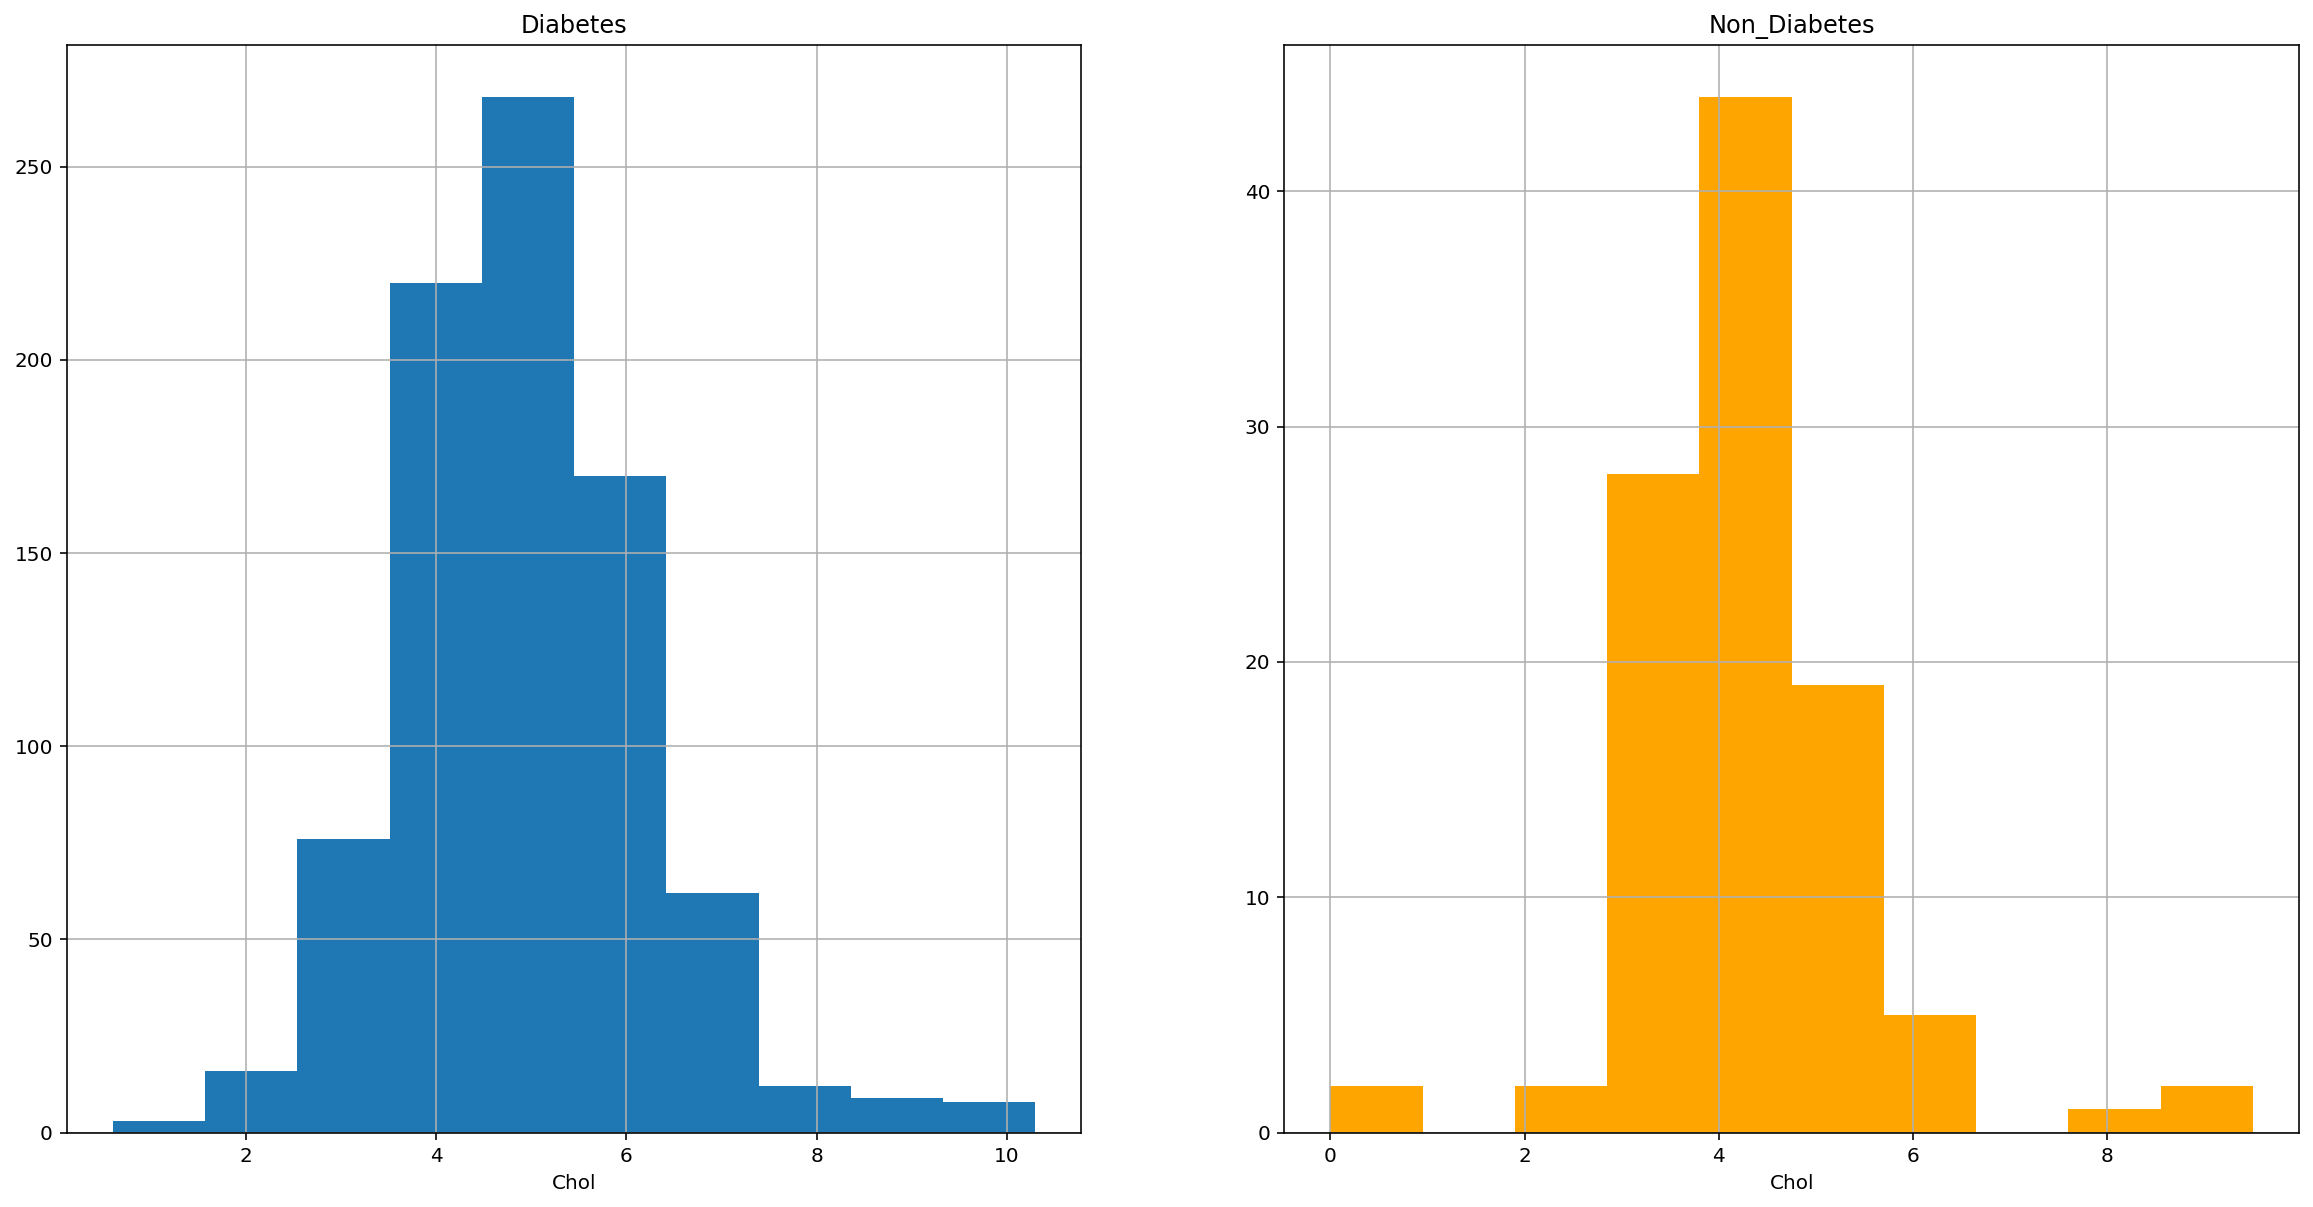

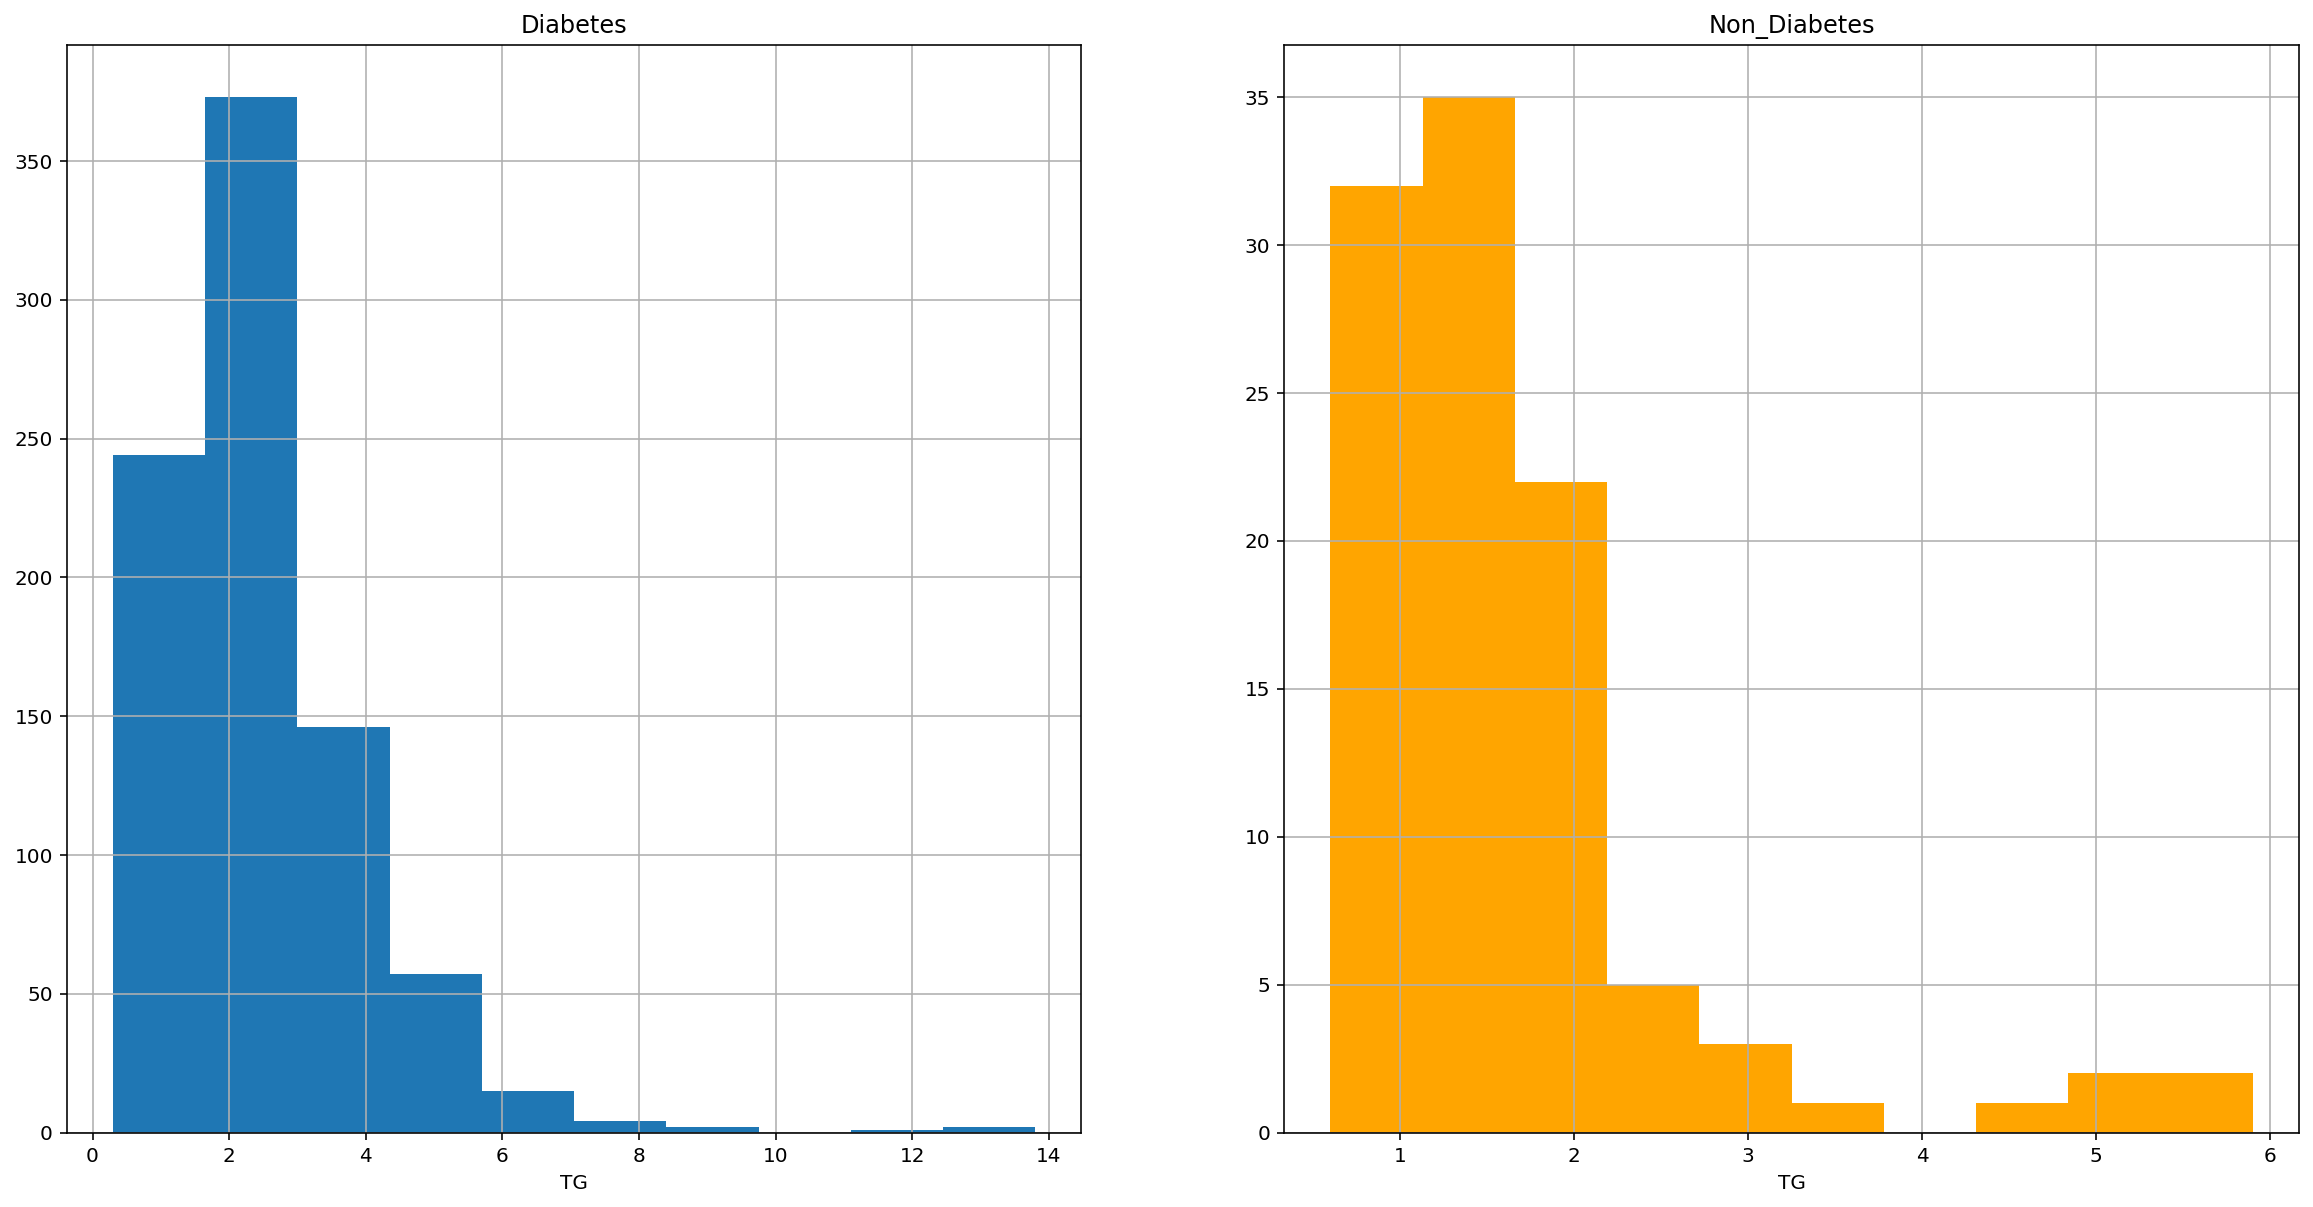

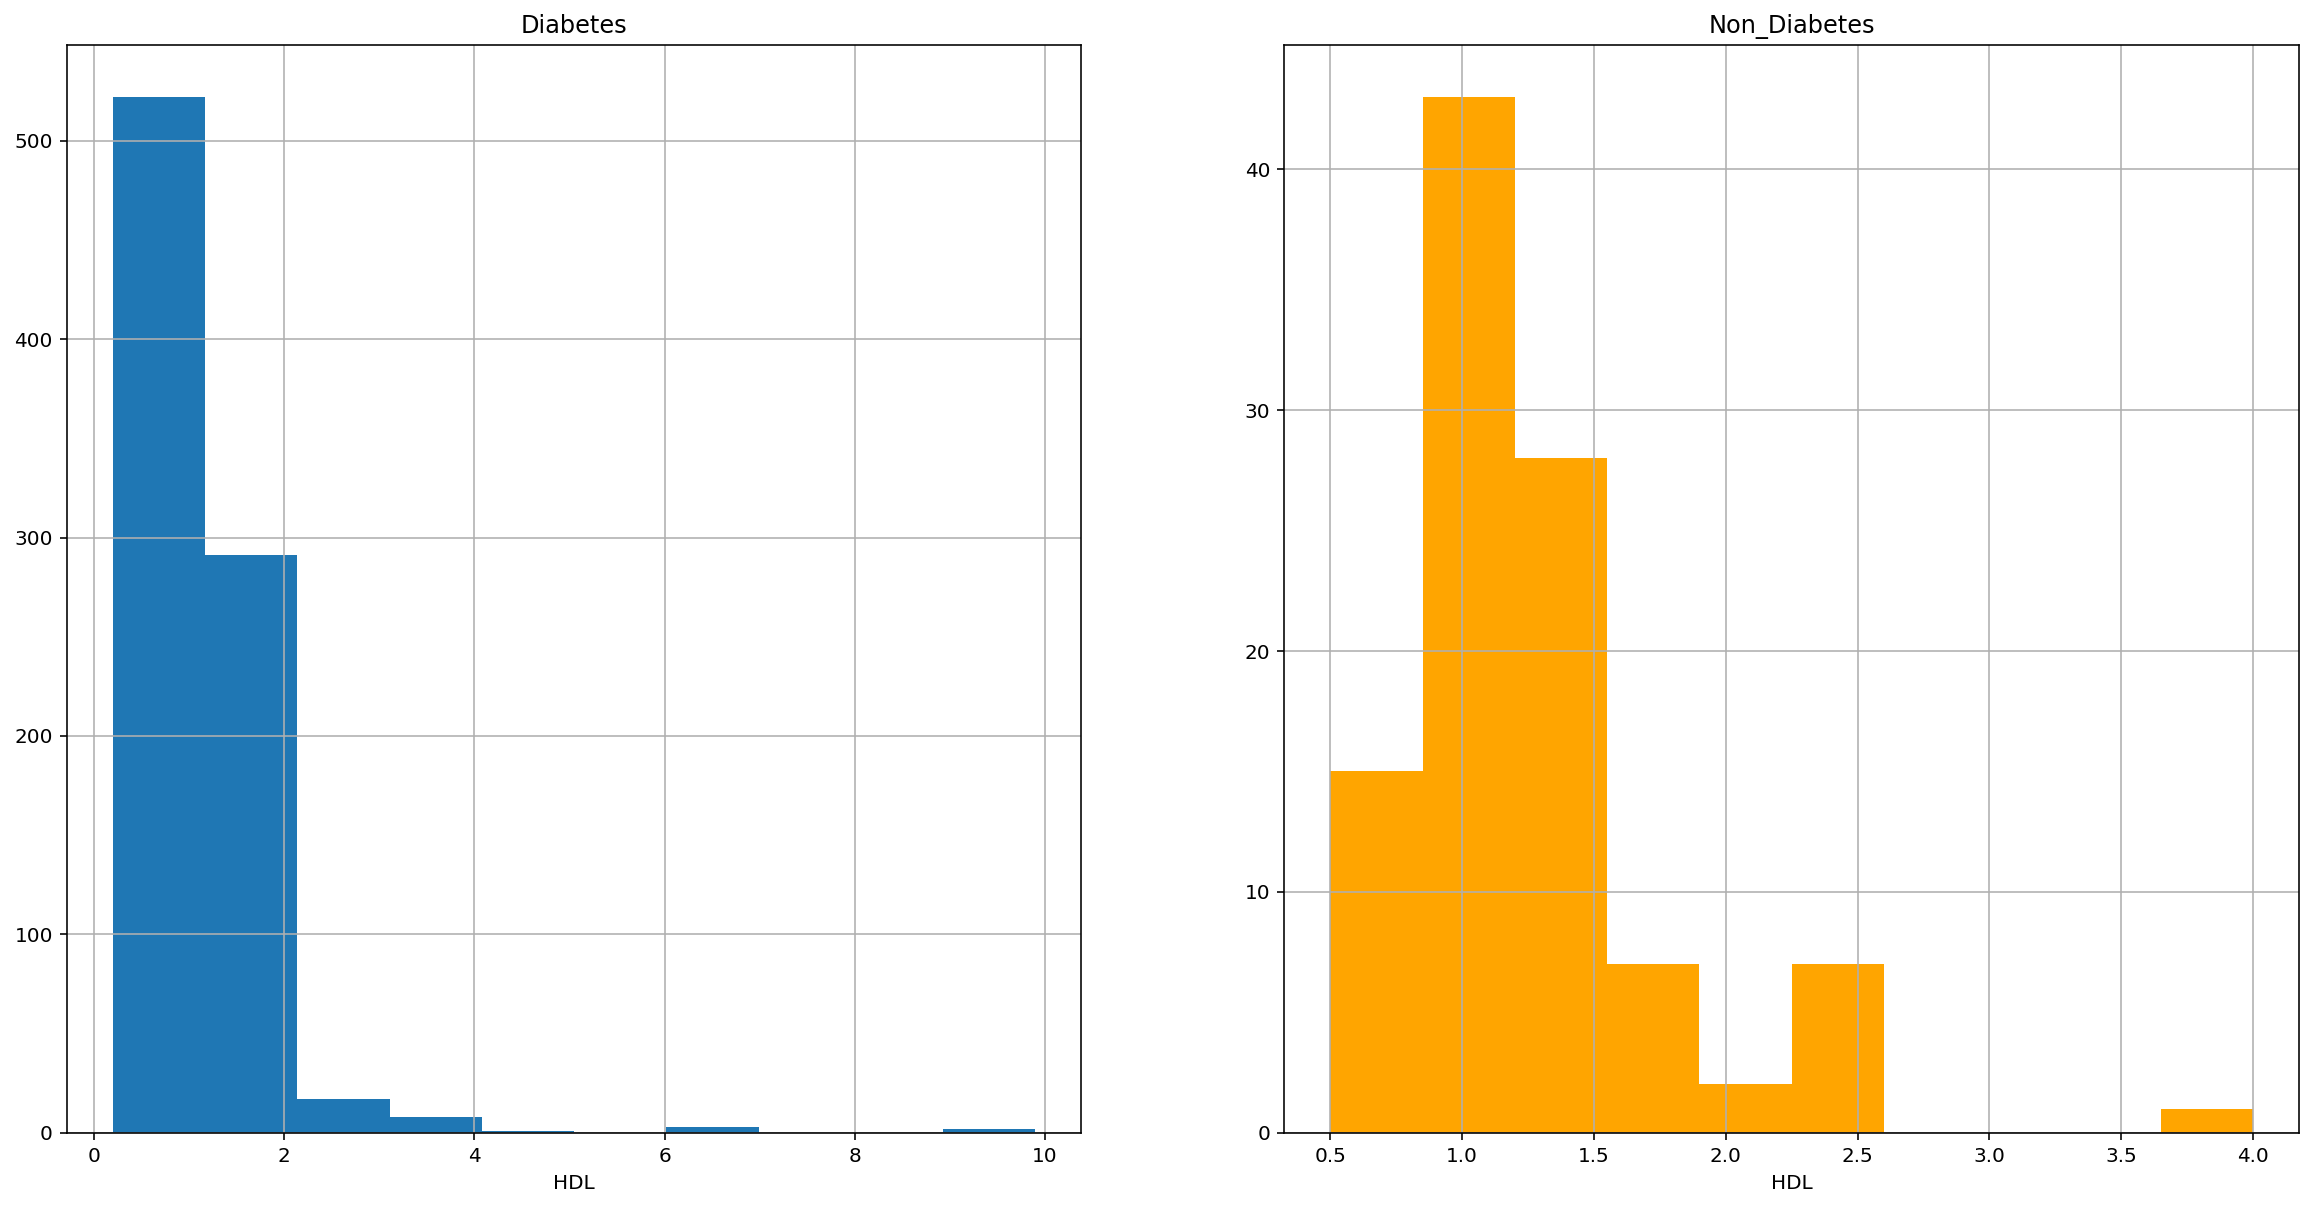

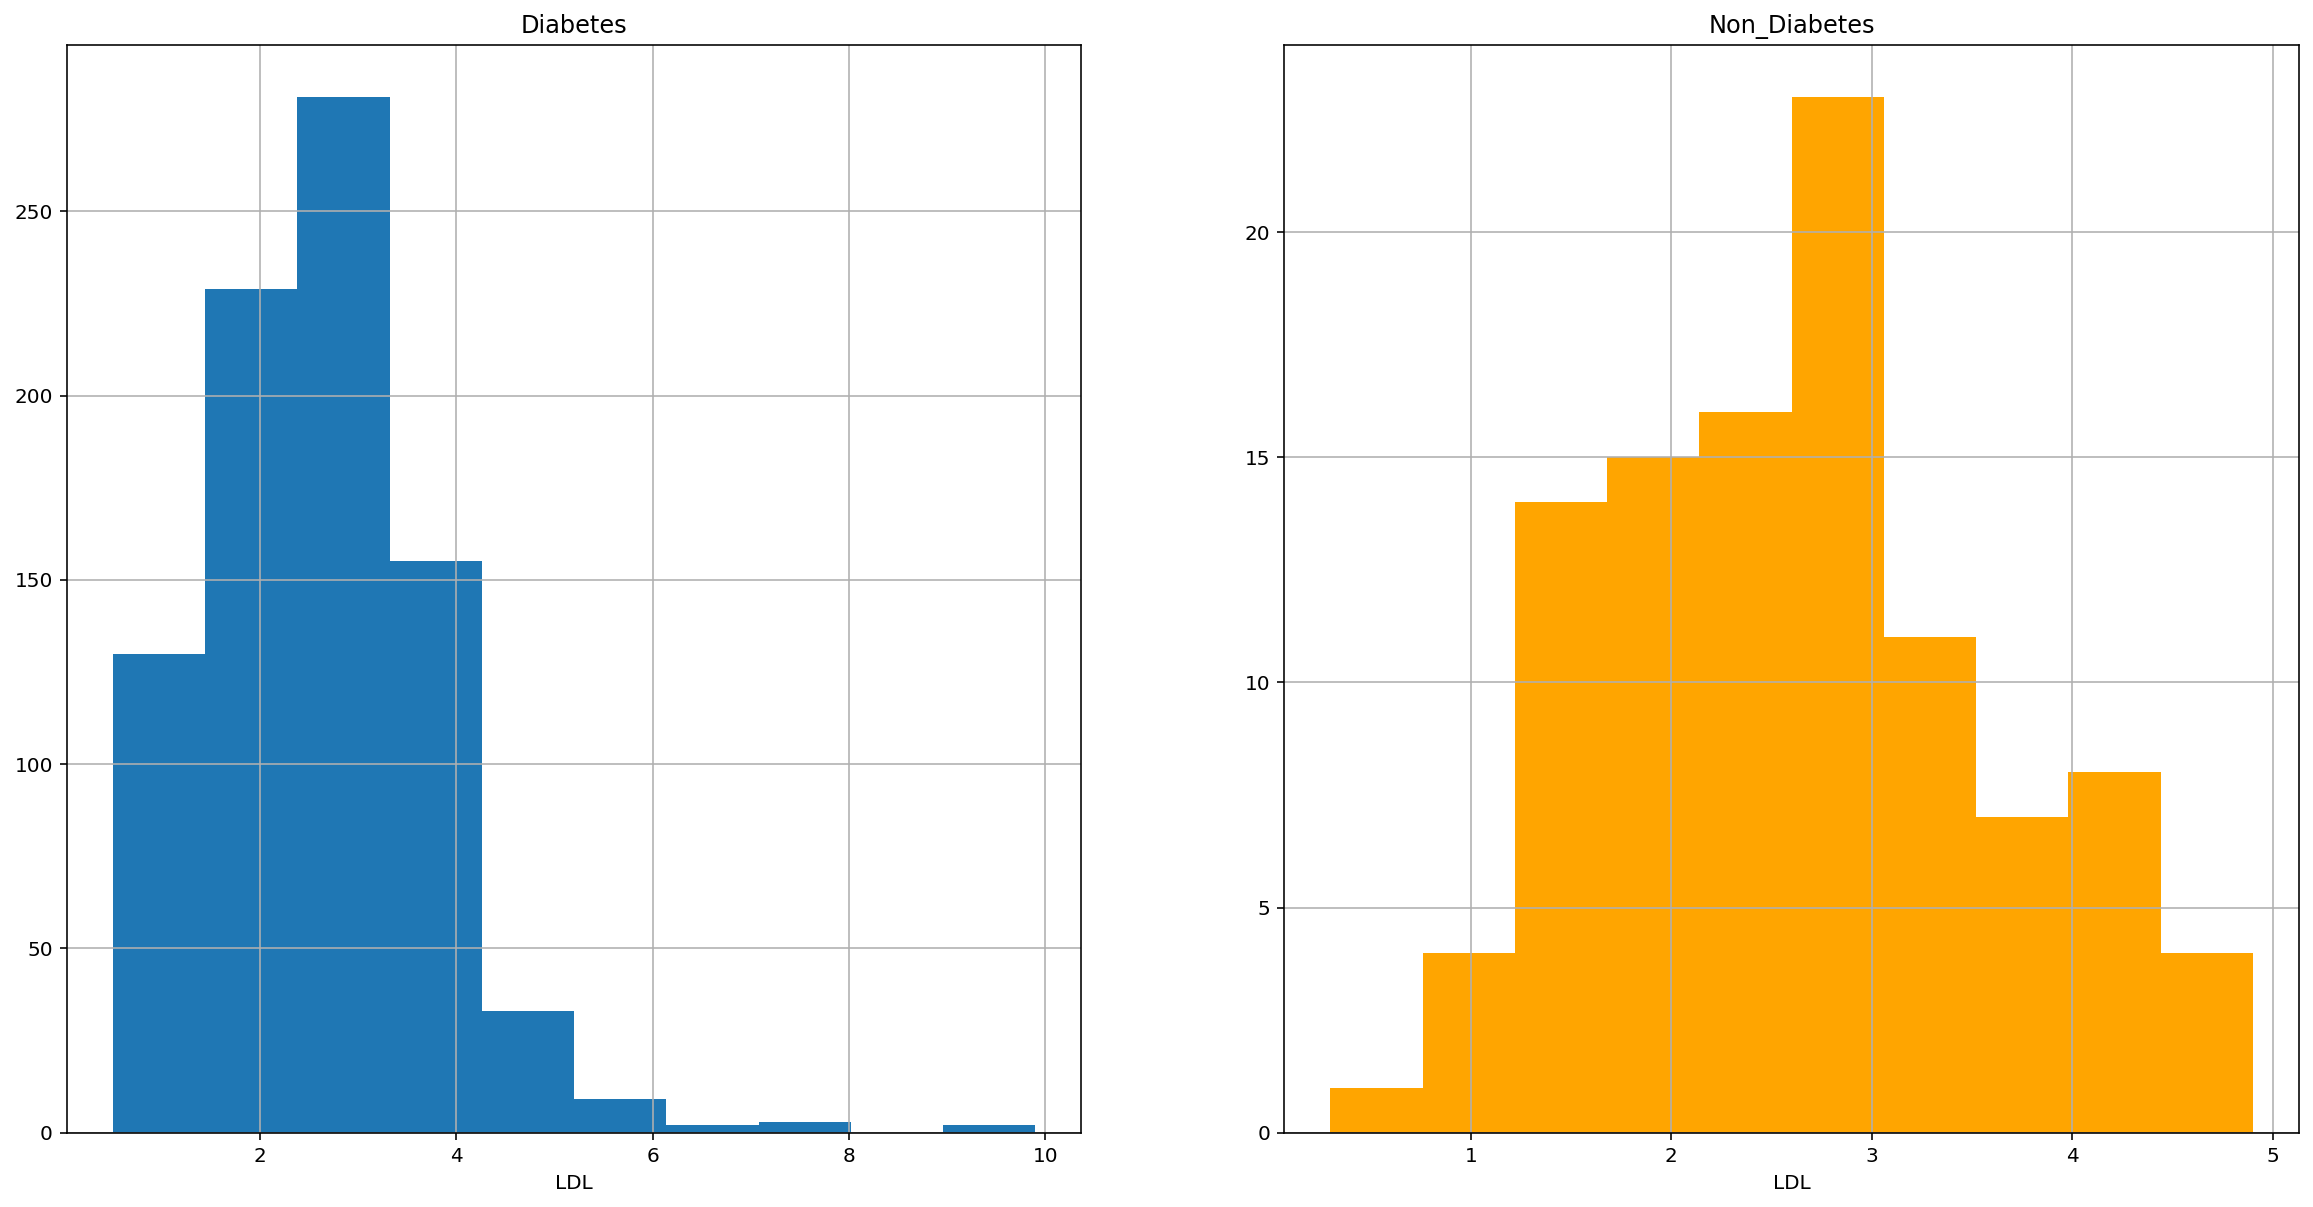

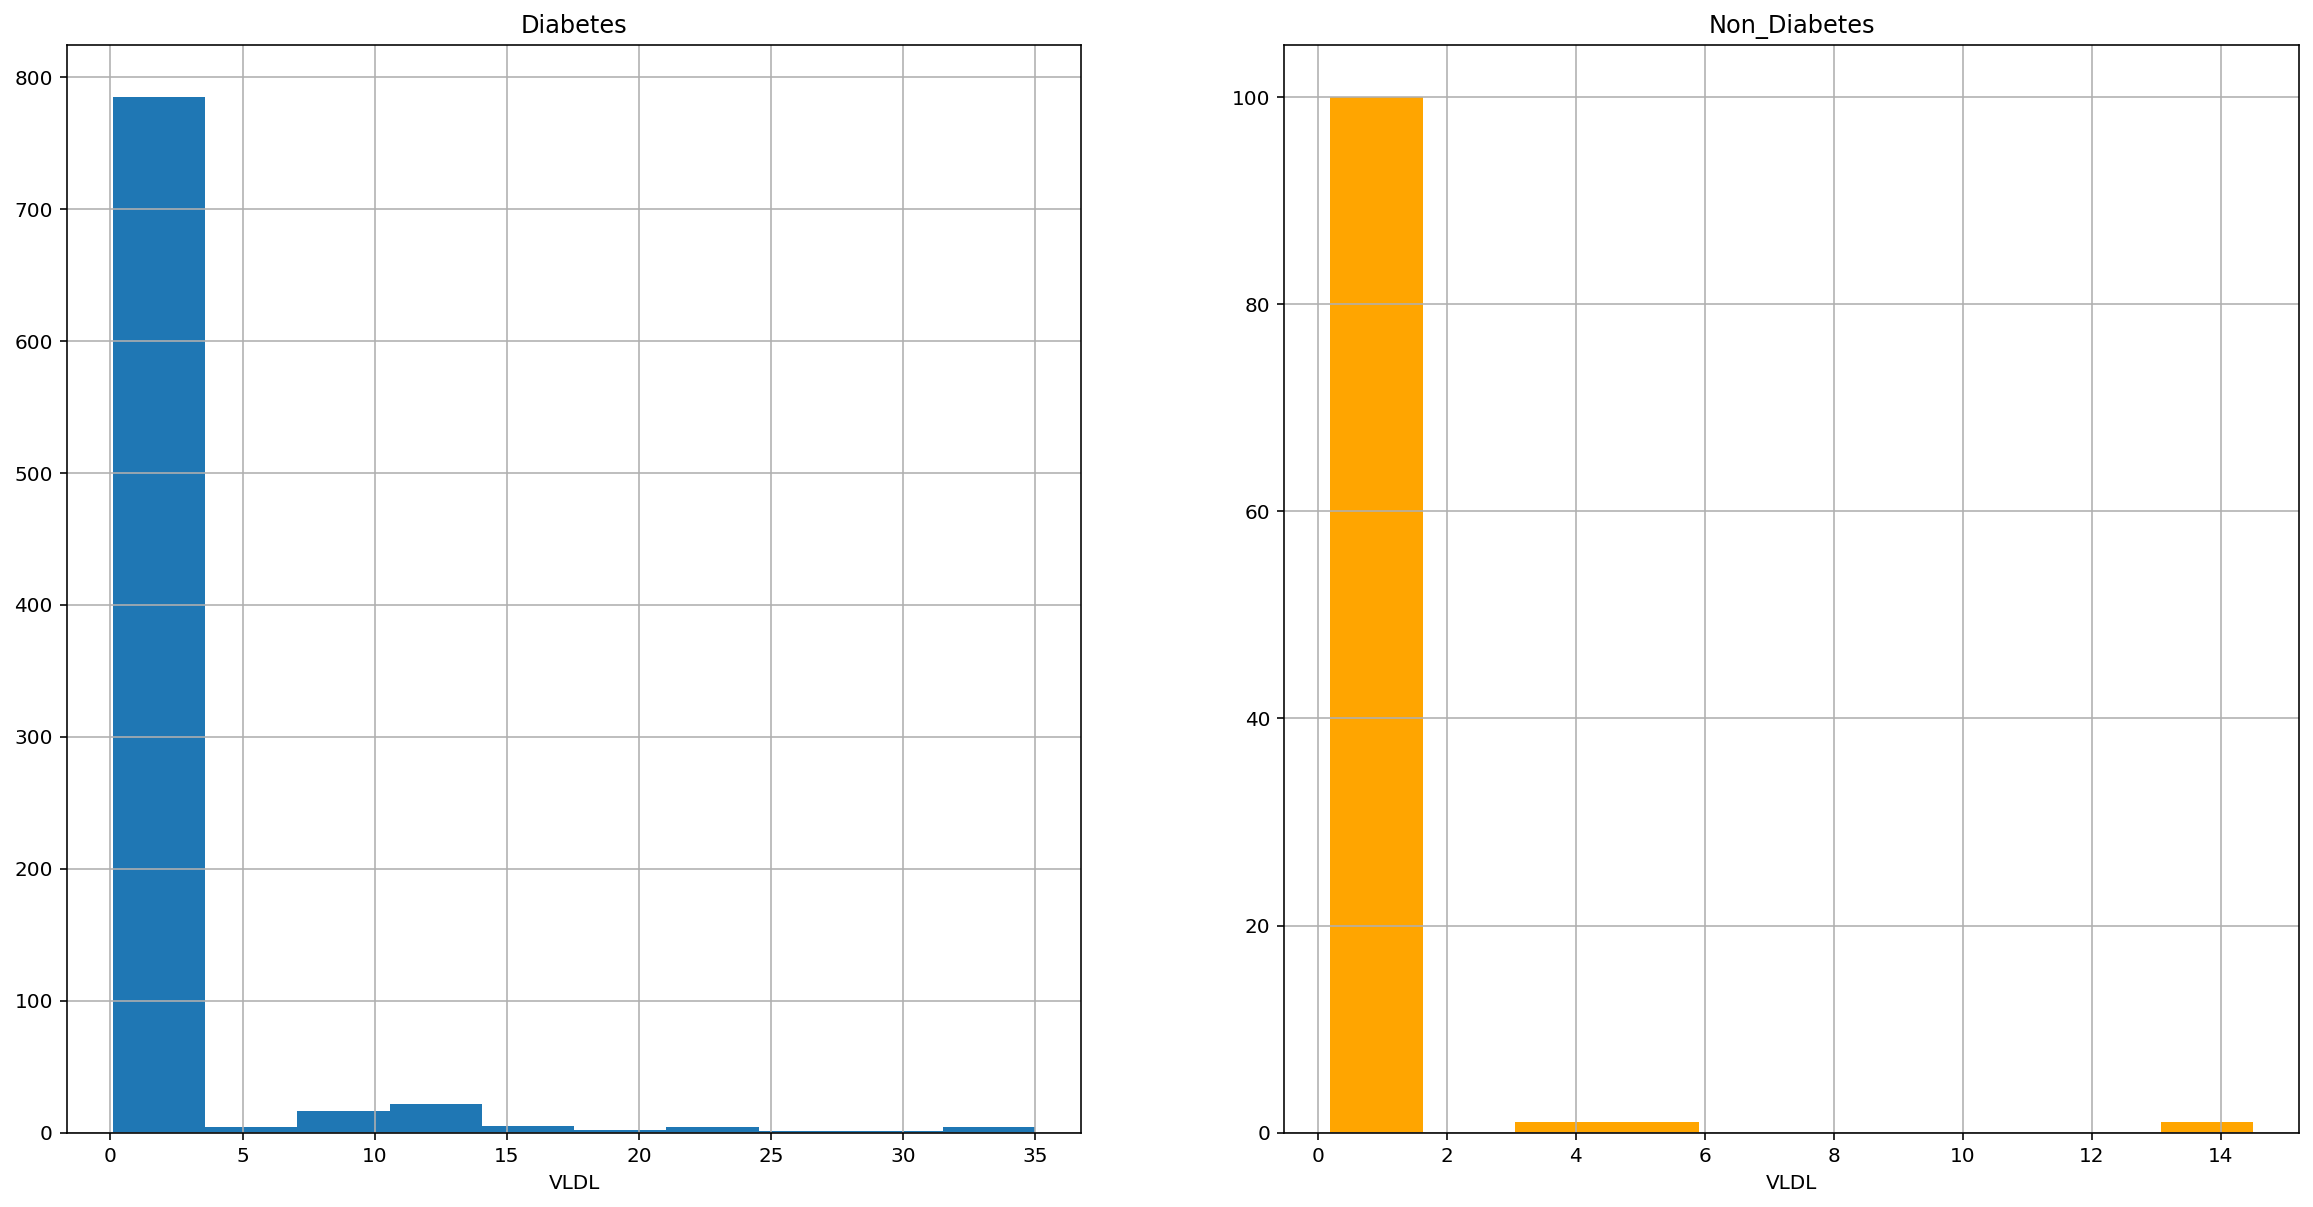

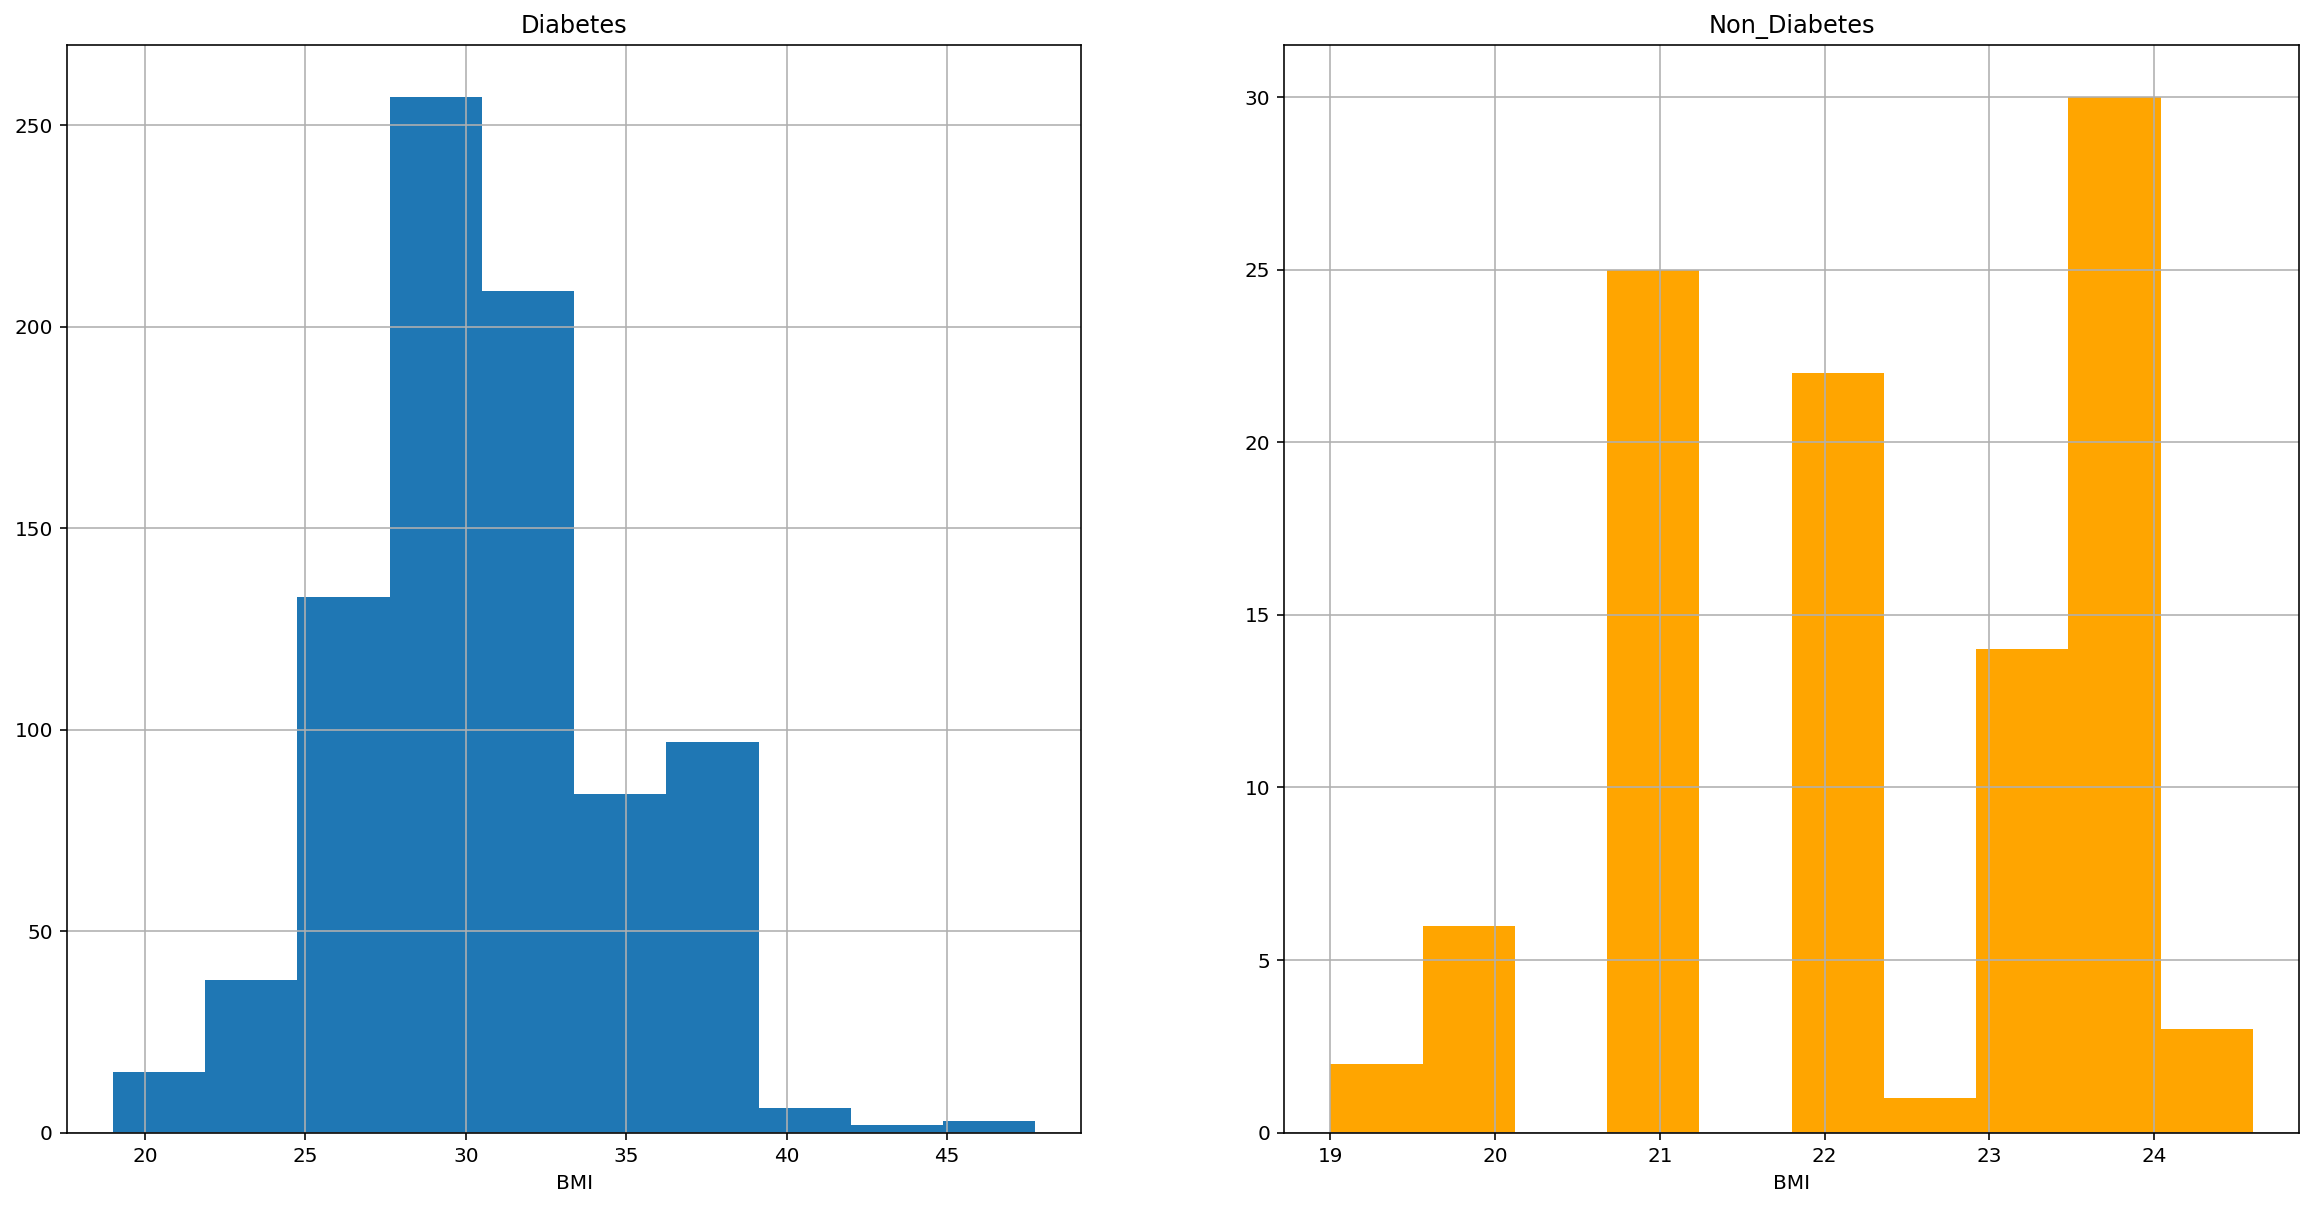

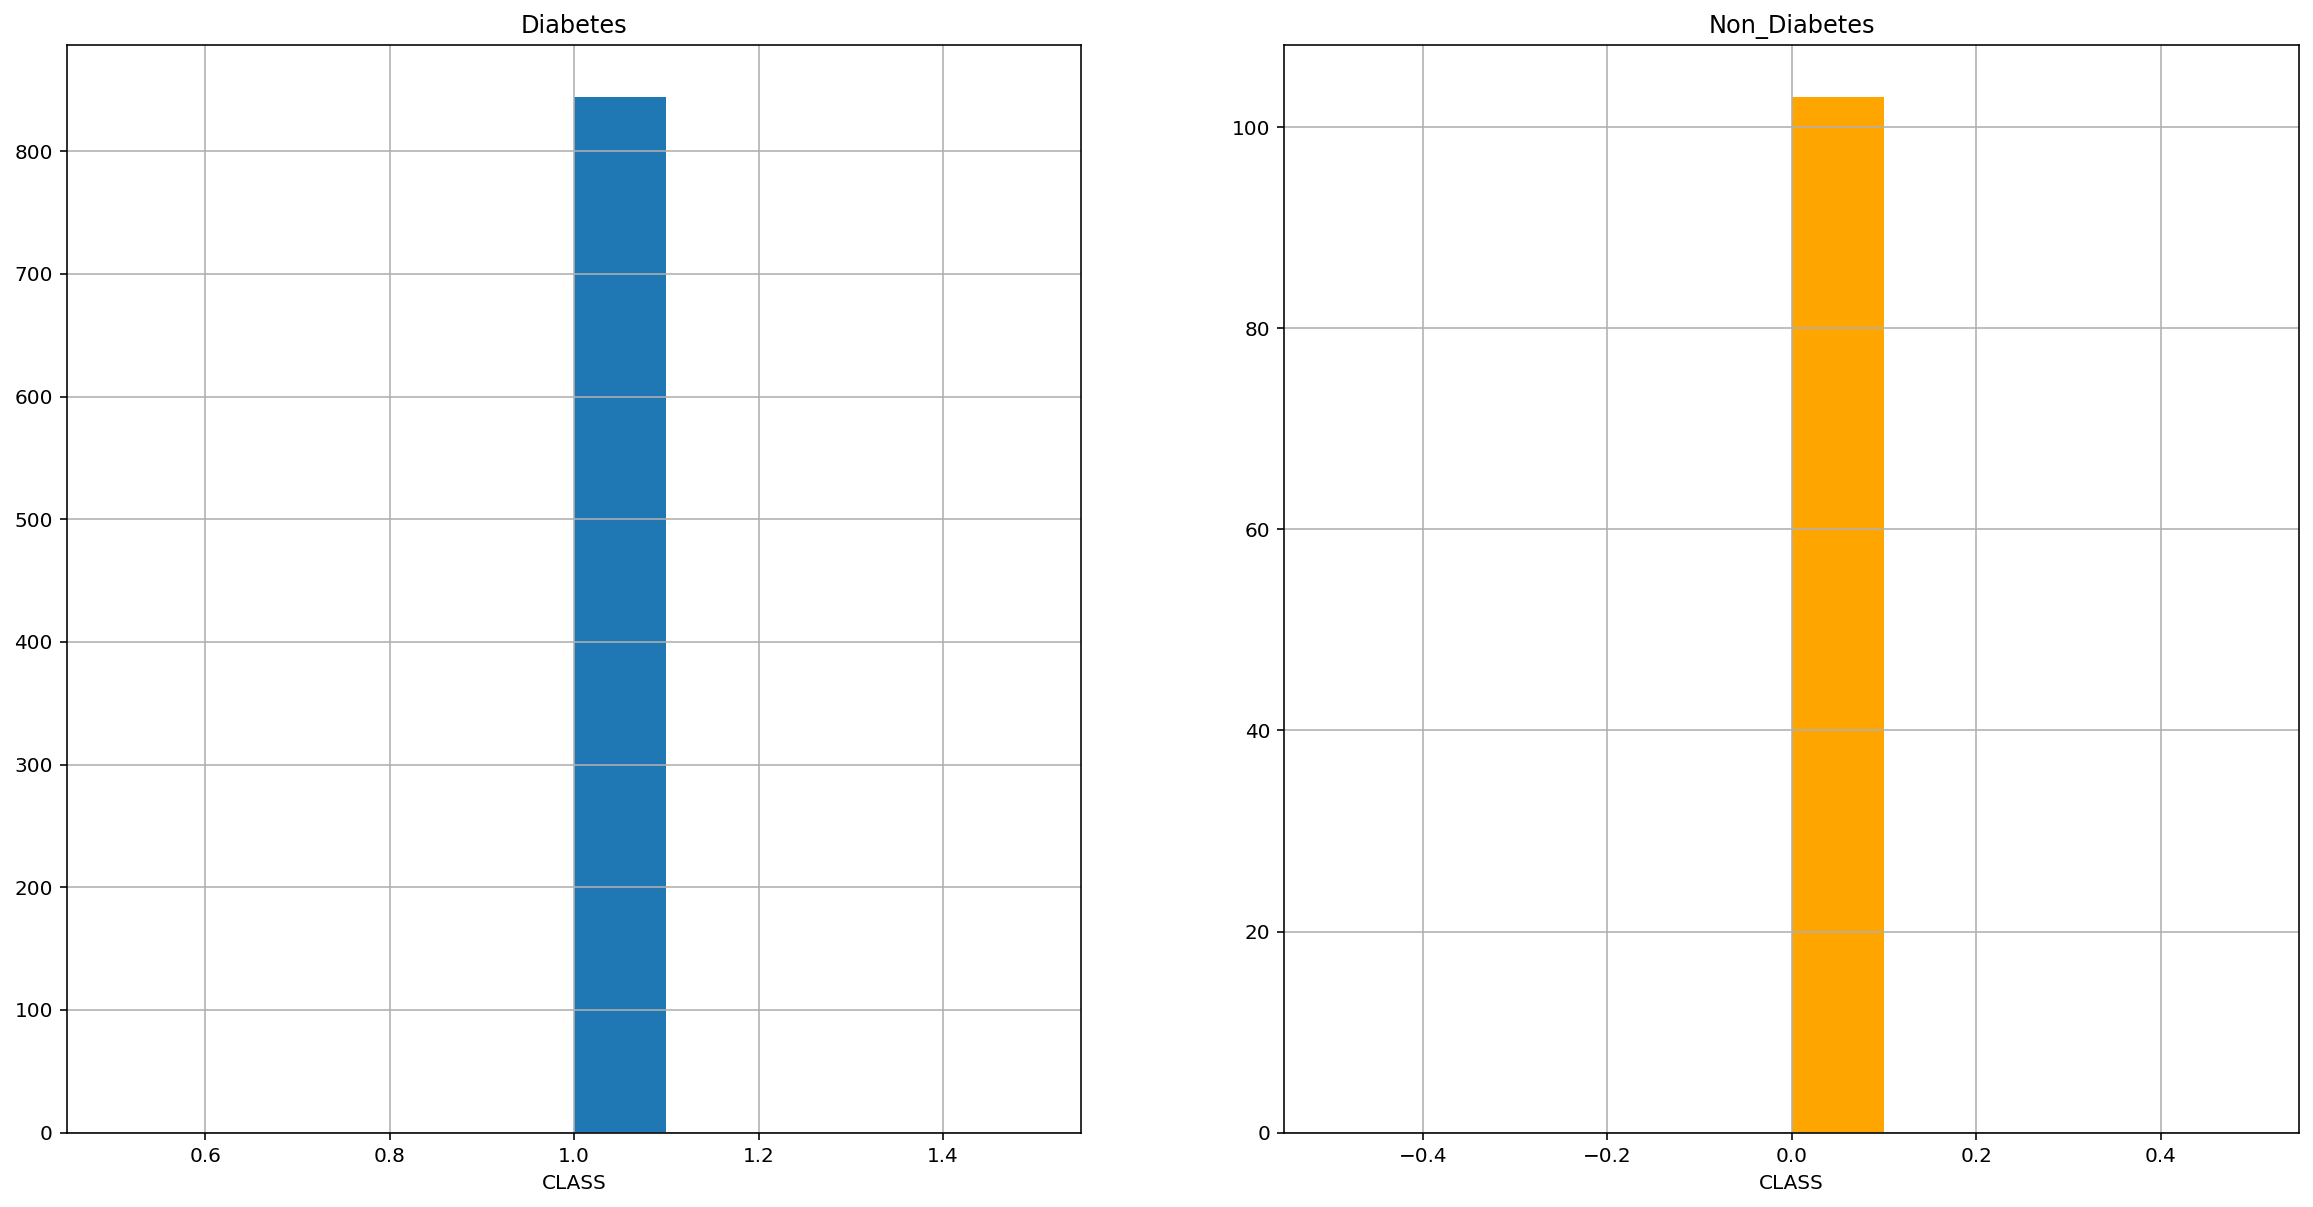

In [13]:
for var in features_list:
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)  # (1,2,1) means one row, 2 columns, this is the 1st column
    fig = diabete[var].hist()
    fig.set_title('Diabetes')
    fig.set_xlabel(var)
    
    plt.subplot(1,2,2)  # (1,2,1) means one row, 2 columns, this is the 2nd column
    fig = non_diabete[var].hist(color='orange')
    fig.set_title('Non_Diabetes')
    fig.set_xlabel(var)
    plt.show()

## So Far:
From our initial inspection, it can be seen that both high levels of HbA1c and BMI are strong indicators of diabetes. To explore further the main components of diabetes and their correlation, let's have a look at the correlation matrix.

In [9]:
df_copy.corr()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
Gender,1.000000,0.032136,0.116071,0.151766,0.003129,-0.060116,0.050080,-0.130380,0.063521,0.202722,0.095024,0.126611
AGE,0.032136,1.000000,0.104074,0.063636,0.348311,0.035583,0.151121,-0.024598,0.023038,-0.109751,0.331684,0.405810
Urea,0.116071,0.104074,1.000000,0.618131,-0.035406,-0.002575,0.043430,-0.044967,-0.010279,-0.013755,0.038651,0.056216
Cr,0.151766,0.063636,0.618131,1.000000,-0.041327,-0.007199,0.058509,-0.028099,0.041527,0.009271,0.058707,0.036222
HbA1c,0.003129,0.348311,-0.035406,-0.041327,1.000000,0.174767,0.219967,0.023891,0.006722,0.063217,0.382034,0.528732
Chol,-0.060116,0.035583,-0.002575,-0.007199,0.174767,1.000000,0.319991,0.103406,0.409994,0.073109,0.004481,0.162275
TG,0.050080,0.151121,0.043430,0.058509,0.219967,0.319991,1.000000,-0.081834,0.016560,0.140093,0.104837,0.181722
HDL,-0.130380,-0.024598,-0.044967,-0.028099,0.023891,0.103406,-0.081834,1.000000,-0.148107,-0.060974,0.066829,-0.009410
LDL,0.063521,0.023038,-0.010279,0.041527,0.006722,0.409994,0.016560,-0.148107,1.000000,0.062171,-0.078513,-0.002771
VLDL,0.202722,-0.109751,-0.013755,0.009271,0.063217,0.073109,0.140093,-0.060974,0.062171,1.000000,0.191174,0.089292


In [10]:
df_copy.groupby("CLASS").mean().T

CLASS,0,1
Gender,0.378641,0.580569
AGE,44.233010,55.305687
Urea,4.680583,5.217468
Cr,62.796117,69.873223
HbA1c,4.560194,8.878270
Chol,4.268932,4.953104
TG,1.625243,2.452026
HDL,1.227184,1.206872
LDL,2.625243,2.615213
VLDL,0.943689,2.020616


## Let's plot the distribution of each indicator

/var/folders/lv/yqcn90qj6v18q4r4m5q3qlr00000gn/T/ipykernel_90191/2046625540.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', quality=100)


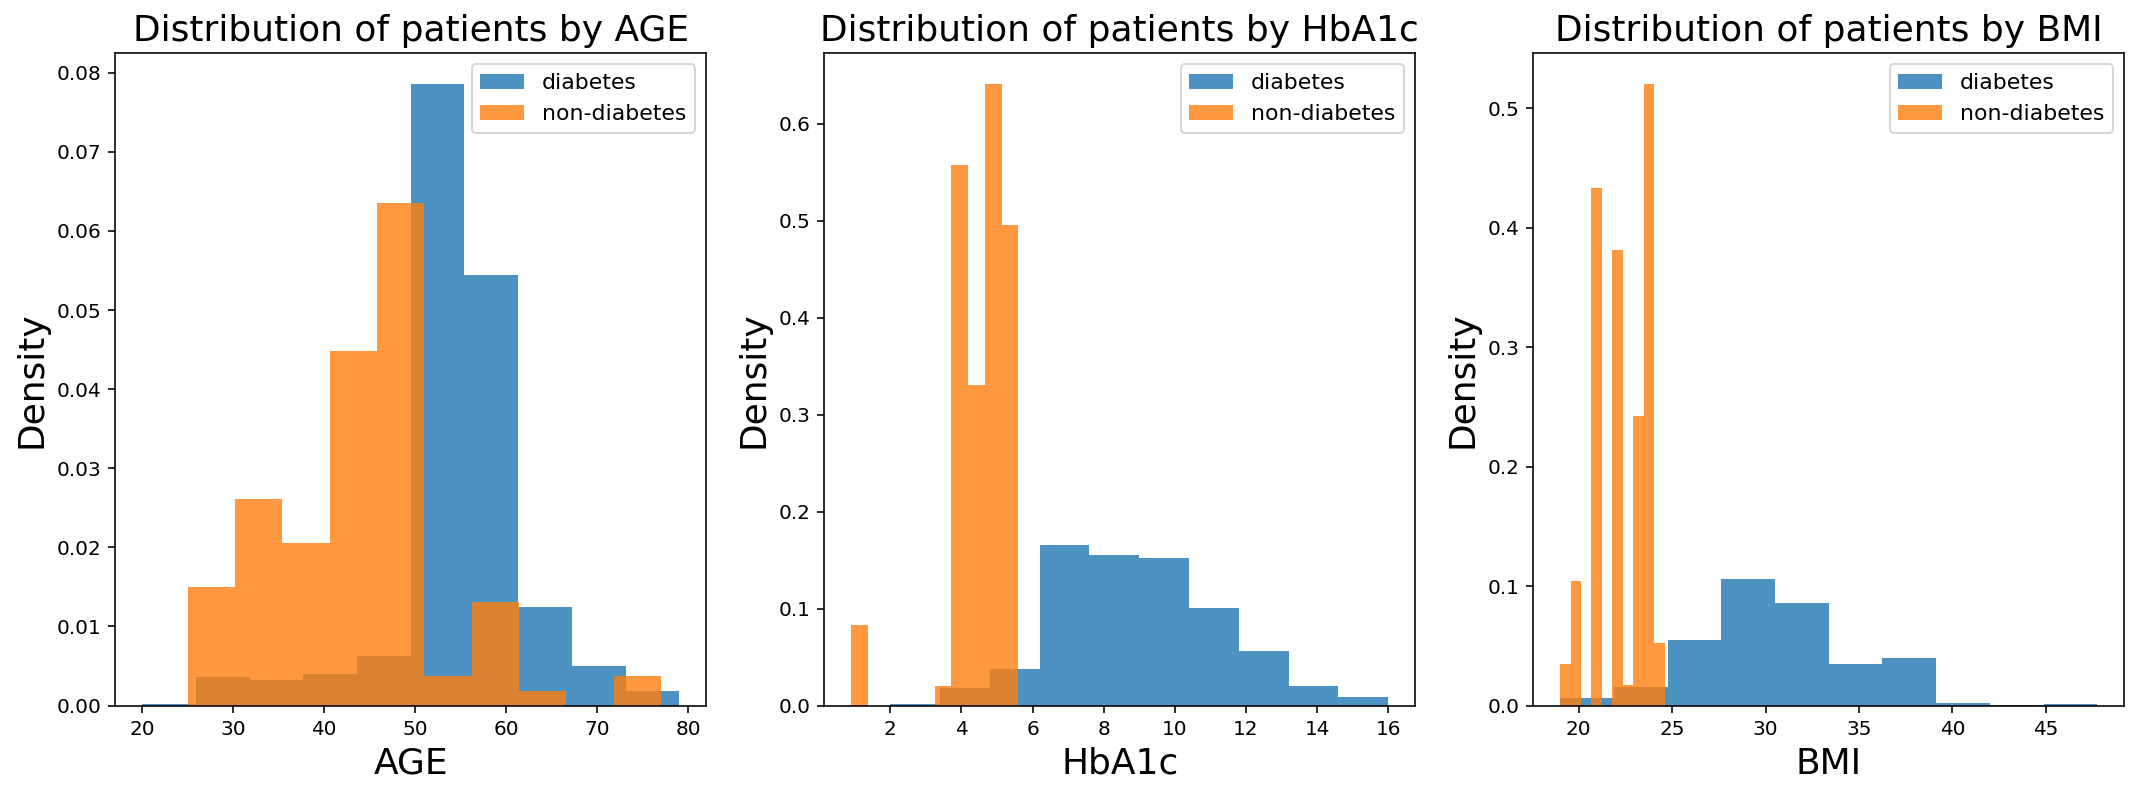

In [35]:
# plot the distribution of diabetes vs non-diabetes in each of the top indicator by creating a subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
ax = [ax1, ax2, ax3] 
top_indicators = ["AGE", "HbA1c", "BMI"]
for i, indicator in enumerate(top_indicators):
    ax[i].hist(diabete[indicator],bins=10,density=True, alpha = 0.8)  # plot distribution of diabetes
    ax[i].hist(non_diabete[indicator], bins=10, density = True, alpha = 0.8)  # plot distribution of non-diabetes
    ax[i].set_title(f"Distribution of patients by {indicator}", fontsize =18)
    ax[i].set_xlabel(indicator, fontsize = 18)
    ax[i].set_ylabel("Density", fontsize =18)
    ax[i].legend(["diabetes","non-diabetes"],loc= "upper right", prop={'size':11})


## Conclusion
We can see that BMI, HbA1C, and AGE are highly correlated with diabetes. Also the BMI itself is highly correlated with AGE and HbA1C.